## Preparation
(1) Download all necessary packages

In [2]:
import matplotlib.pyplot as plt; import numpy as np; import netCDF4; from netCDF4 import Dataset
import pandas as pd; import numpy.ma as ma; import time as timeit; import os; import math; import re
import itertools; import scipy.io; import mat73; import collections
import cartopy; import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import AutoMinorLocator; from matplotlib.ticker import FixedLocator
from shapely.geometry import Point; from shapely.geometry.polygon import Polygon
%matplotlib inline
import statistics; import xarray as xr; from scipy.interpolate import griddata
from matplotlib.path import Path; from numpy import nan; import gsw

In [3]:
import matplotlib as mpl

(2) Load polygon shape files (w = GB, x = NMAB, y = EGoM, t = WGoM, v = SMAB)

In [4]:
neww = [['', '', '40.00', '', '', '69.50'], ['', '', '40.30', '', '', '68.00'], ['', '', '40.40', '', '', '67.50'], ['', '', '40.60', '', '', '67.00'], ['', '', '40.80', '', '', '66.50'], ['', '', '41.45', '', '', '66.00'], ['', '', '41.80', '', '', '65.70'], ['', '', '42.10', '', '', '66.00'], ['', '', '42.10', '', '', '67.00'], ['', '', '42.10', '', '', '67.50'], ['', '', '41.80', '', '', '68.00'], ['', '', '41.10', '', '', '69.00'], ['', '', '41.00', '', '', '69.50'], ['', '', '40.00', '', '', '69.50']]
lon_w = []; lat_w = []
for i in range(14): 
    w1 = neww[i][2]
    lat_w.append(w1)
    w3 = neww[i][5]
    lon_w.append(w3)
lonlist_w = [float(i) for i in lon_w]; latlist_w = [float(i) for i in lat_w]
lonlist_wneg = [float(i)*-1 for i in lon_w]
df_w = pd.DataFrame({'lon': lonlist_w, 'lat': latlist_w,})
df_w_plottable = pd.DataFrame({'lon': lonlist_wneg, 'lat': latlist_w,})

lonlist_w_plot = [float(i)*-1 for i in lon_w]; latlist_w = [float(i) for i in lat_w]
df_w_plot = pd.DataFrame({'lon': lonlist_w_plot, 'lat': latlist_w,})
x_w = df_w_plot['lon']; y_w = df_w_plot['lat']
polygon_w = Polygon(df_w.values)

In [5]:
newv = [['', '', '37.00', '', '', '76.00'], ['', '', '36.00', '', '', '75.50'], ['', '', '35.50', '', '', '75.00'], ['', '', '36.00', '', '', '74.75'], ['', '', '37.40', '', '', '74.50'], ['', '', '39.50', '', '', '72.00'], ['', '', '40.50', '', '', '74.00'], ['', '', '39.40', '', '', '74.25'], ['', '', '37.00', '', '', '76.00']]
lon_v = []; lat_v = []
for i in range(9): 
    v1 = newv[i][2]
    lat_v.append(v1)
    v3 = newv[i][5]
    lon_v.append(v3)
lonlist_v = [float(i) for i in lon_v]; latlist_v = [float(i) for i in lat_v]
df_v = pd.DataFrame({'lon': lonlist_v, 'lat': latlist_v,})
lonlist_v_plot = [float(i)*-1 for i in lon_v]; latlist_v = [float(i) for i in lat_v]
df_v_plot = pd.DataFrame({'lon': lonlist_v_plot, 'lat': latlist_v,})
x_v = df_v_plot['lon']; y_v = df_v_plot['lat']

lonlist_vneg = [float(i)*-1 for i in lon_v]
df_v_plottable = pd.DataFrame({'lon': lonlist_vneg, 'lat': latlist_v,})
polygon_v = Polygon(df_v.values.tolist())

In [6]:
newx = [['', '', '40.50', '', '', '74.00'], ['', '', '39.50', '', '', '72.00'], ['', '', '40.00', '', '', '71.40'], ['', '', '40.00', '', '', '69.50'], ['', '', '41.00', '', '', '69.50'], ['', '', '41.10', '', '', '70.00'], ['', '', '41.00', '', '', '72.00'], ['', '', '40.50', '', '', '74.00']]
lon_x = []; lat_x = []
for i in range(8): 
    x1 = newx[i][2]
    lat_x.append(x1)
    x3 = newx[i][5]
    lon_x.append(x3)
lonlist_x = [float(i) for i in lon_x]; latlist_x = [float(i) for i in lat_x]
df_x = pd.DataFrame({'lon': lonlist_x, 'lat': latlist_x,})
lonlist_x_plot = [float(i)*-1 for i in lon_x]; latlist_x = [float(i) for i in lat_x]
df_x_plot = pd.DataFrame({'lon': lonlist_x_plot, 'lat': latlist_x,})
x_x = df_x_plot['lon']; y_x = df_x_plot['lat']

lonlist_xneg = [float(i)*-1 for i in lon_x]
df_x_plottable = pd.DataFrame({'lon': lonlist_xneg, 'lat': latlist_x,})
polygon_x = Polygon(df_x.values.tolist())

In [7]:
newy = [['', '', '41.80', '', '', '68.00'], ['', '', '42.10', '', '', '67.50'], ['', '', '42.10', '', '', '67.00'], ['', '', '42.10', '', '', '66.00'], ['', '', '43.00', '', '', '66.00'], ['', '', '44.20', '', '', '66.50'], ['', '', '44.20', '', '', '67.00'], ['', '', '44.20', '', '', '68.00'], ['', '', '41.80', '', '', '68.00']]
lon_y = []; lat_y = []
for i in range(9): 
    y1 = newy[i][2]
    lat_y.append(y1)
    y3 = newy[i][5]
    lon_y.append(y3)
lonlist_y = [float(i) for i in lon_y]; latlist_y = [float(i) for i in lat_y]
df_y = pd.DataFrame({'lon': lonlist_y, 'lat': latlist_y,})
lonlist_y_plot = [float(i)*-1 for i in lon_y]; latlist_y = [float(i) for i in lat_y]
df_y_plot = pd.DataFrame({'lon': lonlist_y_plot, 'lat': latlist_y,})
x_y = df_y_plot['lon']; y_y = df_y_plot['lat']

lonlist_yneg = [float(i)*-1 for i in lon_y]
df_y_plottable = pd.DataFrame({'lon': lonlist_yneg, 'lat': latlist_y,})
polygon_y = Polygon(df_y.values)

In [8]:
newt = [['', '', '42.20', '', '', '70.50'], ['', '', '42.00', '', '', '70.00'], ['', '', '41.10', '', '', '69.00'], ['', '', '41.80', '', '', '68.00'], ['', '', '44.20', '', '', '68.00'], ['', '', '43.90', '', '', '69.00'], ['', '', '43.70', '', '', '70.00'], ['', '', '43.00', '', '', '70.50'], ['', '', '42.20', '', '', '70.50']]
lon_t = []; lat_t = []
for i in range(9): 
    t1 = newt[i][2]
    lat_t.append(t1)
    t3 = newt[i][5]
    lon_t.append(t3)
lonlist_t = [float(i) for i in lon_t]; latlist_t = [float(i) for i in lat_t]
df_t = pd.DataFrame({'lon': lonlist_t, 'lat': latlist_t,})
lonlist_t_plot = [float(i)*-1 for i in lon_t]; latlist_t = [float(i) for i in lat_t]
df_t_plot = pd.DataFrame({'lon': lonlist_t_plot, 'lat': latlist_t,})
x_t = df_t_plot['lon']; y_t = df_t_plot['lat']

lonlist_tneg = [float(i)*-1 for i in lon_t]
df_t_plottable = pd.DataFrame({'lon': lonlist_tneg, 'lat': latlist_t,})
polygon_t = Polygon(df_t.values)

(3) Accessing observational data : Density threshold method (d = 0.03kg/m3) __Option 1: Well-defined MLD, Option 2: Fully mixed profile, Option 3: Fully mixed, Option 4: Fully mixed, Option 5: At the top of the profile, Option 6: Well-defined MLD

In [11]:
list1 = [1,2,3,4,5,6]
l=[i for i in list1 if i<6] 
print(l)

[1, 2, 3, 4, 5]


In [30]:
option1 = []; option2 = []; option3 = []; option4 = []; option5 = []; option6 =[]
pointstouse = [];seasonalmean = []; seasonalstd = []; yearwithdata = []; finallatestdepth = []
finalfinaldepth = []; finalfinalratio = []; filteredMLDlist = []; meanfilteredMLDlist = []; stdfilteredMLDlist = []; years = []; bananasplitmean = []; bananasplitstd = [];floormean = [];floorstd = []; latfinal = []; lonfinal = []; ratiofinal = [];bottomdfinal = []; filteredfloorslist = [];zi_listofarrays = []
date_final = []; year_final = []
for year in range(1993,2019):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    lat_intermediate = []; lon_intermediate = []; p_intermediate = []; t_intermediate = []; yd_intermediate = []; sal_intermediate = []
    finaldepth = []; finallat = [];finallon = []
    seasonyeardepth = []; seasonyeartemp = [];seasonyearsal = []; seasonyeardens = []; counterii = []; floors = []; floor_intermediate = []; s_intermediate = [];seasonyearsal = []; lat = []; lon = []; lonneg = []
    
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        gear = npfile[i]['gear']
        floordepth = npfile[i]['depth']
        if gear == 'Bottle':
            pass
        elif yd > 90 and yd <= 120:
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            p_intermediate.append(npfile[i]['p'])
            t_intermediate.append(npfile[i]['t'])
            yd_intermediate.append(npfile[i]['yd'])
            sal_intermediate.append(npfile[i]['s'])
            floor_intermediate.append(npfile[i]['depth'])
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate,'depth': floor_intermediate, 's': sal_intermediate})
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate,'date': yd_intermediate})

    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if isinstance(month_df['p'].iloc[ii], int) or isinstance(month_df['p'].iloc[ii], float) or isinstance(month_df['t'].iloc[ii], int) or isinstance(month_df['t'].iloc[ii], float):
            pass
        elif polygon_t.contains(point) == True:
#         elif polygon_x.contains(point) == True or polygon_y.contains(point) == True or polygon_t.contains(point) == True or polygon_w.contains(point) == True or polygon_v.contains(point) == True:
            CT = gsw.CT_from_pt(month_df['s'].iloc[ii],month_df['t'].iloc[ii])
            DENS = gsw.sigma0(month_df['s'].iloc[ii],CT)
            pt_df = pd.DataFrame({'p': month_df['p'].iloc[ii],'t': month_df['t'].iloc[ii], 's': month_df['s'].iloc[ii], 'CT': CT, 'DENSMLD': DENS}) 
            df_ptsnew = pt_df.dropna()
            df_final = pd.DataFrame(df_ptsnew.values)
            
            l=[i for i in df_final[0] if i<=6] 
            if len(l) > 0:
                surfaceval = []
                numrange = []
                for iii in range(len(l)):
                    val = df_final[4][iii]
                    numrange.append(iii)
                    surfaceval.append(val)            
            surfacevalmean = statistics.mean(surfaceval)
            densfin = []; tempfin = []; pressurefin = []; salfin = []
            for iii in range(numrange[-1],len(df_final)):
                tempfin.append(df_final[1][iii])
                pressurefin.append(df_final[0][iii])
                salfin.append(df_final[2][iii])
                densfin.append(df_final[4][iii])
            d = {'temp': list(reversed(tempfin)), 'sal': list(reversed(salfin)), 'pressure': list(reversed(pressurefin)),'density': list(reversed(densfin))}
            dunreversed = {'temp': list(tempfin), 'sal': list(salfin), 'pressure': list(pressurefin), 'density': list(densfin)}
            dffinunreversed = pd.DataFrame(dunreversed)
            dffin = pd.DataFrame(d)
            for ix in range(len(dffinunreversed)):
                if dffinunreversed.at[ix,'density'] >= (surfacevalmean - 0.03) and dffinunreversed.at[ix,'density'] <= (surfacevalmean + 0.03):
                    if dffinunreversed.at[len(dffinunreversed)-1,'density'] <= (surfacevalmean + 0.03) and dffinunreversed.at[len(dffinunreversed)-1,'density'] >= (surfacevalmean - 0.03):
                        looknow = list(dffinunreversed['density'].values)
                        looknow2 = [i for i in looknow if i >= (surfacevalmean + 0.03)]
                        looknow3 = [i for i in looknow if i <= (surfacevalmean - 0.03)]
                        for now in range(len(looknow)):
                            if looknow[now] >= (surfacevalmean + 0.03):
                                seasonyeardepth.append(list(dffinunreversed['pressure'].values)[now])
                                seasonyeartemp.append(list(dffinunreversed['temp'].values)[now])
                                seasonyearsal.append(list(dffinunreversed['sal'].values)[now])
                                seasonyeardens.append(list(dffinunreversed['density'].values)[now])
                                floors.append(month_df['depth'].iloc[ii])
                                lat.append(month_df['lat'].iloc[ii])
                                lon.append(month_df['lon'].iloc[ii])
                                lonneg.append(month_df['lon'].iloc[ii]*-1)
                                counterii.append(ii)
                                option1.append(ii)
                                break
                        if len(looknow2) == 0 and len(looknow3) == 0:
                            seasonyeardepth.append(dffinunreversed.at[len(dffinunreversed)-1,'pressure'])
                            seasonyeartemp.append(dffinunreversed.at[len(dffinunreversed)-1,'temp'])
                            seasonyearsal.append(dffinunreversed.at[len(dffinunreversed)-1,'sal'])
                            seasonyeardens.append(dffinunreversed.at[len(dffinunreversed)-1,'density'])
                            floors.append(month_df['depth'].iloc[ii])
                            lat.append(month_df['lat'].iloc[ii])
                            lon.append(month_df['lon'].iloc[ii])
                            lonneg.append(month_df['lon'].iloc[ii]*-1)
                            counterii.append(ii)
                            option2.append(ii)
                        break
                    else:
                        pass
                else:
                    if dffinunreversed.at[ix,'pressure'] >= (month_df['depth'].iloc[ii] - 6): # ALL MIXED
                        if dffinunreversed.at[ix,'pressure'] == dffinunreversed.at[len(dffinunreversed)-1,'pressure']:
                            if dffinunreversed.at[ix,'pressure'] <= (month_df['depth'].iloc[ii] - 6):
                                pass
                            else:
                                if month_df['depth'].iloc[ii] <= 300:
                                    seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                                    seasonyeartemp.append(dffinunreversed.at[ix,'temp'])
                                    seasonyearsal.append(dffinunreversed.at[ix,'sal'])
                                    seasonyeardens.append(dffinunreversed.at[len(dffinunreversed)-1,'density'])
                                    floors.append(month_df['depth'].iloc[ii])
                                    lat.append(month_df['lat'].iloc[ii])
                                    lon.append(month_df['lon'].iloc[ii])
                                    lonneg.append(month_df['lon'].iloc[ii]*-1)
                                    counterii.append(ii)
                                    option3.append(ii)
                                    break
                        else:
                            if month_df['depth'].iloc[ii] <= 300:
                                seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                                seasonyeartemp.append(dffinunreversed.at[ix,'temp'])
                                seasonyearsal.append(dffinunreversed.at[ix,'sal'])
                                seasonyeardens.append(dffinunreversed.at[len(dffinunreversed)-1,'density'])
                                floors.append(month_df['depth'].iloc[ii])
                                lat.append(month_df['lat'].iloc[ii])
                                lon.append(month_df['lon'].iloc[ii])
                                lonneg.append(month_df['lon'].iloc[ii]*-1)
                                counterii.append(ii)
                                option4.append(ii)
                    elif dffinunreversed.at[ix,'pressure'] == 0:
                        pass
                    elif ix == 0: 
                        if month_df['depth'].iloc[ii] <= 300:
                            seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                            seasonyeartemp.append(dffinunreversed.at[ix,'temp'])
                            seasonyearsal.append(dffinunreversed.at[ix,'sal'])
                            seasonyeardens.append(dffinunreversed.at[len(dffinunreversed)-1,'density'])
                            floors.append(month_df['depth'].iloc[ii])
                            lat.append(month_df['lat'].iloc[ii])
                            lon.append(month_df['lon'].iloc[ii])
                            lonneg.append(month_df['lon'].iloc[ii]*-1)
                            counterii.append(ii)
                            option5.append(ii)
                            break
                    else: # Well-defined mixed layer detected
                        if month_df['depth'].iloc[ii] <= 300:
                            seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                            seasonyeartemp.append(dffinunreversed.at[ix,'temp'])
                            seasonyearsal.append(dffinunreversed.at[ix,'sal'])
                            seasonyeardens.append(dffinunreversed.at[len(dffinunreversed)-1,'density'])
                            floors.append(month_df['depth'].iloc[ii])
                            lat.append(month_df['lat'].iloc[ii])
                            lon.append(month_df['lon'].iloc[ii])
                            lonneg.append(month_df['lon'].iloc[ii]*-1)
                            counterii.append(ii)
                            option6.append(ii)
                            break
                    break
    
    inlat = []; inlon = []; date = []
    for timer in counterii:
        inlat.append(newdf['lat'][timer])
        inlon.append(newdf['lon'][timer])
        date.append(newdf['date'][timer])                 
    if len(seasonyeardepth) > 0:    
        if len(seasonyeardepth) == 1:  
            std = 0
            seasonalstd.append(std)
        else:
            seasonalstd.append(statistics.stdev(seasonyeardepth))
        yearwithdata.append(year)
        seasonalmean.append(statistics.mean(seasonyeardepth))
        full = pd.DataFrame({'mld': seasonyeardepth,'lat': lat, 'lon': lon, 'date': date, 'year_df': year}) 
        finallatestdepth.append(seasonyeardepth)
        latfinal.append(lat)
        lonfinal.append(lon)
        date_final.append(date)
        year_newfinal = full['year_df'].tolist()
        year_final.append(year_newfinal)

In [24]:
option1 = []; option2 = []; option3 = []; option4 = []; option5 = []; option6 =[]
pointstouse = [];seasonalmean = []; seasonalstd = []; yearwithdata = []; finallatestdepth = []
finalfinaldepth = []; finalfinalratio = []; filteredMLDlist = []; meanfilteredMLDlist = []; stdfilteredMLDlist = []; years = []; bananasplitmean = []; bananasplitstd = [];floormean = [];floorstd = []; latfinal = []; lonfinal = []; ratiofinal = [];bottomdfinal = []; filteredfloorslist = [];zi_listofarrays = []
date_final = []; year_final = []

years = []
seasonyeardepth = []; countwithinpolygon = []; correctedwospatdiffmean = [] ; latlat = []; ydyd = []
ratio_of_water_column = []; now = []; later = []; ratio_of_water_column_corrected = [] ; lonlon = []
for year in range(1993,2019):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    lat_intermediate = []; lon_intermediate = []; yd_intermediate = []
    p_intermediate = []; t_intermediate = []; sal_intermediate = []
    floor_intermediate = []; surfaceval_list = []
    seasonyeardepth2 = []; ratio_of_water_column2 = []
    lat_intermediate = []; lon_intermediate = []; p_intermediate = []; t_intermediate = []; yd_intermediate = []; sal_intermediate = []
    finaldepth = []; finallat = [];finallon = []
    seasonyeardepth = []; seasonyeartemp = [];seasonyearsal = []; seasonyeardens = []; counterii = []; floors = []; floor_intermediate = []; s_intermediate = [];seasonyearsal = []; lat = []; lon = []; lonneg = []
    
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        gear = npfile[i]['gear']
        floordepth = npfile[i]['depth']
#         if (yd > 334 and yd <= 365) or (yd >= 0 and yd <= 59) :
        if yd > 334 and yd <= 365 and floordepth <= 200:
#         if yd > 334 and yd <= 365:
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            p_intermediate.append(npfile[i]['p'])
            t_intermediate.append(npfile[i]['t'])
            yd_intermediate.append(npfile[i]['yd'])
            sal_intermediate.append(npfile[i]['s'])
            floor_intermediate.append(npfile[i]['depth'])
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate,'depth': floor_intermediate, 's': sal_intermediate})
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate,'date': yd_intermediate})
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if isinstance(month_df['p'].iloc[ii], int) or isinstance(month_df['p'].iloc[ii], float) or isinstance(month_df['t'].iloc[ii], int) or isinstance(month_df['t'].iloc[ii], float):
            pass
        elif polygon_x.contains(point) == True:
            CT = gsw.CT_from_pt(month_df['s'].iloc[ii],month_df['t'].iloc[ii])
            DENS = gsw.sigma0(month_df['s'].iloc[ii],CT)
            pt_df = pd.DataFrame({'p': month_df['p'].iloc[ii],'t': month_df['t'].iloc[ii], 's': month_df['s'].iloc[ii], 'CT': CT, 'DENSMLD': DENS}) 
            df_ptsnew = pt_df.dropna()
            df_final = pd.DataFrame(df_ptsnew.values)
            countwithinpolygon.append(1)
            l=[i for i in df_final[0] if i<=4] 
            if len(l) > 0:
                surfaceval = []
                numrange = []
                for iii in range(len(l)):
                    val = df_final[4][iii]
                    numrange.append(iii)
                    surfaceval.append(val)            
            surfacevalmean = statistics.mean(surfaceval)
            densfin = []; tempfin = []; pressurefin = []; salfin = []
            for iii in range(numrange[-1],len(df_final)):
                tempfin.append(df_final[1][iii])
                pressurefin.append(df_final[0][iii])
                salfin.append(df_final[2][iii])
                densfin.append(df_final[4][iii])
            d = {'temp': list(reversed(tempfin)), 'sal': list(reversed(salfin)), 'pressure': list(reversed(pressurefin)),'density': list(reversed(densfin))}
            dunreversed = {'temp': list(tempfin), 'sal': list(salfin), 'pressure': list(pressurefin), 'density': list(densfin)}
            dffinunreversed = pd.DataFrame(dunreversed)
            dffin = pd.DataFrame(d)
            
            for ix in range(len(dffinunreversed)):
                if dffinunreversed.at[ix,'density'] >= (surfacevalmean - 0.03) and dffinunreversed.at[ix,'density'] <= (surfacevalmean + 0.03):
                    if dffinunreversed.at[len(dffinunreversed)-1,'density'] <= (surfacevalmean + 0.03) and dffinunreversed.at[len(dffinunreversed)-1,'density'] >= (surfacevalmean - 0.03):
                        looknow = list(dffinunreversed['density'].values)
                        looknow2 = [i for i in looknow if i >= (surfacevalmean + 0.03)]
                        looknow3 = [i for i in looknow if i <= (surfacevalmean - 0.03)]
                        if len(looknow2) == 0 and len(looknow3) == 0:
                            if dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
                                if dffinunreversed.at[ix,'pressure'] <= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
                                    seasonyeardepth.append(month_df['depth'].iloc[ii])
                                    seasonyeardepth2.append(month_df['depth'].iloc[ii])
                                    ratio_of_water_column.append(1.0)
                                    ratio_of_water_column2.append(1.0)
                                    latlat.append(month_df['lat'].iloc[ii])
                                    lonlon.append(month_df['lat'].iloc[ii])
                                    ydyd.append(month_df['day'].iloc[ii])
                                    years.append(year)
                                    floors.append(month_df['depth'].iloc[ii]) #new start
                                    lat.append(month_df['lat'].iloc[ii])
                                    lon.append(month_df['lon'].iloc[ii])
                                    lonneg.append(month_df['lon'].iloc[ii]*-1)
                                    counterii.append(ii)
#                                     fig, (ax1) = plt.subplots(1,1)
#                                     ax1.plot(df_final[1],df_final[0]*-1,color='purple')
#                                     ax1.axhline(y=month_df['depth'].iloc[ii]*-1, color='r', linestyle='--')
#                                     ax1.axhline(y=month_df['depth'].iloc[ii]*-1, color='green', linestyle='--')
                                    break
                                else:
                                    seasonyeardepth.append(month_df['depth'].iloc[ii])
                                    seasonyeardepth2.append(month_df['depth'].iloc[ii])
                                    ratio_of_water_column.append(1.0)
                                    ratio_of_water_column2.append(1.0)
                                    latlat.append(month_df['lat'].iloc[ii])
                                    lonlon.append(month_df['lat'].iloc[ii])
                                    ydyd.append(month_df['day'].iloc[ii])
                                    years.append(year)
                                    floors.append(month_df['depth'].iloc[ii]) #new start
                                    lat.append(month_df['lat'].iloc[ii])
                                    lon.append(month_df['lon'].iloc[ii])
                                    lonneg.append(month_df['lon'].iloc[ii]*-1)
                                    counterii.append(ii)
#                                     fig, (ax1) = plt.subplots(1,1)
#                                     ax1.plot(df_final[1],df_final[0]*-1,color='green')
#                                     ax1.axhline(y=dffinunreversed.at[ix,'pressure']*-1, color='r', linestyle='--')
#                                     ax1.axhline(y=month_df['depth'].iloc[ii]*-1, color='green', linestyle='--')
                                    break
                            else:
                                if dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
#                                     fig, (ax1) = plt.subplots(1,1)
#                                     ax1.plot(df_final[1],df_final[0]*-1,color='blue')
#                                     ax1.axhline(y=month_df['depth'].iloc[ii]*-1, color='r', linestyle='--')
                                    seasonyeardepth.append(month_df['depth'].iloc[ii])
                                    seasonyeardepth2.append(month_df['depth'].iloc[ii])
                                    ratio_val = 1.0
                                    ratio_of_water_column.append(ratio_val)
                                    ratio_of_water_column2.append(ratio_val)
                                    latlat.append(month_df['lat'].iloc[ii])
                                    lonlon.append(month_df['lat'].iloc[ii])
                                    ydyd.append(month_df['day'].iloc[ii])
                                    years.append(year)
                                    floors.append(month_df['depth'].iloc[ii]) #new start
                                    lat.append(month_df['lat'].iloc[ii])
                                    lon.append(month_df['lon'].iloc[ii])
                                    lonneg.append(month_df['lon'].iloc[ii]*-1)
                                    counterii.append(ii)
                                    break
                        else:
                            if dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
                                for ix in range(len(dffinunreversed['density'])):
                                    if dffinunreversed.at[ix,'density'] >= (surfacevalmean - 0.03) and dffinunreversed.at[ix,'density'] <= (surfacevalmean + 0.03):
                                        pass
                                    else:
                                        if dffinunreversed.at[ix,'pressure'] >= 5:
                                            seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                                            seasonyeardepth2.append(dffinunreversed.at[ix,'pressure'])
                                            ratio_val = 1.0
                                            ratio_of_water_column.append(ratio_val)
                                            ratio_of_water_column2.append(ratio_val)
                                            latlat.append(month_df['lat'].iloc[ii])
                                            lonlon.append(month_df['lat'].iloc[ii])
                                            ydyd.append(month_df['day'].iloc[ii])
                                            years.append(year)
                                            floors.append(month_df['depth'].iloc[ii]) #new start
                                            lat.append(month_df['lat'].iloc[ii])
                                            lon.append(month_df['lon'].iloc[ii])
                                            lonneg.append(month_df['lon'].iloc[ii]*-1)
                                            counterii.append(ii)
#                                             fig, (ax1) = plt.subplots(1,1)                                
#                                             ax1.plot(df_final[1],df_final[0]*-1,color='black')
#                                             ax1.axhline(y=dffinunreversed.at[ix,'temp']*-1, color='r', linestyle='--')
#                                             ax1.axhline(y=month_df['depth'].iloc[ii]*-1, color='green', linestyle='--')
                                            break
                                        else:
#                                             seasonyeardepth.append('pass2')
                                            break
                                break 
                    else:
                        if dffinunreversed.at[ix,'density'] <= (surfacevalmean - 0.03) or dffinunreversed.at[ix,'density'] >= (surfacevalmean + 0.03):
                            if dffinunreversed.at[ix,'pressure'] <= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
                                pass
                            else:
#                                 seasonyeardepth.append(5)
                                seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                                seasonyeardepth2.append(dffinunreversed.at[ix,'pressure'])
                                ratio_val = (dffinunreversed.at[ix,'pressure'])/(month_df['depth'].iloc[ii])
                                ratio_of_water_column.append(ratio_val)
                                ratio_of_water_column2.append(ratio_val)
                                latlat.append(month_df['lat'].iloc[ii])
                                lonlon.append(month_df['lat'].iloc[ii])
                                ydyd.append(month_df['day'].iloc[ii])
                                years.append(year)
                                floors.append(month_df['depth'].iloc[ii]) #new start
                                lat.append(month_df['lat'].iloc[ii])
                                lon.append(month_df['lon'].iloc[ii])
                                lonneg.append(month_df['lon'].iloc[ii]*-1)
                                counterii.append(ii)
#                                 fig, (ax1) = plt.subplots(1,1)
#                                 ax1.plot(df_final[1],df_final[0]*-1,color='orange')
#                                 ax1.axhline(y=dffinunreversed.at[ix,'pressure']*-1, color='r', linestyle='--')
                                break           
                        else: 
                            if dffinunreversed.at[ix,'density'] >= (surfacevalmean + 0.03) or dffinunreversed.at[ix,'density'] <= (surfacevalmean - 0.03):
                                break
#                                 pass
                elif dffinunreversed.at[ix,'density'] <= (surfacevalmean - 0.03) or dffinunreversed.at[ix,'density'] >= (surfacevalmean + 0.03):
                    if dffinunreversed.at[ix,'pressure'] <= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
                        pass
                    else:
                        for ix in range(len(dffinunreversed['density'])):
                            if dffinunreversed.at[ix,'density'] >= (surfacevalmean - 0.03) and dffinunreversed.at[ix,'density'] <= (surfacevalmean + 0.03):
                                pass
                            else:
                                if dffinunreversed.at[ix,'pressure'] >= 5.0:
                                    seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                                    seasonyeardepth2.append(dffinunreversed.at[ix,'pressure'])
                                    ratio_val = (dffinunreversed.at[ix,'pressure'])/(month_df['depth'].iloc[ii])
                                    ratio_of_water_column.append(ratio_val)
                                    ratio_of_water_column2.append(ratio_val)
                                    latlat.append(month_df['lat'].iloc[ii])
                                    lonlon.append(month_df['lat'].iloc[ii])
                                    ydyd.append(month_df['day'].iloc[ii])
                                    years.append(year)
                                    floors.append(month_df['depth'].iloc[ii]) #new start
                                    lat.append(month_df['lat'].iloc[ii])
                                    lon.append(month_df['lon'].iloc[ii])
                                    lonneg.append(month_df['lon'].iloc[ii]*-1)
                                    counterii.append(ii)
#                                     fig, (ax1) = plt.subplots(1,1)
#                                     ax1.plot(df_final[1],df_final[0]*-1,color='pink')
#                                     ax1.axhline(y=dffinunreversed.at[ix,'pressure']*-1, color='r', linestyle='--')
#                                     ax1.axhline(y=month_df['depth'].iloc[ii]*-1, color='green', linestyle='--')
                                    break
                                else:
                                    break
                        break
                else: 
#                     fig, (ax1) = plt.subplots(1,1)
#                     ax1.plot(df_final[1],df_final[0]*-1,color='grey')
#                     ax1.axhline(y=dffinunreversed.at[ix,'pressure']*-1, color='r', linestyle='--')
#                     pass
#                     seasonyeardepth.append('pass9')
                    break
                            
    print(year)
#     print(seasonyeardepth2)
#     print(ratio_of_water_column2)
    correctedwospatdiffmean.append(np.mean(np.mean(seasonyeardepth2)))
    ratio_of_water_column_corrected.append(np.mean(np.mean(ratio_of_water_column2)))
    
    inlat = []; inlon = []; date = []
    for timer in counterii:
        inlat.append(newdf['lat'][timer])
        inlon.append(newdf['lon'][timer])
        date.append(newdf['date'][timer])                 
    if len(seasonyeardepth) > 0:    
        if len(seasonyeardepth) == 1:  
            std = 0.0
            seasonalstd.append(std)
        else:
            seasonalstd.append(statistics.stdev(seasonyeardepth))
        yearwithdata.append(year)
        seasonalmean.append(statistics.mean(seasonyeardepth))
        full = pd.DataFrame({'mld': seasonyeardepth,'lat': lat, 'lon': lon, 'date': date, 'year_df': year}) 
        finallatestdepth.append(seasonyeardepth)
        latfinal.append(lat)
        lonfinal.append(lon)
        date_final.append(date)
        year_newfinal = full['year_df'].tolist()
        year_final.append(year_newfinal)


1993


TypeError: don't know how to coerce int64 and float64

In [31]:
final_temp_mld = sum(finallatestdepth, [])
print(len(final_temp_mld))
print(np.mean(final_temp_mld))
print(np.std(final_temp_mld))
print(np.min(final_temp_mld))
print(np.max(final_temp_mld))

1044
21.326436781609196
19.372687115560943
5.0
168.0


In [32]:
final_lat_temp_mld = sum(latfinal, [])
final_lon_temp_mld = sum(lonfinal, [])
final_date_temp_mld = sum(date_final, [])
final_year_temp_mld = sum(year_final, [])

In [13]:
# t is WGoM
count = [186, 298, 195, 1044, ]
mean = [69.81182795698925, 67.35167785234898, 45.98615384615384, 21.326436781609196, ]
std = [37.477621564927915, 41.28392947328635, 41.84955059743295, 19.372687115560943, ]
mini = [6.0, 6.0, 6.0, 5.0, ]
maxi = [166.0, 187.0, 220.0, 168.0, ]

In [14]:
# y is EGoM

In [15]:
# w is GB

In [16]:
# x = NMAB

In [17]:
# v = SMAB

In [52]:
pointstouse = []
seasonalmean = []; seasonalstd = []; yearwithdata = []
finallatestdepth = []
finalfinaldepth = []; finalfinalratio = []; filteredMLDlist = []; meanfilteredMLDlist = []; stdfilteredMLDlist = []; years = []; bananasplitmean = []; bananasplitstd = [];floormean = [];floorstd = []; latfinal = []; lonfinal = []; ratiofinal = [];bottomdfinal = []; filteredfloorslist = [];zi_listofarrays = []

for year in range(1993,2019):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    lat_intermediate = []; lon_intermediate = []; p_intermediate = []; t_intermediate = []; yd_intermediate = []; sal_intermediate = []
    finaldepth = []; finallat = [];finallon = []
    seasonyeardepth = []; seasonyeartemp = [];seasonyearsal = []; seasonyeardens = []; counterii = []; floors = []; floor_intermediate = []; s_intermediate = [];seasonyearsal = []; lat = []; lon = []; lonneg = []
    
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        gear = npfile[i]['gear']
        floordepth = npfile[i]['depth']
        if gear == 'Bottle':
            pass
        elif yd > 0 and yd <= 90: #0 - 31, 31 - 59, 59 - 90
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            p_intermediate.append(npfile[i]['p'])
            t_intermediate.append(npfile[i]['t'])
            yd_intermediate.append(npfile[i]['yd'])
            sal_intermediate.append(npfile[i]['s'])
            floor_intermediate.append(npfile[i]['depth'])
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate,'depth': floor_intermediate, 's': sal_intermediate})
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate,'date': yd_intermediate})

    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if isinstance(month_df['p'].iloc[ii], int) or isinstance(month_df['p'].iloc[ii], float) or isinstance(month_df['t'].iloc[ii], int) or isinstance(month_df['t'].iloc[ii], float):
            pass
        elif polygon_t.contains(point) == True:
#         elif polygon_x.contains(point) == True or polygon_y.contains(point) == True or polygon_t.contains(point) == True or polygon_w.contains(point) == True or polygon_v.contains(point) == True:
            CT = gsw.CT_from_pt(month_df['s'].iloc[ii],month_df['t'].iloc[ii])
            DENS = gsw.sigma0(month_df['s'].iloc[ii],CT)
            pt_df = pd.DataFrame({'p': month_df['p'].iloc[ii],'t': month_df['t'].iloc[ii], 's': month_df['s'].iloc[ii], 'CT': CT, 'DENSMLD': DENS}) 
            df_ptsnew = pt_df.dropna()
            df_final = pd.DataFrame(df_ptsnew.values)
            
            l=[i for i in df_final[0] if i<=6] 
            if len(l) > 0:
                surfaceval = []
                numrange = []
                for iii in range(len(l)):
                    val = df_final[4][iii]
                    numrange.append(iii)
                    surfaceval.append(val)            
            surfacevalmean = statistics.mean(surfaceval)
            densfin = []
            tempfin = []
            pressurefin = []
            salfin = []
            for iii in range(numrange[-1],len(df_final)):
                tempfin.append(df_final[1][iii])
                pressurefin.append(df_final[0][iii])
                salfin.append(df_final[2][iii])
                densfin.append(df_final[4][iii])
            d = {'temp': list(reversed(tempfin)), 'sal': list(reversed(salfin)), 'pressure': list(reversed(pressurefin)),'density': list(reversed(densfin))}
            dunreversed = {'temp': list(tempfin), 'sal': list(salfin), 'pressure': list(pressurefin), 'density': list(densfin)}
            dffinunreversed = pd.DataFrame(dunreversed)
#             print(dffinunreversed)
#             print(surfaceval)
            dffin = pd.DataFrame(d)
            for ix in range(len(dffinunreversed)):
#                 if dffinunreversed.at[ix,'temp'] >= (surfacevalmean - 0.2) or dffinunreversed.at[ix,'temp'] <= (surfacevalmean + 0.2):
#                     print('yes')
#                     break
#                 if dffinunreversed.at[len(dffinunreversed)-1,'temp'] <= (surfacevalmean + 0.2) and dffinunreversed.at[len(dffinunreversed)-1,'temp'] >= (surfacevalmean - 0.2):
#                     if month_df['depth'].iloc[ii] <= 300:
#                         seasonyeardepth.append(dffinunreversed.at[len(dffinunreversed)-1,'pressure'])
#                         seasonyeartemp.append(dffinunreversed.at[len(dffinunreversed)-1,'temp'])
#                         seasonyearsal.append(dffinunreversed.at[len(dffinunreversed)-1,'sal'])
#                         seasonyeardens.append(dffinunreversed.at[len(dffinunreversed)-1,'density'])
#                         floors.append(month_df['depth'].iloc[ii])
#                         lat.append(month_df['lat'].iloc[ii])
#                         lon.append(month_df['lon'].iloc[ii])
#                         lonneg.append(month_df['lon'].iloc[ii]*-1)
#                         counterii.append(ii)
#                         fig, (ax1, ax2, ax3) = plt.subplots(1,3)
#                         ax1.plot(df_final[1],df_final[0]*-1,color='blue')
#                         ax2.plot(df_final[2],df_final[0]*-1,color='red')
#                         ax3.plot(df_final[4],df_final[0]*-1,color='black')
#                         ax3.axhline(y=dffinunreversed.at[ix,'pressure']*-1, color='r', linestyle='--')
#                         ax3.axhline(y=dffinunreversed.at[len(dffinunreversed)-1,'pressure']*-1, color='green', linestyle='--')
#                         ax1.axhline(y=dffinunreversed.at[ix,'pressure']*-1, color='r', linestyle='--')
#                         ax1.axhline(y=dffinunreversed.at[len(dffinunreversed)-1,'pressure']*-1, color='green', linestyle='--')
#                         print(surfacevalmean)
# #                         seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
# #                         print(dffinunreversed.at[ix,'pressure'])
#                         print('')
#                         break  
#                     break
                if dffinunreversed.at[ix,'density'] >= (surfacevalmean - 0.03) and dffinunreversed.at[ix,'density'] <= (surfacevalmean + 0.03):
                    if dffinunreversed.at[len(dffinunreversed)-1,'density'] <= (surfacevalmean + 0.03) and dffinunreversed.at[len(dffinunreversed)-1,'density'] >= (surfacevalmean - 0.03):
                        looknow = list(dffinunreversed['density'].values)
                        looknow2 = [i for i in looknow if i >= (surfacevalmean + 0.03)]
                        looknow3 = [i for i in looknow if i <= (surfacevalmean - 0.03)]
#                         print('***')
#                         print(looknow)
#                         print(list(dffinunreversed['pressure'].values))
#                         print('***')
#                         print(looknow2)
#                         print(looknow3)
                        for now in range(len(looknow)):
                            if looknow[now] >= (surfacevalmean + 0.03):
#                                 print('P',list(dffinunreversed['pressure'].values)[now])
#                                 print('')
                                seasonyeardepth.append(list(dffinunreversed['pressure'].values)[now])
                                seasonyeartemp.append(list(dffinunreversed['temp'].values)[now])
                                seasonyearsal.append(list(dffinunreversed['sal'].values)[now])
                                seasonyeardens.append(list(dffinunreversed['density'].values)[now])
                                floors.append(month_df['depth'].iloc[ii])
                                lat.append(month_df['lat'].iloc[ii])
                                lon.append(month_df['lon'].iloc[ii])
                                lonneg.append(month_df['lon'].iloc[ii]*-1)
                                counterii.append(ii)
#                                 print(list(dffinunreversed['pressure'].values))
                                break
                        if len(looknow2) == 0 and len(looknow3) == 0:
                            seasonyeardepth.append(dffinunreversed.at[len(dffinunreversed)-1,'pressure'])
                            seasonyeartemp.append(dffinunreversed.at[len(dffinunreversed)-1,'temp'])
                            seasonyearsal.append(dffinunreversed.at[len(dffinunreversed)-1,'sal'])
                            seasonyeardens.append(dffinunreversed.at[len(dffinunreversed)-1,'density'])
                            floors.append(month_df['depth'].iloc[ii])
                            lat.append(month_df['lat'].iloc[ii])
                            lon.append(month_df['lon'].iloc[ii])
                            lonneg.append(month_df['lon'].iloc[ii]*-1)
                            counterii.append(ii)
#                             print('N',dffinunreversed.at[len(dffinunreversed)-1,'pressure'])
#                             print('')
                        break
                    else:
                        pass
                else:
                    if dffinunreversed.at[ix,'pressure'] >= (month_df['depth'].iloc[ii] - 6): # ALL MIXED
                        if dffinunreversed.at[ix,'pressure'] == dffinunreversed.at[len(dffinunreversed)-1,'pressure']:
                            if dffinunreversed.at[ix,'pressure'] <= (month_df['depth'].iloc[ii] - 15):
                                pass
                            else:
                                if month_df['depth'].iloc[ii] <= 300:
                                    seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                                    seasonyeartemp.append(dffinunreversed.at[ix,'temp'])
                                    seasonyearsal.append(dffinunreversed.at[ix,'sal'])
                                    seasonyeardens.append(dffinunreversed.at[len(dffinunreversed)-1,'density'])
                                    floors.append(month_df['depth'].iloc[ii])
                                    lat.append(month_df['lat'].iloc[ii])
                                    lon.append(month_df['lon'].iloc[ii])
                                    lonneg.append(month_df['lon'].iloc[ii]*-1)
                                    counterii.append(ii)
#                                     fig, (ax1, ax2, ax3) = plt.subplots(1,3)
#                                     ax1.plot(df_final[1],df_final[0]*-1,color='blue')
#                                     ax2.plot(df_final[2],df_final[0]*-1,color='red')
#                                     ax3.plot(df_final[4],df_final[0]*-1,color='black')
# #                                     print(dffinunreversed.at[ix,'pressure'])
#                                     ax3.axhline(y=dffinunreversed.at[ix,'pressure']*-1, color='r', linestyle='--')
#                                     ax1.axhline(y=dffinunreversed.at[ix,'pressure']*-1, color='r', linestyle='--')
#                                     print('')
                                    break
#                         else:
#                             if month_df['depth'].iloc[ii] <= 300:
#                                 seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
#                                 seasonyeartemp.append(dffinunreversed.at[ix,'temp'])
#                                 seasonyearsal.append(dffinunreversed.at[ix,'sal'])
#                                 seasonyeardens.append(dffinunreversed.at[len(dffinunreversed)-1,'density'])
#                                 floors.append(month_df['depth'].iloc[ii])
#                                 lat.append(month_df['lat'].iloc[ii])
#                                 lon.append(month_df['lon'].iloc[ii])
#                                 lonneg.append(month_df['lon'].iloc[ii]*-1)
#                                 counterii.append(ii)
#                                 fig, (ax1, ax2, ax3) = plt.subplots(1,3)
#                                 ax1.plot(df_final[1],df_final[0]*-1,color='blue')
#                                 ax2.plot(df_final[2],df_final[0]*-1,color='red')
#                                 ax3.plot(df_final[4],df_final[0]*-1,color='black')
# #                                 print(dffinunreversed.at[ix,'pressure'])
#                                 ax3.axhline(y=dffinunreversed.at[ix,'pressure']*-1, color='r', linestyle='--')
#                                 ax1.axhline(y=dffinunreversed.at[ix,'pressure']*-1, color='r', linestyle='--')
#                                 print('')
#                                 break
#                     elif dffinunreversed.at[ix,'pressure'] == 0:
#                         pass
#                     elif ix == 0: 
#                         if month_df['depth'].iloc[ii] <= 300:
#                             seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
#                             seasonyeartemp.append(dffinunreversed.at[ix,'temp'])
#                             seasonyearsal.append(dffinunreversed.at[ix,'sal'])
#                             seasonyeardens.append(dffinunreversed.at[len(dffinunreversed)-1,'density'])
#                             floors.append(month_df['depth'].iloc[ii])
#                             lat.append(month_df['lat'].iloc[ii])
#                             lon.append(month_df['lon'].iloc[ii])
#                             lonneg.append(month_df['lon'].iloc[ii]*-1)
#                             counterii.append(ii)
#                             fig, (ax1, ax2, ax3) = plt.subplots(1,3)
#                             ax1.plot(df_final[1],df_final[0]*-1,color='blue')
#                             ax2.plot(df_final[2],df_final[0]*-1,color='red')
#                             ax3.plot(df_final[4],df_final[0]*-1,color='black')
# #                             print(dffinunreversed.at[ix,'pressure'])
#                             ax3.axhline(y=dffinunreversed.at[ix,'pressure']*-1, color='r', linestyle='--')
#                             ax1.axhline(y=dffinunreversed.at[ix,'pressure']*-1, color='r', linestyle='--')
#                             print('')
#                             break
#                     else: # Well-defined mixed layer detected
#                         if month_df['depth'].iloc[ii] <= 300:
#                             seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
#                             seasonyeartemp.append(dffinunreversed.at[ix,'temp'])
#                             seasonyearsal.append(dffinunreversed.at[ix,'sal'])
#                             seasonyeardens.append(dffinunreversed.at[len(dffinunreversed)-1,'density'])
#                             floors.append(month_df['depth'].iloc[ii])
#                             lat.append(month_df['lat'].iloc[ii])
#                             lon.append(month_df['lon'].iloc[ii])
#                             lonneg.append(month_df['lon'].iloc[ii]*-1)
#                             counterii.append(ii)
                            
# #                             fig, (ax1) = plt.subplots(1,1)
# #                             ax1.plot(df_final[4],df_final[0]*-1,color='blue')
# #         #                             print(dffinunreversed.at[ix,'pressure'])
# #                             ax1.axhline(y=dffinunreversed.at[ix,'pressure']*-1, color='brown', linestyle='--')
                            
# #                             fig, (ax1, ax2, ax3) = plt.subplots(1,3)
# #                             ax1.plot(df_final[1],df_final[0]*-1,color='blue')
# #                             ax2.plot(df_final[2],df_final[0]*-1,color='red')
# #                             ax3.plot(df_final[4],df_final[0]*-1,color='black')
# # #                             print(dffinunreversed.at[ix,'pressure'])
# #                             ax3.axhline(y=dffinunreversed.at[ix,'pressure']*-1, color='r', linestyle='--')
# #                             ax1.axhline(y=dffinunreversed.at[ix,'pressure']*-1, color='r', linestyle='--')
# #                             print('')
# #                             seasonyeardepth.append(dffin.at[ix,'pressure'])
#                             break
                    break
    
    inlat = []; inlon = []; date = []
    for timer in counterii:
        inlat.append(newdf['lat'][timer])
        inlon.append(newdf['lon'][timer])
        date.append(newdf['date'][timer])                 
    if len(seasonyeardepth) > 0:    
        if len(seasonyeardepth) == 1:  
            std = 0
            seasonalstd.append(std)
        else:
            seasonalstd.append(statistics.stdev(seasonyeardepth))
        yearwithdata.append(year)
        seasonalmean.append(statistics.mean(seasonyeardepth))
        full = pd.DataFrame({'mld': seasonyeardepth,'lat': lat, 'lon': lon, 'date': date}) 
        finallatestdepth.append(seasonyeardepth)

In [53]:
final_temp_mld = sum(finallatestdepth, [])
print(len(final_temp_mld))
print(np.mean(final_temp_mld))
print(np.std(final_temp_mld))
print(np.min(final_temp_mld))
print(np.max(final_temp_mld))

35
71.0
37.795691364417266
16.0
168.0


In [51]:
1044
21.326436781609196
19.372687115560943
5.0
168.0

168.0

In [79]:
import matplotlib.pyplot as plt


In [14]:
seasonyeardepth = []; countwithinpolygon = []; correctedwospatdiffmean = []; correctedwospatdiffstd = []
ratio_of_water_column = []; now = []; later = []
for year in range(1993,2019):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    lat_intermediate = []; lon_intermediate = []; yd_intermediate = []
    p_intermediate = []; t_intermediate = []; sal_intermediate = []
    floor_intermediate = []; surfaceval_list = []
    
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        gear = npfile[i]['gear']
        floordepth = npfile[i]['depth']
        if yd > 30 and yd <= 70 and floordepth <= 200:
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            p_intermediate.append(npfile[i]['p'])
            t_intermediate.append(npfile[i]['t'])
            yd_intermediate.append(npfile[i]['yd'])
            sal_intermediate.append(npfile[i]['s'])
            floor_intermediate.append(npfile[i]['depth'])
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate,'depth': floor_intermediate, 's': sal_intermediate})
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate,'date': yd_intermediate})
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if isinstance(month_df['p'].iloc[ii], int) or isinstance(month_df['p'].iloc[ii], float) or isinstance(month_df['t'].iloc[ii], int) or isinstance(month_df['t'].iloc[ii], float):
            pass
        elif polygon_v.contains(point) == True:
            CT = gsw.CT_from_pt(month_df['s'].iloc[ii],month_df['t'].iloc[ii])
            DENS = gsw.sigma0(month_df['s'].iloc[ii],CT)
            pt_df = pd.DataFrame({'p': month_df['p'].iloc[ii],'t': month_df['t'].iloc[ii], 's': month_df['s'].iloc[ii], 'CT': CT, 'DENSMLD': DENS}) 
            df_ptsnew = pt_df.dropna()
            df_final = pd.DataFrame(df_ptsnew.values)
            countwithinpolygon.append(1)

            l=[i for i in df_final[0] if i<=4] 
            if len(l) > 0:
                surfaceval = []
                numrange = []
                for iii in range(len(l)):
                    val = df_final[4][iii]
                    numrange.append(iii)
                    surfaceval.append(val)            
            surfacevalmean = statistics.mean(surfaceval)
            densfin = []; tempfin = []; pressurefin = []; salfin = []
            for iii in range(numrange[-1],len(df_final)):
                tempfin.append(df_final[1][iii])
                pressurefin.append(df_final[0][iii])
                salfin.append(df_final[2][iii])
                densfin.append(df_final[4][iii])
            d = {'temp': list(reversed(tempfin)), 'sal': list(reversed(salfin)), 'pressure': list(reversed(pressurefin)),'density': list(reversed(densfin))}
            dunreversed = {'temp': list(tempfin), 'sal': list(salfin), 'pressure': list(pressurefin), 'density': list(densfin)}
            dffinunreversed = pd.DataFrame(dunreversed)
            dffin = pd.DataFrame(d)
            
            for ix in range(len(dffinunreversed)):
                if dffinunreversed.at[ix,'density'] >= (surfacevalmean - 0.03) and dffinunreversed.at[ix,'density'] <= (surfacevalmean + 0.03):
                    if dffinunreversed.at[len(dffinunreversed)-1,'density'] <= (surfacevalmean + 0.03) and dffinunreversed.at[len(dffinunreversed)-1,'density'] >= (surfacevalmean - 0.03):
                        looknow = list(dffinunreversed['density'].values)
                        looknow2 = [i for i in looknow if i >= (surfacevalmean + 0.03)]
                        looknow3 = [i for i in looknow if i <= (surfacevalmean - 0.03)]
                        if len(looknow2) == 0 and len(looknow3) == 0:
                            if dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - 5):
                                if dffinunreversed.at[ix,'pressure'] <= 5.0:
                                    pass
                                else:
#                                 fig, (ax1) = plt.subplots(1,1)
#                                 ax1.plot(df_final[4],df_final[0]*-1,color='black')
#                                 ax1.axhline(y=dffinunreversed.at[len(dffinunreversed)-1,'pressure']*-1, color='r', linestyle='--')
                                    seasonyeardepth.append(dffinunreversed.at[len(dffinunreversed)-1,'pressure'])
                                    ratio_val = (dffinunreversed.at[len(dffinunreversed)-1,'pressure'])/(month_df['depth'].iloc[ii])
                                    ratio_of_water_column.append(ratio_val)
                                    break
                            else:
#                                 fig, (ax1) = plt.subplots(1,1)
#                                 ax1.plot(df_final[4],df_final[0]*-1,color='black')
#                                 ax1.axhline(y=dffinunreversed.at[len(dffinunreversed)-1,'pressure']*-1, color='r', linestyle='--')
#                                 ax1.axhline(y=month_df['depth'].iloc[ii]*-1, color='green', linestyle='--')
                                later.append(3)
#                                 break
                                pass
                    else:
                        pass
                elif dffinunreversed.at[ix,'density'] <= (surfacevalmean - 0.03) or dffinunreversed.at[ix,'density'] >= (surfacevalmean + 0.03):
                    if dffinunreversed.at[ix,'pressure'] <= 5.0:
                        now.append(2)
#                         break
                        pass
                    else:
                        if dffinunreversed.at[ix,'pressure'] <= 5.0:
                            pass
                        else:
                            seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                            ratio_val = (dffinunreversed.at[ix,'pressure'])/(month_df['depth'].iloc[ii])
                            ratio_of_water_column.append(ratio_val)
#                         fig, (ax1) = plt.subplots(1,1)
#                         ax1.plot(df_final[4],df_final[0]*-1,color='purple')
#                         ax1.axhline(y=dffinunreversed.at[ix,'pressure']*-1, color='r', linestyle='--')
                    break
    print(year)
    print(seasonyeardepth)
    correctedwospatdiffmean.append(np.mean(np.mean(seasonyeardepth)))
    correctedwospatdiffstd.append(np.std(np.mean(seasonyeardepth)))

1993
[79.0, 40.0, 27.0, 67.0, 61.0, 37.0, 52.0, 43.0, 74.0, 82.0, 30.0, 26.0, 58.0, 50.0, 42.0, 38.0, 47.0, 34.0, 64.0, 94.0, 126.0, 32.0, 17.0, 55.0, 35.0, 31.0, 25.0, 40.0, 82.0, 29.0, 29.0, 31.0, 23.0, 23.0, 21.0, 18.0, 14.0, 15.0, 15.0, 9.0, 18.0, 24.0, 41.0, 7.0, 6.0, 6.0, 11.0, 55.0, 47.0, 20.0, 18.0, 11.0, 29.0, 13.0, 25.0, 9.0, 36.0, 32.0, 28.0, 13.0, 18.0, 19.0, 39.0, 34.0, 25.0]
1994
[79.0, 40.0, 27.0, 67.0, 61.0, 37.0, 52.0, 43.0, 74.0, 82.0, 30.0, 26.0, 58.0, 50.0, 42.0, 38.0, 47.0, 34.0, 64.0, 94.0, 126.0, 32.0, 17.0, 55.0, 35.0, 31.0, 25.0, 40.0, 82.0, 29.0, 29.0, 31.0, 23.0, 23.0, 21.0, 18.0, 14.0, 15.0, 15.0, 9.0, 18.0, 24.0, 41.0, 7.0, 6.0, 6.0, 11.0, 55.0, 47.0, 20.0, 18.0, 11.0, 29.0, 13.0, 25.0, 9.0, 36.0, 32.0, 28.0, 13.0, 18.0, 19.0, 39.0, 34.0, 25.0, 18.0, 45.0, 54.0, 15.0, 27.0, 76.0, 79.0, 56.0, 50.0, 47.0, 47.0, 60.0, 59.0, 49.0, 16.0, 60.0, 85.0, 120.0, 8.0, 36.0, 43.0, 88.0, 22.0, 44.0, 18.0, 44.0, 17.0, 46.0, 34.0, 52.0, 6.0, 8.0, 8.0, 6.0, 14.0, 24.0, 6.0,

1999
[79.0, 40.0, 27.0, 67.0, 61.0, 37.0, 52.0, 43.0, 74.0, 82.0, 30.0, 26.0, 58.0, 50.0, 42.0, 38.0, 47.0, 34.0, 64.0, 94.0, 126.0, 32.0, 17.0, 55.0, 35.0, 31.0, 25.0, 40.0, 82.0, 29.0, 29.0, 31.0, 23.0, 23.0, 21.0, 18.0, 14.0, 15.0, 15.0, 9.0, 18.0, 24.0, 41.0, 7.0, 6.0, 6.0, 11.0, 55.0, 47.0, 20.0, 18.0, 11.0, 29.0, 13.0, 25.0, 9.0, 36.0, 32.0, 28.0, 13.0, 18.0, 19.0, 39.0, 34.0, 25.0, 18.0, 45.0, 54.0, 15.0, 27.0, 76.0, 79.0, 56.0, 50.0, 47.0, 47.0, 60.0, 59.0, 49.0, 16.0, 60.0, 85.0, 120.0, 8.0, 36.0, 43.0, 88.0, 22.0, 44.0, 18.0, 44.0, 17.0, 46.0, 34.0, 52.0, 6.0, 8.0, 8.0, 6.0, 14.0, 24.0, 6.0, 7.0, 6.0, 6.0, 26.0, 15.0, 6.0, 6.0, 6.0, 18.0, 7.0, 36.0, 33.0, 19.0, 8.0, 15.0, 14.0, 18.0, 20.0, 55.0, 68.0, 27.0, 57.0, 112.0, 99.0, 75.0, 42.0, 7.0, 8.0, 18.0, 27.0, 6.0, 12.0, 30.0, 85.0, 43.0, 8.0, 10.0, 13.0, 12.0, 15.0, 9.0, 8.0, 7.0, 10.0, 9.0, 7.0, 7.0, 8.0, 7.0, 8.0, 10.0, 7.0, 8.0, 32.0, 37.0, 45.0, 38.0, 30.0, 29.0, 25.0, 8.0, 12.0, 41.0, 27.0, 26.0, 7.0, 11.0, 7.0, 8.0, 9.0

2002
[79.0, 40.0, 27.0, 67.0, 61.0, 37.0, 52.0, 43.0, 74.0, 82.0, 30.0, 26.0, 58.0, 50.0, 42.0, 38.0, 47.0, 34.0, 64.0, 94.0, 126.0, 32.0, 17.0, 55.0, 35.0, 31.0, 25.0, 40.0, 82.0, 29.0, 29.0, 31.0, 23.0, 23.0, 21.0, 18.0, 14.0, 15.0, 15.0, 9.0, 18.0, 24.0, 41.0, 7.0, 6.0, 6.0, 11.0, 55.0, 47.0, 20.0, 18.0, 11.0, 29.0, 13.0, 25.0, 9.0, 36.0, 32.0, 28.0, 13.0, 18.0, 19.0, 39.0, 34.0, 25.0, 18.0, 45.0, 54.0, 15.0, 27.0, 76.0, 79.0, 56.0, 50.0, 47.0, 47.0, 60.0, 59.0, 49.0, 16.0, 60.0, 85.0, 120.0, 8.0, 36.0, 43.0, 88.0, 22.0, 44.0, 18.0, 44.0, 17.0, 46.0, 34.0, 52.0, 6.0, 8.0, 8.0, 6.0, 14.0, 24.0, 6.0, 7.0, 6.0, 6.0, 26.0, 15.0, 6.0, 6.0, 6.0, 18.0, 7.0, 36.0, 33.0, 19.0, 8.0, 15.0, 14.0, 18.0, 20.0, 55.0, 68.0, 27.0, 57.0, 112.0, 99.0, 75.0, 42.0, 7.0, 8.0, 18.0, 27.0, 6.0, 12.0, 30.0, 85.0, 43.0, 8.0, 10.0, 13.0, 12.0, 15.0, 9.0, 8.0, 7.0, 10.0, 9.0, 7.0, 7.0, 8.0, 7.0, 8.0, 10.0, 7.0, 8.0, 32.0, 37.0, 45.0, 38.0, 30.0, 29.0, 25.0, 8.0, 12.0, 41.0, 27.0, 26.0, 7.0, 11.0, 7.0, 8.0, 9.0

2004
[79.0, 40.0, 27.0, 67.0, 61.0, 37.0, 52.0, 43.0, 74.0, 82.0, 30.0, 26.0, 58.0, 50.0, 42.0, 38.0, 47.0, 34.0, 64.0, 94.0, 126.0, 32.0, 17.0, 55.0, 35.0, 31.0, 25.0, 40.0, 82.0, 29.0, 29.0, 31.0, 23.0, 23.0, 21.0, 18.0, 14.0, 15.0, 15.0, 9.0, 18.0, 24.0, 41.0, 7.0, 6.0, 6.0, 11.0, 55.0, 47.0, 20.0, 18.0, 11.0, 29.0, 13.0, 25.0, 9.0, 36.0, 32.0, 28.0, 13.0, 18.0, 19.0, 39.0, 34.0, 25.0, 18.0, 45.0, 54.0, 15.0, 27.0, 76.0, 79.0, 56.0, 50.0, 47.0, 47.0, 60.0, 59.0, 49.0, 16.0, 60.0, 85.0, 120.0, 8.0, 36.0, 43.0, 88.0, 22.0, 44.0, 18.0, 44.0, 17.0, 46.0, 34.0, 52.0, 6.0, 8.0, 8.0, 6.0, 14.0, 24.0, 6.0, 7.0, 6.0, 6.0, 26.0, 15.0, 6.0, 6.0, 6.0, 18.0, 7.0, 36.0, 33.0, 19.0, 8.0, 15.0, 14.0, 18.0, 20.0, 55.0, 68.0, 27.0, 57.0, 112.0, 99.0, 75.0, 42.0, 7.0, 8.0, 18.0, 27.0, 6.0, 12.0, 30.0, 85.0, 43.0, 8.0, 10.0, 13.0, 12.0, 15.0, 9.0, 8.0, 7.0, 10.0, 9.0, 7.0, 7.0, 8.0, 7.0, 8.0, 10.0, 7.0, 8.0, 32.0, 37.0, 45.0, 38.0, 30.0, 29.0, 25.0, 8.0, 12.0, 41.0, 27.0, 26.0, 7.0, 11.0, 7.0, 8.0, 9.0

2006
[79.0, 40.0, 27.0, 67.0, 61.0, 37.0, 52.0, 43.0, 74.0, 82.0, 30.0, 26.0, 58.0, 50.0, 42.0, 38.0, 47.0, 34.0, 64.0, 94.0, 126.0, 32.0, 17.0, 55.0, 35.0, 31.0, 25.0, 40.0, 82.0, 29.0, 29.0, 31.0, 23.0, 23.0, 21.0, 18.0, 14.0, 15.0, 15.0, 9.0, 18.0, 24.0, 41.0, 7.0, 6.0, 6.0, 11.0, 55.0, 47.0, 20.0, 18.0, 11.0, 29.0, 13.0, 25.0, 9.0, 36.0, 32.0, 28.0, 13.0, 18.0, 19.0, 39.0, 34.0, 25.0, 18.0, 45.0, 54.0, 15.0, 27.0, 76.0, 79.0, 56.0, 50.0, 47.0, 47.0, 60.0, 59.0, 49.0, 16.0, 60.0, 85.0, 120.0, 8.0, 36.0, 43.0, 88.0, 22.0, 44.0, 18.0, 44.0, 17.0, 46.0, 34.0, 52.0, 6.0, 8.0, 8.0, 6.0, 14.0, 24.0, 6.0, 7.0, 6.0, 6.0, 26.0, 15.0, 6.0, 6.0, 6.0, 18.0, 7.0, 36.0, 33.0, 19.0, 8.0, 15.0, 14.0, 18.0, 20.0, 55.0, 68.0, 27.0, 57.0, 112.0, 99.0, 75.0, 42.0, 7.0, 8.0, 18.0, 27.0, 6.0, 12.0, 30.0, 85.0, 43.0, 8.0, 10.0, 13.0, 12.0, 15.0, 9.0, 8.0, 7.0, 10.0, 9.0, 7.0, 7.0, 8.0, 7.0, 8.0, 10.0, 7.0, 8.0, 32.0, 37.0, 45.0, 38.0, 30.0, 29.0, 25.0, 8.0, 12.0, 41.0, 27.0, 26.0, 7.0, 11.0, 7.0, 8.0, 9.0

2008
[79.0, 40.0, 27.0, 67.0, 61.0, 37.0, 52.0, 43.0, 74.0, 82.0, 30.0, 26.0, 58.0, 50.0, 42.0, 38.0, 47.0, 34.0, 64.0, 94.0, 126.0, 32.0, 17.0, 55.0, 35.0, 31.0, 25.0, 40.0, 82.0, 29.0, 29.0, 31.0, 23.0, 23.0, 21.0, 18.0, 14.0, 15.0, 15.0, 9.0, 18.0, 24.0, 41.0, 7.0, 6.0, 6.0, 11.0, 55.0, 47.0, 20.0, 18.0, 11.0, 29.0, 13.0, 25.0, 9.0, 36.0, 32.0, 28.0, 13.0, 18.0, 19.0, 39.0, 34.0, 25.0, 18.0, 45.0, 54.0, 15.0, 27.0, 76.0, 79.0, 56.0, 50.0, 47.0, 47.0, 60.0, 59.0, 49.0, 16.0, 60.0, 85.0, 120.0, 8.0, 36.0, 43.0, 88.0, 22.0, 44.0, 18.0, 44.0, 17.0, 46.0, 34.0, 52.0, 6.0, 8.0, 8.0, 6.0, 14.0, 24.0, 6.0, 7.0, 6.0, 6.0, 26.0, 15.0, 6.0, 6.0, 6.0, 18.0, 7.0, 36.0, 33.0, 19.0, 8.0, 15.0, 14.0, 18.0, 20.0, 55.0, 68.0, 27.0, 57.0, 112.0, 99.0, 75.0, 42.0, 7.0, 8.0, 18.0, 27.0, 6.0, 12.0, 30.0, 85.0, 43.0, 8.0, 10.0, 13.0, 12.0, 15.0, 9.0, 8.0, 7.0, 10.0, 9.0, 7.0, 7.0, 8.0, 7.0, 8.0, 10.0, 7.0, 8.0, 32.0, 37.0, 45.0, 38.0, 30.0, 29.0, 25.0, 8.0, 12.0, 41.0, 27.0, 26.0, 7.0, 11.0, 7.0, 8.0, 9.0

2010
[79.0, 40.0, 27.0, 67.0, 61.0, 37.0, 52.0, 43.0, 74.0, 82.0, 30.0, 26.0, 58.0, 50.0, 42.0, 38.0, 47.0, 34.0, 64.0, 94.0, 126.0, 32.0, 17.0, 55.0, 35.0, 31.0, 25.0, 40.0, 82.0, 29.0, 29.0, 31.0, 23.0, 23.0, 21.0, 18.0, 14.0, 15.0, 15.0, 9.0, 18.0, 24.0, 41.0, 7.0, 6.0, 6.0, 11.0, 55.0, 47.0, 20.0, 18.0, 11.0, 29.0, 13.0, 25.0, 9.0, 36.0, 32.0, 28.0, 13.0, 18.0, 19.0, 39.0, 34.0, 25.0, 18.0, 45.0, 54.0, 15.0, 27.0, 76.0, 79.0, 56.0, 50.0, 47.0, 47.0, 60.0, 59.0, 49.0, 16.0, 60.0, 85.0, 120.0, 8.0, 36.0, 43.0, 88.0, 22.0, 44.0, 18.0, 44.0, 17.0, 46.0, 34.0, 52.0, 6.0, 8.0, 8.0, 6.0, 14.0, 24.0, 6.0, 7.0, 6.0, 6.0, 26.0, 15.0, 6.0, 6.0, 6.0, 18.0, 7.0, 36.0, 33.0, 19.0, 8.0, 15.0, 14.0, 18.0, 20.0, 55.0, 68.0, 27.0, 57.0, 112.0, 99.0, 75.0, 42.0, 7.0, 8.0, 18.0, 27.0, 6.0, 12.0, 30.0, 85.0, 43.0, 8.0, 10.0, 13.0, 12.0, 15.0, 9.0, 8.0, 7.0, 10.0, 9.0, 7.0, 7.0, 8.0, 7.0, 8.0, 10.0, 7.0, 8.0, 32.0, 37.0, 45.0, 38.0, 30.0, 29.0, 25.0, 8.0, 12.0, 41.0, 27.0, 26.0, 7.0, 11.0, 7.0, 8.0, 9.0

2012
[79.0, 40.0, 27.0, 67.0, 61.0, 37.0, 52.0, 43.0, 74.0, 82.0, 30.0, 26.0, 58.0, 50.0, 42.0, 38.0, 47.0, 34.0, 64.0, 94.0, 126.0, 32.0, 17.0, 55.0, 35.0, 31.0, 25.0, 40.0, 82.0, 29.0, 29.0, 31.0, 23.0, 23.0, 21.0, 18.0, 14.0, 15.0, 15.0, 9.0, 18.0, 24.0, 41.0, 7.0, 6.0, 6.0, 11.0, 55.0, 47.0, 20.0, 18.0, 11.0, 29.0, 13.0, 25.0, 9.0, 36.0, 32.0, 28.0, 13.0, 18.0, 19.0, 39.0, 34.0, 25.0, 18.0, 45.0, 54.0, 15.0, 27.0, 76.0, 79.0, 56.0, 50.0, 47.0, 47.0, 60.0, 59.0, 49.0, 16.0, 60.0, 85.0, 120.0, 8.0, 36.0, 43.0, 88.0, 22.0, 44.0, 18.0, 44.0, 17.0, 46.0, 34.0, 52.0, 6.0, 8.0, 8.0, 6.0, 14.0, 24.0, 6.0, 7.0, 6.0, 6.0, 26.0, 15.0, 6.0, 6.0, 6.0, 18.0, 7.0, 36.0, 33.0, 19.0, 8.0, 15.0, 14.0, 18.0, 20.0, 55.0, 68.0, 27.0, 57.0, 112.0, 99.0, 75.0, 42.0, 7.0, 8.0, 18.0, 27.0, 6.0, 12.0, 30.0, 85.0, 43.0, 8.0, 10.0, 13.0, 12.0, 15.0, 9.0, 8.0, 7.0, 10.0, 9.0, 7.0, 7.0, 8.0, 7.0, 8.0, 10.0, 7.0, 8.0, 32.0, 37.0, 45.0, 38.0, 30.0, 29.0, 25.0, 8.0, 12.0, 41.0, 27.0, 26.0, 7.0, 11.0, 7.0, 8.0, 9.0

2013
[79.0, 40.0, 27.0, 67.0, 61.0, 37.0, 52.0, 43.0, 74.0, 82.0, 30.0, 26.0, 58.0, 50.0, 42.0, 38.0, 47.0, 34.0, 64.0, 94.0, 126.0, 32.0, 17.0, 55.0, 35.0, 31.0, 25.0, 40.0, 82.0, 29.0, 29.0, 31.0, 23.0, 23.0, 21.0, 18.0, 14.0, 15.0, 15.0, 9.0, 18.0, 24.0, 41.0, 7.0, 6.0, 6.0, 11.0, 55.0, 47.0, 20.0, 18.0, 11.0, 29.0, 13.0, 25.0, 9.0, 36.0, 32.0, 28.0, 13.0, 18.0, 19.0, 39.0, 34.0, 25.0, 18.0, 45.0, 54.0, 15.0, 27.0, 76.0, 79.0, 56.0, 50.0, 47.0, 47.0, 60.0, 59.0, 49.0, 16.0, 60.0, 85.0, 120.0, 8.0, 36.0, 43.0, 88.0, 22.0, 44.0, 18.0, 44.0, 17.0, 46.0, 34.0, 52.0, 6.0, 8.0, 8.0, 6.0, 14.0, 24.0, 6.0, 7.0, 6.0, 6.0, 26.0, 15.0, 6.0, 6.0, 6.0, 18.0, 7.0, 36.0, 33.0, 19.0, 8.0, 15.0, 14.0, 18.0, 20.0, 55.0, 68.0, 27.0, 57.0, 112.0, 99.0, 75.0, 42.0, 7.0, 8.0, 18.0, 27.0, 6.0, 12.0, 30.0, 85.0, 43.0, 8.0, 10.0, 13.0, 12.0, 15.0, 9.0, 8.0, 7.0, 10.0, 9.0, 7.0, 7.0, 8.0, 7.0, 8.0, 10.0, 7.0, 8.0, 32.0, 37.0, 45.0, 38.0, 30.0, 29.0, 25.0, 8.0, 12.0, 41.0, 27.0, 26.0, 7.0, 11.0, 7.0, 8.0, 9.0

2014
[79.0, 40.0, 27.0, 67.0, 61.0, 37.0, 52.0, 43.0, 74.0, 82.0, 30.0, 26.0, 58.0, 50.0, 42.0, 38.0, 47.0, 34.0, 64.0, 94.0, 126.0, 32.0, 17.0, 55.0, 35.0, 31.0, 25.0, 40.0, 82.0, 29.0, 29.0, 31.0, 23.0, 23.0, 21.0, 18.0, 14.0, 15.0, 15.0, 9.0, 18.0, 24.0, 41.0, 7.0, 6.0, 6.0, 11.0, 55.0, 47.0, 20.0, 18.0, 11.0, 29.0, 13.0, 25.0, 9.0, 36.0, 32.0, 28.0, 13.0, 18.0, 19.0, 39.0, 34.0, 25.0, 18.0, 45.0, 54.0, 15.0, 27.0, 76.0, 79.0, 56.0, 50.0, 47.0, 47.0, 60.0, 59.0, 49.0, 16.0, 60.0, 85.0, 120.0, 8.0, 36.0, 43.0, 88.0, 22.0, 44.0, 18.0, 44.0, 17.0, 46.0, 34.0, 52.0, 6.0, 8.0, 8.0, 6.0, 14.0, 24.0, 6.0, 7.0, 6.0, 6.0, 26.0, 15.0, 6.0, 6.0, 6.0, 18.0, 7.0, 36.0, 33.0, 19.0, 8.0, 15.0, 14.0, 18.0, 20.0, 55.0, 68.0, 27.0, 57.0, 112.0, 99.0, 75.0, 42.0, 7.0, 8.0, 18.0, 27.0, 6.0, 12.0, 30.0, 85.0, 43.0, 8.0, 10.0, 13.0, 12.0, 15.0, 9.0, 8.0, 7.0, 10.0, 9.0, 7.0, 7.0, 8.0, 7.0, 8.0, 10.0, 7.0, 8.0, 32.0, 37.0, 45.0, 38.0, 30.0, 29.0, 25.0, 8.0, 12.0, 41.0, 27.0, 26.0, 7.0, 11.0, 7.0, 8.0, 9.0

2015
[79.0, 40.0, 27.0, 67.0, 61.0, 37.0, 52.0, 43.0, 74.0, 82.0, 30.0, 26.0, 58.0, 50.0, 42.0, 38.0, 47.0, 34.0, 64.0, 94.0, 126.0, 32.0, 17.0, 55.0, 35.0, 31.0, 25.0, 40.0, 82.0, 29.0, 29.0, 31.0, 23.0, 23.0, 21.0, 18.0, 14.0, 15.0, 15.0, 9.0, 18.0, 24.0, 41.0, 7.0, 6.0, 6.0, 11.0, 55.0, 47.0, 20.0, 18.0, 11.0, 29.0, 13.0, 25.0, 9.0, 36.0, 32.0, 28.0, 13.0, 18.0, 19.0, 39.0, 34.0, 25.0, 18.0, 45.0, 54.0, 15.0, 27.0, 76.0, 79.0, 56.0, 50.0, 47.0, 47.0, 60.0, 59.0, 49.0, 16.0, 60.0, 85.0, 120.0, 8.0, 36.0, 43.0, 88.0, 22.0, 44.0, 18.0, 44.0, 17.0, 46.0, 34.0, 52.0, 6.0, 8.0, 8.0, 6.0, 14.0, 24.0, 6.0, 7.0, 6.0, 6.0, 26.0, 15.0, 6.0, 6.0, 6.0, 18.0, 7.0, 36.0, 33.0, 19.0, 8.0, 15.0, 14.0, 18.0, 20.0, 55.0, 68.0, 27.0, 57.0, 112.0, 99.0, 75.0, 42.0, 7.0, 8.0, 18.0, 27.0, 6.0, 12.0, 30.0, 85.0, 43.0, 8.0, 10.0, 13.0, 12.0, 15.0, 9.0, 8.0, 7.0, 10.0, 9.0, 7.0, 7.0, 8.0, 7.0, 8.0, 10.0, 7.0, 8.0, 32.0, 37.0, 45.0, 38.0, 30.0, 29.0, 25.0, 8.0, 12.0, 41.0, 27.0, 26.0, 7.0, 11.0, 7.0, 8.0, 9.0

2016
[79.0, 40.0, 27.0, 67.0, 61.0, 37.0, 52.0, 43.0, 74.0, 82.0, 30.0, 26.0, 58.0, 50.0, 42.0, 38.0, 47.0, 34.0, 64.0, 94.0, 126.0, 32.0, 17.0, 55.0, 35.0, 31.0, 25.0, 40.0, 82.0, 29.0, 29.0, 31.0, 23.0, 23.0, 21.0, 18.0, 14.0, 15.0, 15.0, 9.0, 18.0, 24.0, 41.0, 7.0, 6.0, 6.0, 11.0, 55.0, 47.0, 20.0, 18.0, 11.0, 29.0, 13.0, 25.0, 9.0, 36.0, 32.0, 28.0, 13.0, 18.0, 19.0, 39.0, 34.0, 25.0, 18.0, 45.0, 54.0, 15.0, 27.0, 76.0, 79.0, 56.0, 50.0, 47.0, 47.0, 60.0, 59.0, 49.0, 16.0, 60.0, 85.0, 120.0, 8.0, 36.0, 43.0, 88.0, 22.0, 44.0, 18.0, 44.0, 17.0, 46.0, 34.0, 52.0, 6.0, 8.0, 8.0, 6.0, 14.0, 24.0, 6.0, 7.0, 6.0, 6.0, 26.0, 15.0, 6.0, 6.0, 6.0, 18.0, 7.0, 36.0, 33.0, 19.0, 8.0, 15.0, 14.0, 18.0, 20.0, 55.0, 68.0, 27.0, 57.0, 112.0, 99.0, 75.0, 42.0, 7.0, 8.0, 18.0, 27.0, 6.0, 12.0, 30.0, 85.0, 43.0, 8.0, 10.0, 13.0, 12.0, 15.0, 9.0, 8.0, 7.0, 10.0, 9.0, 7.0, 7.0, 8.0, 7.0, 8.0, 10.0, 7.0, 8.0, 32.0, 37.0, 45.0, 38.0, 30.0, 29.0, 25.0, 8.0, 12.0, 41.0, 27.0, 26.0, 7.0, 11.0, 7.0, 8.0, 9.0

2017
[79.0, 40.0, 27.0, 67.0, 61.0, 37.0, 52.0, 43.0, 74.0, 82.0, 30.0, 26.0, 58.0, 50.0, 42.0, 38.0, 47.0, 34.0, 64.0, 94.0, 126.0, 32.0, 17.0, 55.0, 35.0, 31.0, 25.0, 40.0, 82.0, 29.0, 29.0, 31.0, 23.0, 23.0, 21.0, 18.0, 14.0, 15.0, 15.0, 9.0, 18.0, 24.0, 41.0, 7.0, 6.0, 6.0, 11.0, 55.0, 47.0, 20.0, 18.0, 11.0, 29.0, 13.0, 25.0, 9.0, 36.0, 32.0, 28.0, 13.0, 18.0, 19.0, 39.0, 34.0, 25.0, 18.0, 45.0, 54.0, 15.0, 27.0, 76.0, 79.0, 56.0, 50.0, 47.0, 47.0, 60.0, 59.0, 49.0, 16.0, 60.0, 85.0, 120.0, 8.0, 36.0, 43.0, 88.0, 22.0, 44.0, 18.0, 44.0, 17.0, 46.0, 34.0, 52.0, 6.0, 8.0, 8.0, 6.0, 14.0, 24.0, 6.0, 7.0, 6.0, 6.0, 26.0, 15.0, 6.0, 6.0, 6.0, 18.0, 7.0, 36.0, 33.0, 19.0, 8.0, 15.0, 14.0, 18.0, 20.0, 55.0, 68.0, 27.0, 57.0, 112.0, 99.0, 75.0, 42.0, 7.0, 8.0, 18.0, 27.0, 6.0, 12.0, 30.0, 85.0, 43.0, 8.0, 10.0, 13.0, 12.0, 15.0, 9.0, 8.0, 7.0, 10.0, 9.0, 7.0, 7.0, 8.0, 7.0, 8.0, 10.0, 7.0, 8.0, 32.0, 37.0, 45.0, 38.0, 30.0, 29.0, 25.0, 8.0, 12.0, 41.0, 27.0, 26.0, 7.0, 11.0, 7.0, 8.0, 9.0

In [480]:
# print(len(now))
# print(len(later))

In [481]:
# print(seasonyeardepth)
# def reject_outliers_2(data, m=2.):
#     d = np.abs(data - np.median(data))
#     mdev = np.median(d)
#     s = d / (mdev if mdev else 1.)
#     return data[s < m]
# data_points = np.array(seasonyeardepth)
# newseasonyeardepth = reject_outliers_2(data_points)
# newseasonyeardepth_list = newseasonyeardepth.tolist()
# Data1 = [1,5,3]
# x2 = [3,15]
# x3 = [-3,30]
# plt.boxplot(seasonyeardepth, whis='range')
# plt.show()

In [15]:
print(np.std(seasonyeardepth))
print(np.mean(seasonyeardepth))

22.602436015515654
28.81694695989651


In [18]:
print(correctedwospatdiffmean)
print(np.mean(correctedwospatdiffmean))
print(np.std(correctedwospatdiffmean))

[35.36923076923077, 31.017142857142858, 30.850746268656717, 29.75347222222222, 27.33248730964467, 26.993852459016395, 26.791666666666668, 27.475040257648953, 27.891304347826086, 28.229007633587788, 28.431952662721894, 28.57608695652174, 28.65573770491803, 28.233301975540922, 29.129533678756477, 28.999142367066895, 28.82792207792208, 28.533936651583712, 28.482683982683984, 28.366574965612106, 28.300268096514746, 28.300268096514746, 28.300268096514746, 28.300268096514746, 28.81694695989651, 28.81694695989651]
28.799068850800886
1.6121775597876171


In [482]:
q75, q25 = np.percentile(seasonyeardepth, [75 ,25])

In [483]:
print(len(seasonyeardepth))
print(len(countwithinpolygon))
difference = len(countwithinpolygon) - len(seasonyeardepth)
print(difference)
print(np.mean(seasonyeardepth))
print(np.std(seasonyeardepth))
print(np.max(seasonyeardepth))
print(np.min(seasonyeardepth))
print(q25)
print(q75)

1546
1925
379
28.81694695989651
22.602436015515654
179.0
6.0
12.0
38.0


In [463]:
q75, q25 = np.percentile(ratio_of_water_column, [75 ,25])
print(np.mean(ratio_of_water_column))
print(np.std(ratio_of_water_column))
print(np.max(ratio_of_water_column))
print(np.min(ratio_of_water_column))
print(q25)
print(q75)

0.5216711825562155
0.2767786590385974
0.9795918367346939
0.04081632653061224
0.26572528883183566
0.7916666666666666


In [ ]:
# polygon_v - SMAB - Seasonal Cycle
seasonyeardepth_len = [140, 909, 1563, 145, 309, 242, 310, 419, 1340, 132, 491, ]
countwithinpolygon_list = [169, 1178, 2035, 174, 649, 508, 818, 728, 1982, 174, 572, ]
diff = [29, 269, 472, 29, 340, 266, 508, 309, 642, 42, 81, ]
mld_mean = [39.47142857142857, 31.386138613861387, 22.213051823416507, 23.4, 10.472491909385113, 8.690082644628099, 8.77741935483871, 8.77565632458234, 11.876119402985074, 21.689393939393938, 21.09775967413442, ]
mld_std = [24.69483545114613, 23.757888281721268, 18.231925444167025, 15.796725981168944, 5.972162006602472, 2.7632148290563605, 2.5334166242218146, 2.678880405236976, 5.26785774670067, 12.84413117705112, 12.014019944437381, ]
mld_max = [128.0, 179.0, 177.0, 114.0, 49.0, 21.0, 30.0, 20.0, 48.0, 59.0, 81.0, ]
mld_min = [6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, ]
mld_q25 = [19.0, 14.0, 10.0, 13.0, 7.0, 7.0, 7.0, 7.0, 8.0, 12.0, 11.0, ]
mld_q75 = [53.25, 41.0, 29.0, 28.0, 12.0, 10.0, 10.0, 10.0, 14.0, 30.0, 27.0, ]

ratio_mean = [0.5584531693862638, 0.5340014537939606, 0.4685282058103854, 0.4373037791954001, 0.2297858080020769, 0.20403076921798838, 0.16537040050591867, 0.19161627196428183, 0.32627352623656497, 0.40694321377622217, 0.5216711825562155, ]
ratio_std = [0.268180723301162, 0.2831891914902862, 0.26373781203483776, 0.2658791470306868, 0.16075894858597298, 0.11404796223662514, 0.06881515641417804, 0.11660904568011292, 0.21369030588375137, 0.2268435094441364, 0.2767786590385974, ]
ratio_max = [0.9666666666666667, 1.0, 0.9836065573770492, 0.96, 0.9245283018867925, 0.8076923076923077, 0.5084745762711864, 0.6818181818181818, 1.0, 0.975, 0.9795918367346939, ]
ratio_min = [0.06976744186046512, 0.03428571428571429, 0.0379746835443038, 0.04316546762589928, 0.04794520547945205, 0.05714285714285714, 0.03684210526315789, 0.03278688524590164, 0.03, 0.0546875, 0.04081632653061224, ]
ratio_q25 = [0.33394736842105266, 0.27835051546391754, 0.2457578372159908, 0.18487394957983194, 0.12280701754385964, 0.12121899576527526, 0.11955223880597014, 0.10741758241758242, 0.14938239835306227, 0.23036858974358973, 0.26572528883183566, ]
ratio_q75 = [0.8337378640776699, 0.8125, 0.6900656814449918, 0.6206896551724138, 0.2826086956521739, 0.24861111111111112, 0.20234375, 0.24, 0.46222527472527475, 0.5699404761904762, 0.7916666666666666, ]

In [ ]:
# polygon_x - NMAB - Seasonal Cycle
seasonyeardepth_len = [134, 545, 781, 289, 225, 190, 88, 228, 759, 387, 348, 57]
countwithinpolygon_list = [147, 663, 1000, 341, 363, 389, 299, 449, 938, 460, 405, 68]
diff = [13, 118, 219, 52, 138, 199, 211, 221, 179, 73, 57, 11]
mld_mean = [40.32089552238806, 34.36330275229358, 22.357234314980793, 24.269896193771626, 11.053333333333333, 10.321052631578947, 7.8977272727272725, 9.333333333333334, 14.02635046113307, 21.478036175710596, 28.724137931034484, 34.29824561403509]
mld_std = [17.454247546284968, 18.55604286227282, 16.362543169798172, 13.987011782548166, 6.477777396607574, 5.52954542220039, 3.2440146729549646, 4.668232819902913, 7.025220235368986, 11.472533575211287, 14.34464107968941, 15.71005367259495]
mld_max = [89.0, 102.0, 96.0, 80.0, 46.0, 39.0, 33.0, 41.0, 57.0, 58.0, 77.0, 66.0]
mld_min = [7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 6.0, 6.0]
mld_q25 = [26.0, 19.0, 10.0, 12.0, 7.0, 7.0, 6.0, 7.0, 9.0, 12.0, 18.0, 20.0]
mld_q75 = [54.0, 49.0, 30.0, 33.0, 13.0, 11.0, 8.25, 10.0, 17.0, 29.0, 38.0, 45.0]

ratio_mean = [0.6543715624446604, 0.5164459841645641, 0.44809238631449616, 0.3983684263111593, 0.20603434241613502, 0.22137029144563197, 0.1412680864486041, 0.16724929579073888, 0.3541356618178475, 0.3735691217341851, 0.496239704407161, 0.6454451089659192]
ratio_std = [0.27520427458669716, 0.2878281692268379, 0.2528669616792186, 0.24995452577992494, 0.16663669383501506, 0.17458058175855273, 0.07079583822661088, 0.12189865301964828, 0.22335141654611135, 0.24092114673148135, 0.2636091483214908, 0.27514577901318255]
ratio_max = [0.9661016949152542, 0.9827586206896551, 0.9846153846153847, 0.972972972972973, 0.9387755102040817, 0.9285714285714286, 0.6470588235294118, 0.9111111111111111, 0.9615384615384616, 1.0, 0.9836065573770492, 0.9622641509433962]
ratio_min = [0.08227848101265822, 0.03571428571428571, 0.03896103896103896, 0.04519774011299435, 0.033707865168539325, 0.044585987261146494, 0.04838709677419355, 0.03896103896103896, 0.04, 0.045112781954887216, 0.034482758620689655, 0.1]
ratio_q25 = [0.45513322884012536, 0.25675675675675674, 0.23076923076923078, 0.2, 0.10526315789473684, 0.11336094493020403, 0.10667293233082706, 0.10344827586206896, 0.17142857142857143, 0.18604651162790697, 0.27234206471494604, 0.3493150684931507]
ratio_q75 = [0.911634460547504, 0.8, 0.65, 0.5555555555555556, 0.22950819672131148, 0.2633442265795207, 0.1548582995951417, 0.19047619047619047, 0.5, 0.5357142857142857, 0.7122252747252747, 0.9]

In [ ]:
# polygon_y - Seasonal Cycle
seasonyeardepth_len = [96, 148, 63, 670, 217, 273, 39, 238, 249, 699, 441, 5]
countwithinpolygon_list = [122, 160, 78, 740, 257, 408, 73, 518, 292, 758, 463, 5]
diff = [26, 12, 15, 70, 40, 135, 34, 280, 43, 59, 22, 0]
mld_mean = [38.206250000000004, 46.027702702702705, 35.41111111111111,22.386865671641793, 14.194009216589862, 11.353479853479854, 9.051282051282051, 9.483193277310924, 13.032128514056225, 22.891273247496425, 29.233560090702948, 30.0]
mld_std = [23.624725803082526, 32.58158537476708, 23.923377098171258, 15.788279443559581, 7.133946307406983, 7.015064688173905, 3.186097347078783, 3.9563972094078554, 13.22370740897206, 12.582985581044548, 15.69673936060541, 5.138093031466052]
mld_max = [114.0, 140.0, 112.0, 107.0, 43.0, 75.0, 20.0, 30.0, 196.0, 80.0, 76.0, 37.0]
mld_min = [8.0, 6.0, 6.5, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 21.0]
mld_q25 = [19.75, 21.75, 16.5, 11.0, 9.0, 7.0, 7.0, 7.0, 8.0, 13.0, 17.0, 30.0]
mld_q75 = [53.0, 64.3, 51.5, 30.0, 17.0, 13.0, 10.0, 11.0, 15.0, 31.0, 38.0, 31.0]

ratio_mean = [0.2294428773295898, 0.259523652916764, 0.2280188466216288, 0.14315854976364634, 0.09000473981109815, 0.07537288315747524, 0.09927230069644673, 0.0746975188842602, 0.07022142440919318, 0.14499919873795383, 0.16502568078655624, 0.3358017153295403]
ratio_std = [0.1845204507941943, 0.23188247836107279, 0.22006630372384067, 0.1531801448630057, 0.063034849777392, 0.09107430268599895, 0.06792505008875445, 0.05215941633179663, 0.07788818576025777, 0.11210255078508284, 0.12661789839013107, 0.14099126271288828]
ratio_max = [0.9285714285714286, 0.9833333333333333, 0.9491525423728814, 0.9836065573770492, 0.3968253968253968, 0.9375, 0.32786885245901637, 0.3717948717948718, 0.7358490566037735, 0.9315068493150684, 0.9846153846153847, 0.578125]
ratio_min = [0.0375, 0.01639344262295082, 0.027586206896551724, 0.017094017094017096, 0.01744186046511628, 0.016574585635359115, 0.0182370820668693, 0.01643835616438356, 0.02, 0.0196078431372549, 0.01634877384196185, 0.16666666666666666]
ratio_q25 = [0.08977480882737766, 0.08992094861660078, 0.08877551020408164, 0.05302413588259884, 0.049019607843137254, 0.036585365853658534, 0.04546057167099751, 0.03719806763285024, 0.03684210526315789, 0.07396011396011395, 0.08536585365853659, 0.25609756097560976]
ratio_q75 = [0.2816520467836257, 0.3501552795031056, 0.2446311858076564, 0.17710331159698248, 0.10714285714285714, 0.08333333333333333, 0.12587019986525938, 0.09836065573770492, 0.07296137339055794, 0.17817460317460318, 0.208955223880597, 0.3924050632911392]

In [203]:
# polygon_t - Seasonal Cycle
seasonyeardepth_len = [162, 250, 174, 897, 684, 375, 58, 282, 484, 1202, 827, 62]
countwithinpolygon_list = [207, 302, 200, 1048, 912, 598, 148, 610, 583, 1282, 881, 67]
diff = [45, 52, 26, 151, 228, 223, 90, 328, 99, 80, 54, 5]
mld_mean = [66.70987654320987, 68.69839999999999, 44.233333333333334, 22.47123745819398, 13.233479532163743, 10.674666666666667, 8.172413793103448, 8.868794326241135, 12.632231404958677, 20.991680532445923, 30.308343409915356, 36.33870967741935]
mld_std = [35.78013831045965, 42.29872051776507, 40.16136894523835, 18.719474532830993, 8.204406471748865, 4.992209753428058, 2.34989310860701, 2.991800490934591, 6.424793335275244, 10.723258997706056, 17.787281722872695, 19.461246477656562]
mld_max = [166.0, 187.0, 220.0, 168.0, 73.0, 48.0, 17.0, 26.0, 49.0, 61.0, 121.0, 80.0]
mld_min = [6.0, 6.0, 6.0, 6.0, 5.1, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0]
mld_q25 = [35.0, 33.0, 12.0, 10.0, 8.0, 7.0, 6.0, 7.0, 8.0, 13.0, 16.0, 21.25]
mld_q75 = [95.0, 98.0, 72.75, 29.0, 16.0, 13.0, 9.0, 10.75, 15.0, 28.0, 42.0, 49.5]

ratio_mean = [0.43788707455941084, 0.4744441144762219, 0.3090466223166699,0.17937955435665573, 0.10615252961433429, 0.0892623998428511, 0.06916060818480871, 0.07796180339101172, 0.08809360388418862, 0.16033749614061393, 0.23501430543720112, 0.36501816196794595]
ratio_std = [0.238503897408544, 0.28194992458791873, 0.2613041492944159, 0.1770971487012228, 0.10816542706633142, 0.08701669946797698, 0.04177440229504964, 0.05008009703241262, 0.07707540481009557, 0.12847278542881743, 0.16243448792541879, 0.21818299669545385]
ratio_max = [0.9708029197080292, 0.98989898989899, 0.9632352941176471, 0.9896907216494846, 1.0, 0.9019607843137255, 0.26153846153846155, 0.3, 0.7368421052631579, 0.9791666666666666, 0.9456521739130435, 0.8]
ratio_min = [0.04819277108433735, 0.03773584905660377, 0.03153153153153153, 0.021505376344086023, 0.026200873362445413, 0.024, 0.023809523809523808, 0.022222222222222223, 0.023622047244094488, 0.021739130434782608, 0.022641509433962263, 0.051094890510948905]
ratio_q25 = [0.23574679681128155, 0.2323785594639866, 0.0945147903809321, 0.07281553398058252, 0.05794107078692059, 0.04896632566069906, 0.041710251046025104, 0.042682926829268296, 0.05072638693820225, 0.08, 0.11685516668150919, 0.1758893280632411]
ratio_q75 = [0.6126373626373627, 0.6704347826086957, 0.4758928571428571, 0.21505376344086022, 0.11633551591781441, 0.09338662790697674, 0.07973684210526316, 0.0935083762886598, 0.09265873015873016, 0.19349462365591397, 0.29857117181883536, 0.5263594164456233]

In [ ]:
# polygon_w
seasonyeardepth_len = [300, 681, 397, 1406, 1387, 775, 282, 901, 351, 1152, 610, 102]
countwithinpolygon_list = [468, 975, 617, 1924, 2007, 1293, 595, 1773, 445, 1420, 728, 118]
diff = [168, 294, 220, 518, 620, 518, 313, 872, 94, 268, 118, 16]
mld_mean = [41.632999999999996, 40.09985315712188, 40.76498740554156, 31.832432432432434, 22.61211247296323, 21.215870967741935, 14.159574468085106, 16.49056603773585, 17.313390313390315, 24.18402777777778, 30.114754098360656, 35.38235294117647]
mld_std = [20.346415187939126, 23.211526517394706, 23.00929192027398, 20.47886432705551, 18.475017456412516, 17.688282791508705, 13.15453959193024, 14.27458526452779, 13.369771477496387, 14.89526473597512, 17.6049530666945, 17.993486903161823]
mld_max = [111.0, 175.0, 179.0, 104.0, 88.0, 82.0, 68.0, 71.0, 70.0, 76.0, 89.0, 83.0]
mld_min = [6.0, 6.0, 6.0, 5.4, 5.1, 5.5, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
mld_q25 = [28.75, 20.0, 23.0, 13.0, 8.0, 8.0, 7.0, 7.0, 8.0, 12.0, 15.0, 21.25]
mld_q75 = [54.0, 56.0, 55.0, 49.0, 35.0, 34.5, 13.0, 19.0, 21.0, 34.0, 42.0, 46.75]

ratio_mean = [0.6317262798772597, 0.537678882135824, 0.5698898447975494, 0.46842736714814415, 0.3588157262947534, 0.37095158711572573, 0.23895874669483722, 0.2929549411137725, 0.29836217372885715, 0.37288246197054176, 0.46376104311845, 0.5880076416798478]
ratio_std = [0.32815674027055153, 0.34935682773740806, 0.34664025063187265, 0.3543103007670909, 0.3319852467452263, 0.3569009312959162, 0.27010697178634796, 0.31099452854005544, 0.28425989721454964, 0.30644275224894024, 0.31967021635468107, 0.3342639706817377]
ratio_max = [0.9942307692307693, 1.0, 1.0, 1.0, 0.9866666666666667, 1.0, 0.9811320754716981, 1.0, 0.9803921568627451, 1.0, 0.9864864864864865, 0.9696969696969697]
ratio_min = [0.02023809523809524, 0.008888888888888889, 0.00975, 0.007619047619047619, 0.0073750000000000005, 0.005454545454545455, 0.00818452380952381, 0.01405152224824356, 0.012779552715654952, 0.017543859649122806, 0.027848101265822784, 0.0594059405940594]
ratio_q25 = [0.30474806201550386, 0.1897810218978102, 0.24545454545454545, 0.14130434782608695, 0.10827092152393358, 0.0967741935483871, 0.08706205149852259, 0.0975609756097561, 0.11267605633802817, 0.13481153876802932, 0.1825560316413975, 0.25577507598784194]
ratio_q75 = [0.92, 0.9259259259259259, 0.9288888888888889, 0.9137931034482759, 0.569047619047619, 0.875, 0.2256048387096774, 0.3170731707317073, 0.3532828282828283, 0.5256944444444445, 0.8708183990442054, 0.9210526315789473]

In [138]:
# polygon_y
seasonyeardepth_len = [96, 148, 63, 670, 217, 273, 39, 238, 249, 699, 441, 5]
countwithinpolygon_list = [122, 160, 78, 740, 257, 408, 73, 518, 292, 758, 463, 5]
diff = [122 - 96, 160 - 148, 78 - 63, 740 - 670, 257 - 217, 408 - 273, 73 - 39, 518 - 238, 292 - 249, 758 - 699, 463 - 441, 5]

mld_mean = [38.206250000000004, 46.027702702702705, 35.41111111111111, 22.386865671641793, 14.194009216589862, 11.353479853479854, 9.051282051282051, 9.483193277310924, 13.032128514056225, 22.891273247496425, 29.233560090702948, 30.0]
mld_std = [23.624725803082526, 32.58158537476708, 23.923377098171258, 15.788279443559581, 7.133946307406983, 7.015064688173905, 3.186097347078783, 3.9563972094078554, 13.22370740897206, 12.582985581044548, 15.69673936060541, 5.138093031466052]
mld_max = [114.0, 140.0, 112.0, 107.0, 43.0, 75.0, 20.0, 30.0, 196.0, 80.0, 76.0, 37.0]
mld_min = [8.0, 6.0, 6.5, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 21.0]

In [141]:
# print(len(seasonyeardepth_len))
# print(len(countwithinpolygon_list))
# print(len(diff))
# print(len(mld_mean))
# print(len(mld_std))
# print(len(mld_max))
# print(len(mld_min))
mean_asarray = np.asarray(mld_mean)
std_asarray = np.asarray(mld_std)

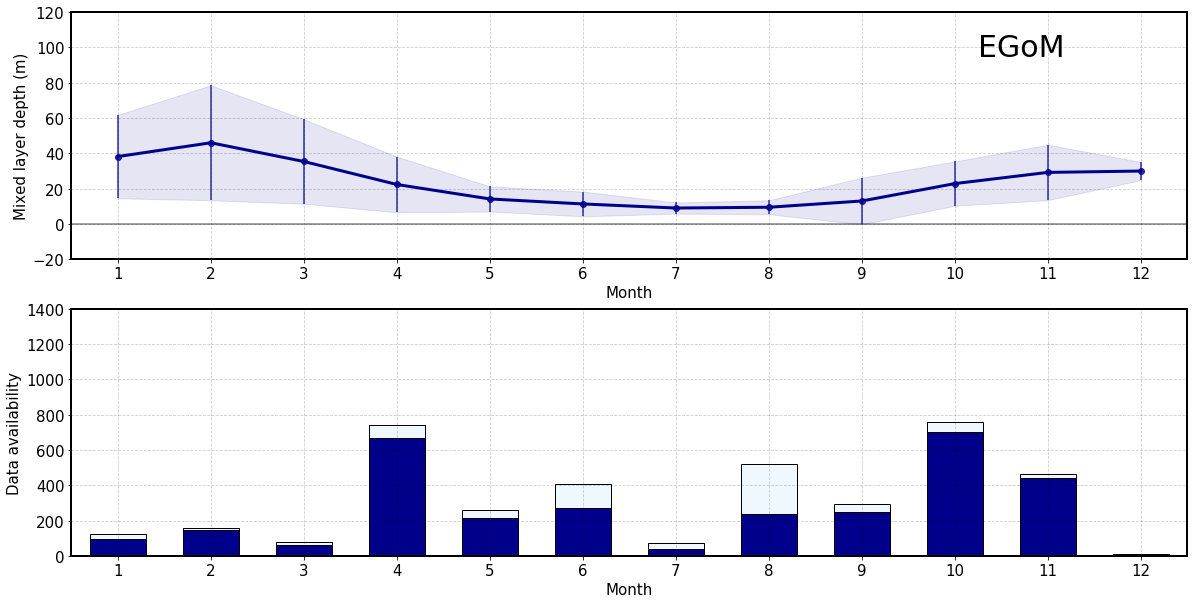

In [140]:
plt.figure(figsize=(20,10))
plt.figure(1)

plt.subplot(211)
plt.ylim(-20,120)
plt.xlim(0.5,12.5)
plt.plot(month, mld_mean, linestyle='-', color='darkblue', linewidth=3,alpha = 1, zorder= 30)
plt.errorbar(month,mld_mean, mld_std,linestyle='None', marker='o',color='darkblue',alpha= 0.8, markersize=6, zorder = 30)
plt.fill_between(month, mean_asarray - std_asarray, mean_asarray + std_asarray,color = 'darkblue', alpha = 0.1,zorder = 30)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Mixed layer depth (m)', fontsize = 15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 15) 
plt.yticks([-20,0,20,40,60,80,100,120], fontsize = 15) 
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.text(10.25, 95, 'EGoM', dict(size=30))
plt.subplot(212)
plt.xlim(0.5,12.5)
plt.ylim(0,1400)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 15) 
plt.yticks([0,200,400,600,800,1000,1200,1400], fontsize = 15) 
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Data availability', fontsize = 15)
plt.bar(month, seasonyeardepth_len, color='darkblue', edgecolor='black', width = 0.6)
plt.bar(month, diff, bottom=seasonyeardepth_len, color='aliceblue', edgecolor='black', width=0.6)

plt.savefig('seasonal_EGoM')
plt.show()

In [68]:
# polygon_t
seasonyeardepth_len = [162, 250, 174, 897, 684, 375, 58,  282, 484, 1202, 827, 62]
countwithinpolygon_list = [207, 302, 200, 1048, 912, 598, 148, 610, 583, 1282, 881, 67]
diff = [207 - 162, 302 - 250, 200 - 174, 1048 - 897, 912 - 684, 598 - 375,  148 - 58, 610 - 282, 583 - 484, 1282 - 1202, 881 - 827, 5]

mld_mean = [66.70987654320987, 68.69839999999999, 44.233333333333334, 22.47123745819398, 13.233479532163743, 10.674666666666667, 8.172413793103448, 8.868794326241135, 12.632231404958677, 20.991680532445923, 30.308343409915356, 36.33870967741935]
mld_std = [35.78013831045965, 42.29872051776507, 40.16136894523835, 18.719474532830993, 8.204406471748865, 4.992209753428058, 2.34989310860701, 2.991800490934591, 6.424793335275244, 10.723258997706056, 17.787281722872695, 19.461246477656562]
mld_max = [166.0, 187.0, 220.0, 168.0, 73.0, 48.0, 17.0, 26.0, 49.0, 61.0, 121.0, 80.0]
mld_min = [6.0, 6.0, 6.0, 6.0, 5.1, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0]

In [72]:
print(diff)

[45, 52, 26, 151, 228, 223, 90, 328, 99, 80, 54, 5]


In [69]:
month = [1,2,3,4,5,6,7,8,9,10,11,12]

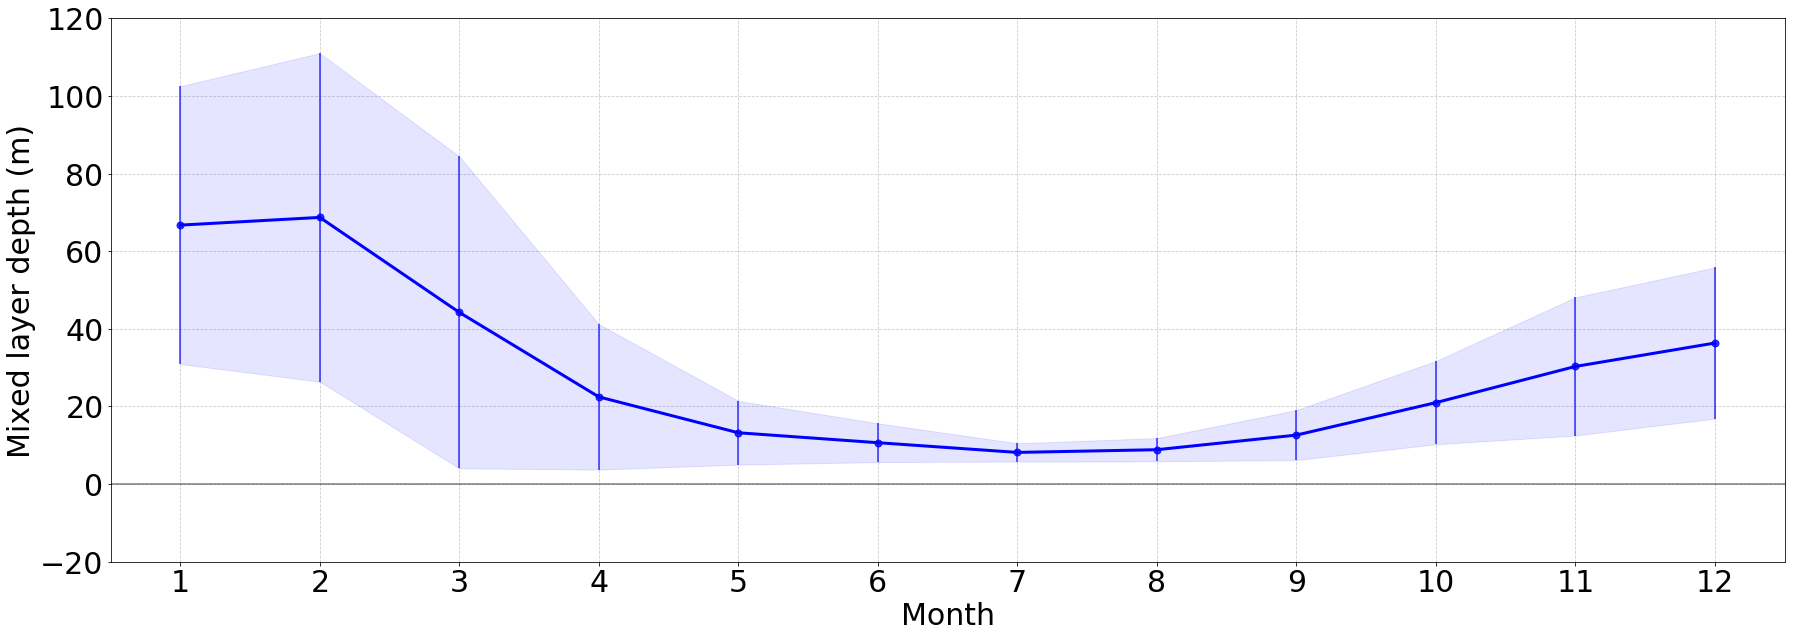

In [70]:
plt.figure(figsize=(30,10))
plt.ylim(-20,120)
plt.xlim(0.5,12.5)

mean_asarray = np.asarray(mld_mean)
std_asarray = np.asarray(mld_std)

plt.plot(month, mld_mean, linestyle='-', color='blue', linewidth=3,alpha = 1, zorder= 30)
plt.errorbar(month,mld_mean, mld_std,linestyle='None', marker='o',color='blue',alpha= 0.8, markersize=7, zorder = 30)
plt.fill_between(month, mean_asarray - std_asarray, mean_asarray + std_asarray,color = 'blue', alpha = 0.1,zorder = 30)

plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)

plt.xlabel('Month', fontsize = 30)
plt.ylabel('Mixed layer depth (m)', fontsize = 30)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 30) 
plt.yticks([-20,0,20,40,60,80,100,120], fontsize = 30) 
# plt.grid(True)
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
# plt.savefig('seasonal_EasternGoM')
plt.show()

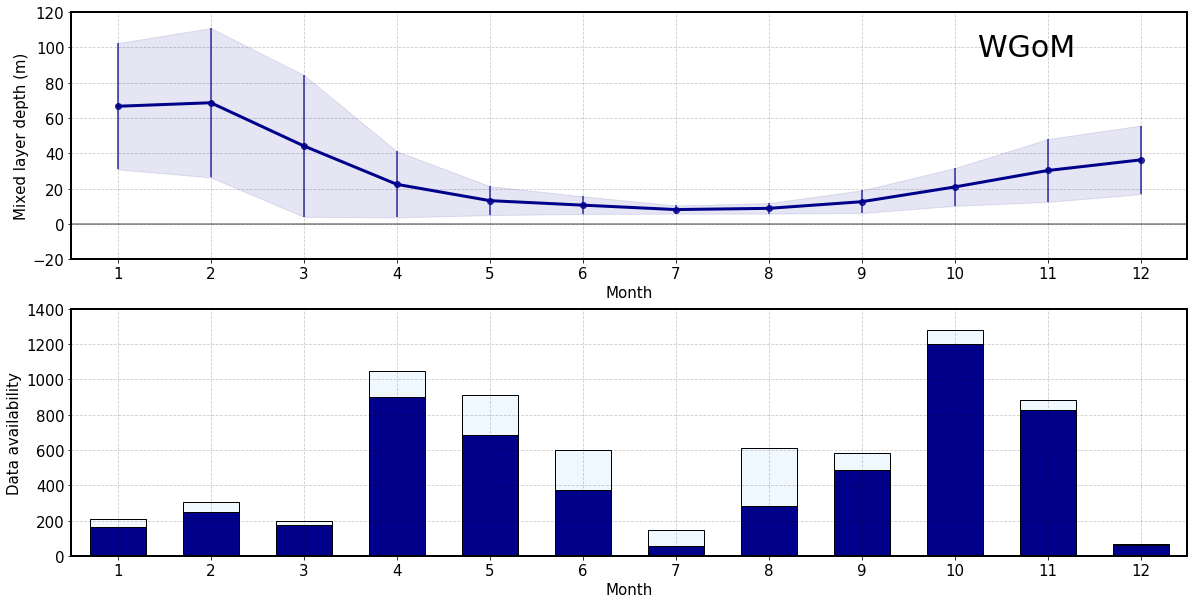

In [71]:
plt.figure(figsize=(20,10))
plt.figure(1)

plt.subplot(211)
plt.ylim(-20,120)
plt.xlim(0.5,12.5)
plt.plot(month, mld_mean, linestyle='-', color='darkblue', linewidth=3,alpha = 1, zorder= 30)
plt.errorbar(month,mld_mean, mld_std,linestyle='None', marker='o',color='darkblue',alpha= 0.8, markersize=6, zorder = 30)
plt.fill_between(month, mean_asarray - std_asarray, mean_asarray + std_asarray,color = 'darkblue', alpha = 0.1,zorder = 30)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Mixed layer depth (m)', fontsize = 15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 15) 
plt.yticks([-20,0,20,40,60,80,100,120], fontsize = 15) 
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.text(10.25, 95, 'WGoM', dict(size=30))
plt.subplot(212)
plt.xlim(0.5,12.5)
plt.ylim(0,1400)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 15) 
plt.yticks([0,200,400,600,800,1000,1200,1400], fontsize = 15) 
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Data availability', fontsize = 15)
plt.bar(month, seasonyeardepth_len, color='darkblue', edgecolor='black', width = 0.6)
plt.bar(month, diff, bottom=seasonyeardepth_len, color='aliceblue', edgecolor='black', width=0.6)

plt.savefig('seasonal_WGoM')
plt.show()

In [8]:
# x and v are in the Mid-Atlantic Bight. 

In [641]:
cti_listofarrays = []
finaldepth = []; finallat = [];finallon = []; years = []
seasonyeardepth = []; countwithinpolygon = []; correctedwospatdiffmean = [] ; latlat = []; ydyd = []
ratio_of_water_column = []; now = []; later = []; ratio_of_water_column_corrected = [] ; lonlon = []
for year in range(1993,2019):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    lat_intermediate = []; lon_intermediate = []; yd_intermediate = []
    p_intermediate = []; t_intermediate = []; sal_intermediate = []
    floor_intermediate = []; surfaceval_list = []
    seasonyeardepth2 = []; ratio_of_water_column2 = []; counterii = []
    
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        gear = npfile[i]['gear']
        floordepth = npfile[i]['depth']
#         if (yd > 334 and yd <= 365) or (yd >= 0 and yd <= 59) :
#         if yd > 243 and yd <= 334:
        if (yd > 334 and yd <= 365) or (yd >= 0 and yd <= 59) :
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            p_intermediate.append(npfile[i]['p'])
            t_intermediate.append(npfile[i]['t'])
            yd_intermediate.append(npfile[i]['yd'])
            sal_intermediate.append(npfile[i]['s'])
            floor_intermediate.append(npfile[i]['depth'])
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate,'depth': floor_intermediate, 's': sal_intermediate})
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate,'date': yd_intermediate})
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if isinstance(month_df['p'].iloc[ii], int) or isinstance(month_df['p'].iloc[ii], float) or isinstance(month_df['t'].iloc[ii], int) or isinstance(month_df['t'].iloc[ii], float):
            pass
        elif polygon_y.contains(point) == True or polygon_t.contains(point) == True or polygon_w.contains(point) == True:
            CT = gsw.CT_from_pt(month_df['s'].iloc[ii],month_df['t'].iloc[ii])
            DENS = gsw.sigma0(month_df['s'].iloc[ii],CT)
            pt_df = pd.DataFrame({'p': month_df['p'].iloc[ii],'t': month_df['t'].iloc[ii], 's': month_df['s'].iloc[ii], 'CT': CT, 'DENSMLD': DENS}) 
            df_ptsnew = pt_df.dropna()
            df_final = pd.DataFrame(df_ptsnew.values)
            countwithinpolygon.append(1)
            l=[i for i in df_final[0] if i<=4] 
            if len(l) > 0:
                surfaceval = []
                numrange = []
                for iii in range(len(l)):
                    val = df_final[1][iii]
                    numrange.append(iii)
                    surfaceval.append(val)            
            surfacevalmean = statistics.mean(surfaceval)
            densfin = []; tempfin = []; pressurefin = []; salfin = []
            for iii in range(numrange[-1],len(df_final)):
                tempfin.append(df_final[1][iii])
                pressurefin.append(df_final[0][iii])
                salfin.append(df_final[2][iii])
                densfin.append(df_final[4][iii])
            d = {'temp': list(reversed(tempfin)), 'sal': list(reversed(salfin)), 'pressure': list(reversed(pressurefin)),'density': list(reversed(densfin))}
            dunreversed = {'temp': list(tempfin), 'sal': list(salfin), 'pressure': list(pressurefin), 'density': list(densfin)}
            dffinunreversed = pd.DataFrame(dunreversed)
            dffin = pd.DataFrame(d)
            
            for ix in range(len(dffinunreversed)):
                if dffinunreversed.at[ix,'temp'] >= (surfacevalmean - 0.2) and dffinunreversed.at[ix,'temp'] <= (surfacevalmean + 0.2):
                    if dffinunreversed.at[len(dffinunreversed)-1,'temp'] <= (surfacevalmean + 0.2) and dffinunreversed.at[len(dffinunreversed)-1,'temp'] >= (surfacevalmean - 0.2):
                        looknow = list(dffinunreversed['temp'].values)
                        looknow2 = [i for i in looknow if i >= (surfacevalmean + 0.2)]
                        looknow3 = [i for i in looknow if i <= (surfacevalmean - 0.2)]
                        if len(looknow2) == 0 and len(looknow3) == 0:
                            if dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
                                if dffinunreversed.at[ix,'pressure'] <= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
                                    seasonyeardepth.append(month_df['depth'].iloc[ii])
                                    seasonyeardepth2.append(month_df['depth'].iloc[ii])
                                    ratio_of_water_column.append(1.0)
                                    ratio_of_water_column2.append(1.0)
                                    latlat.append(month_df['lat'].iloc[ii])
                                    lonlon.append(month_df['lat'].iloc[ii])
                                    ydyd.append(month_df['day'].iloc[ii])
                                    years.append(year)
                                    counterii.append(ii)
#                                     fig, (ax1) = plt.subplots(1,1)
#                                     ax1.plot(df_final[1],df_final[0]*-1,color='purple')
#                                     ax1.axhline(y=month_df['depth'].iloc[ii]*-1, color='r', linestyle='--')
#                                     ax1.axhline(y=month_df['depth'].iloc[ii]*-1, color='green', linestyle='--')
                                    break
                                else:
                                    seasonyeardepth.append(month_df['depth'].iloc[ii])
                                    seasonyeardepth2.append(month_df['depth'].iloc[ii])
                                    ratio_of_water_column.append(1.0)
                                    ratio_of_water_column2.append(1.0)
                                    latlat.append(month_df['lat'].iloc[ii])
                                    lonlon.append(month_df['lat'].iloc[ii])
                                    ydyd.append(month_df['day'].iloc[ii])
                                    years.append(year)
                                    counterii.append(ii)
#                                     fig, (ax1) = plt.subplots(1,1)
#                                     ax1.plot(df_final[1],df_final[0]*-1,color='green')
#                                     ax1.axhline(y=dffinunreversed.at[ix,'pressure']*-1, color='r', linestyle='--')
#                                     ax1.axhline(y=month_df['depth'].iloc[ii]*-1, color='green', linestyle='--')
                                    break
                            else:
                                if dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
#                                     fig, (ax1) = plt.subplots(1,1)
#                                     ax1.plot(df_final[1],df_final[0]*-1,color='blue')
#                                     ax1.axhline(y=month_df['depth'].iloc[ii]*-1, color='r', linestyle='--')
                                    seasonyeardepth.append(month_df['depth'].iloc[ii])
                                    seasonyeardepth2.append(month_df['depth'].iloc[ii])
                                    ratio_val = 1.0
                                    ratio_of_water_column.append(ratio_val)
                                    ratio_of_water_column2.append(ratio_val)
                                    latlat.append(month_df['lat'].iloc[ii])
                                    lonlon.append(month_df['lat'].iloc[ii])
                                    ydyd.append(month_df['day'].iloc[ii])
                                    years.append(year)
                                    counterii.append(ii)
                                    break
                        else:
                            if dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
                                for ix in range(len(dffinunreversed['temp'])):
                                    if dffinunreversed.at[ix,'temp'] >= (surfacevalmean - 0.2) and dffinunreversed.at[ix,'temp'] <= (surfacevalmean + 0.2):
                                        pass
                                    else:
                                        if dffinunreversed.at[ix,'pressure'] >= 5:
                                            seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                                            seasonyeardepth2.append(dffinunreversed.at[ix,'pressure'])
                                            ratio_val = 1.0
                                            ratio_of_water_column.append(ratio_val)
                                            ratio_of_water_column2.append(ratio_val)
                                            latlat.append(month_df['lat'].iloc[ii])
                                            lonlon.append(month_df['lat'].iloc[ii])
                                            ydyd.append(month_df['day'].iloc[ii])
                                            years.append(year)
                                            counterii.append(ii)
#                                             fig, (ax1) = plt.subplots(1,1)                                
#                                             ax1.plot(df_final[1],df_final[0]*-1,color='black')
#                                             ax1.axhline(y=dffinunreversed.at[ix,'temp']*-1, color='r', linestyle='--')
#                                             ax1.axhline(y=month_df['depth'].iloc[ii]*-1, color='green', linestyle='--')
                                            break
                                        else:
#                                             seasonyeardepth.append('pass2')
                                            break
                                break 
                    else:
                        if dffinunreversed.at[ix,'temp'] <= (surfacevalmean - 0.2) or dffinunreversed.at[ix,'temp'] >= (surfacevalmean + 0.2):
                            if dffinunreversed.at[ix,'pressure'] <= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
                                pass
                            else:
#                                 seasonyeardepth.append(5)
                                seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                                seasonyeardepth2.append(dffinunreversed.at[ix,'pressure'])
                                ratio_val = (dffinunreversed.at[ix,'pressure'])/(month_df['depth'].iloc[ii])
                                ratio_of_water_column.append(ratio_val)
                                ratio_of_water_column2.append(ratio_val)
                                latlat.append(month_df['lat'].iloc[ii])
                                lonlon.append(month_df['lat'].iloc[ii])
                                ydyd.append(month_df['day'].iloc[ii])
                                years.append(year)
                                counterii.append(ii)
#                                 fig, (ax1) = plt.subplots(1,1)
#                                 ax1.plot(df_final[1],df_final[0]*-1,color='orange')
#                                 ax1.axhline(y=dffinunreversed.at[ix,'pressure']*-1, color='r', linestyle='--')
                                break           
                        else: 
                            if dffinunreversed.at[ix,'temp'] >= (surfacevalmean + 0.2) or dffinunreversed.at[ix,'temp'] <= (surfacevalmean - 0.2):
                                break
#                                 pass
                elif dffinunreversed.at[ix,'temp'] <= (surfacevalmean - 0.2) or dffinunreversed.at[ix,'temp'] >= (surfacevalmean + 0.2):
                    if dffinunreversed.at[ix,'pressure'] <= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
                        pass
                    else:
                        for ix in range(len(dffinunreversed['temp'])):
                            if dffinunreversed.at[ix,'temp'] >= (surfacevalmean - 0.2) and dffinunreversed.at[ix,'temp'] <= (surfacevalmean + 0.2):
                                pass
                            else:
                                if dffinunreversed.at[ix,'pressure'] >= 5.0:
                                    seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                                    seasonyeardepth2.append(dffinunreversed.at[ix,'pressure'])
                                    ratio_val = (dffinunreversed.at[ix,'pressure'])/(month_df['depth'].iloc[ii])
                                    ratio_of_water_column.append(ratio_val)
                                    ratio_of_water_column2.append(ratio_val)
                                    latlat.append(month_df['lat'].iloc[ii])
                                    lonlon.append(month_df['lat'].iloc[ii])
                                    ydyd.append(month_df['day'].iloc[ii])
                                    years.append(year)
                                    counterii.append(ii)
#                                     fig, (ax1) = plt.subplots(1,1)
#                                     ax1.plot(df_final[1],df_final[0]*-1,color='pink')
#                                     ax1.axhline(y=dffinunreversed.at[ix,'pressure']*-1, color='r', linestyle='--')
#                                     ax1.axhline(y=month_df['depth'].iloc[ii]*-1, color='green', linestyle='--')
                                    break
                                else:
                                    break
                        break
                else: 
#                     fig, (ax1) = plt.subplots(1,1)
#                     ax1.plot(df_final[1],df_final[0]*-1,color='grey')
#                     ax1.axhline(y=dffinunreversed.at[ix,'pressure']*-1, color='r', linestyle='--')
#                     pass
                    break
                            
    print(year)
#     print(seasonyeardepth2)
#     print(ratio_of_water_column2)
    correctedwospatdiffmean.append(np.mean(np.mean(seasonyeardepth2)))
    ratio_of_water_column_corrected.append(np.mean(np.mean(ratio_of_water_column2)))
    
    inlat = []; inlon = []
    for timer in counterii:
        inlat.append(newdf['lat'][timer])
        inlon.append(newdf['lon'][timer])

    finaldepth.append(seasonyeardepth) # change back to seasonyeardepth
    finallat.append(inlat)
    finallon.append(inlon)
    
    flat_depth = [item for sublist in finaldepth for item in sublist]
    flat_lat = [item for sublist in finallat for item in sublist]
    flat_lon = [item for sublist in finallon for item in sublist]
    
    flat_lon[:] = [x *-1 for x in flat_lon]
    # flat_lon[:] = [x *-1 for x in flat_lon]
    
    name = 'dfplottablefull_{}'.format(year)
    
    name = pd.DataFrame(list(zip(flat_depth,flat_lon,flat_lat)),columns = ['depth','lon','lat'])

    x = 'x_{}'.format(year)
    x = name['lon']
    y = 'y_{}'.format(year)
    y = name['lat']
    z = 'z_{}'.format(year)
    z = name['depth']
    
    xi = np.arange(-76,-65,0.5)
    yi = np.arange(35,46,0.5)
    
#     path_new = Path(newpath) #
    
    xi,yi = np.meshgrid(xi,yi)
#     xi, yi = xi.flatten(), yi.flatten() #
    
#     grid = path_new.contains_points(points) ###
#     grid = grid.reshape((22,22)) ###
    
    zi = 'zi_{}'.format(year)
    zi = griddata((x,y),z,(xi,yi),method='linear')
    
    zi = zi.reshape((22,22)) ###
    
#     newgridded = np.where(grid == False, np.nan, grid) ###
#     newgriddednew = np.where(grid == 1., zi, grid) ###
#     newgriddedlast = np.where(newgriddednew == 0., np.nan, newgriddednew) ###
    
#     zi_listofarrays.append(newgriddedlast)
        
    cti_listofarrays.append(zi)

1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018


In [642]:
zti_listofarrays = []
finaldepth = []; finallat = [];finallon = []; years = []
seasonyeardepth = []; countwithinpolygon = []; correctedwospatdiffmean = [] ; latlat = []; ydyd = []
ratio_of_water_column = []; now = []; later = []; ratio_of_water_column_corrected = [] ; lonlon = []
for year in range(1993,2019):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    lat_intermediate = []; lon_intermediate = []; yd_intermediate = []
    p_intermediate = []; t_intermediate = []; sal_intermediate = []
    floor_intermediate = []; surfaceval_list = []
    seasonyeardepth2 = []; ratio_of_water_column2 = []; counterii = []
    
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        gear = npfile[i]['gear']
        floordepth = npfile[i]['depth']
#         if yd > 243 and yd <= 334 and floordepth <= 200:
        if (yd > 334 and yd <= 365 and floordepth <= 200) or (yd >= 0 and yd <= 59 and floordepth <= 200) :
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            p_intermediate.append(npfile[i]['p'])
            t_intermediate.append(npfile[i]['t'])
            yd_intermediate.append(npfile[i]['yd'])
            sal_intermediate.append(npfile[i]['s'])
            floor_intermediate.append(npfile[i]['depth'])
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate,'depth': floor_intermediate, 's': sal_intermediate})
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate,'date': yd_intermediate})
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if isinstance(month_df['p'].iloc[ii], int) or isinstance(month_df['p'].iloc[ii], float) or isinstance(month_df['t'].iloc[ii], int) or isinstance(month_df['t'].iloc[ii], float):
            pass
        elif polygon_v.contains(point) == True or polygon_x.contains(point) == True:
            CT = gsw.CT_from_pt(month_df['s'].iloc[ii],month_df['t'].iloc[ii])
            DENS = gsw.sigma0(month_df['s'].iloc[ii],CT)
            pt_df = pd.DataFrame({'p': month_df['p'].iloc[ii],'t': month_df['t'].iloc[ii], 's': month_df['s'].iloc[ii], 'CT': CT, 'DENSMLD': DENS}) 
            df_ptsnew = pt_df.dropna()
            df_final = pd.DataFrame(df_ptsnew.values)
            countwithinpolygon.append(1)
            l=[i for i in df_final[0] if i<=4] 
            if len(l) > 0:
                surfaceval = []
                numrange = []
                for iii in range(len(l)):
                    val = df_final[1][iii]
                    numrange.append(iii)
                    surfaceval.append(val)            
            surfacevalmean = statistics.mean(surfaceval)
            densfin = []; tempfin = []; pressurefin = []; salfin = []
            for iii in range(numrange[-1],len(df_final)):
                tempfin.append(df_final[1][iii])
                pressurefin.append(df_final[0][iii])
                salfin.append(df_final[2][iii])
                densfin.append(df_final[4][iii])
            d = {'temp': list(reversed(tempfin)), 'sal': list(reversed(salfin)), 'pressure': list(reversed(pressurefin)),'density': list(reversed(densfin))}
            dunreversed = {'temp': list(tempfin), 'sal': list(salfin), 'pressure': list(pressurefin), 'density': list(densfin)}
            dffinunreversed = pd.DataFrame(dunreversed)
            dffin = pd.DataFrame(d)
            
            for ix in range(len(dffinunreversed)):
                if dffinunreversed.at[ix,'temp'] >= (surfacevalmean - 0.2) and dffinunreversed.at[ix,'temp'] <= (surfacevalmean + 0.2):
                    if dffinunreversed.at[len(dffinunreversed)-1,'temp'] <= (surfacevalmean + 0.2) and dffinunreversed.at[len(dffinunreversed)-1,'temp'] >= (surfacevalmean - 0.2):
                        looknow = list(dffinunreversed['temp'].values)
                        looknow2 = [i for i in looknow if i >= (surfacevalmean + 0.2)]
                        looknow3 = [i for i in looknow if i <= (surfacevalmean - 0.2)]
                        if len(looknow2) == 0 and len(looknow3) == 0:
                            if dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
                                if dffinunreversed.at[ix,'pressure'] <= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
                                    seasonyeardepth.append(month_df['depth'].iloc[ii])
                                    seasonyeardepth2.append(month_df['depth'].iloc[ii])
                                    ratio_of_water_column.append(1.0)
                                    ratio_of_water_column2.append(1.0)
                                    latlat.append(month_df['lat'].iloc[ii])
                                    lonlon.append(month_df['lat'].iloc[ii])
                                    ydyd.append(month_df['day'].iloc[ii])
                                    years.append(year)
                                    counterii.append(ii)
#                                     fig, (ax1) = plt.subplots(1,1)
#                                     ax1.plot(df_final[1],df_final[0]*-1,color='purple')
#                                     ax1.axhline(y=month_df['depth'].iloc[ii]*-1, color='r', linestyle='--')
#                                     ax1.axhline(y=month_df['depth'].iloc[ii]*-1, color='green', linestyle='--')
                                    break
                                else:
                                    seasonyeardepth.append(month_df['depth'].iloc[ii])
                                    seasonyeardepth2.append(month_df['depth'].iloc[ii])
                                    ratio_of_water_column.append(1.0)
                                    ratio_of_water_column2.append(1.0)
                                    latlat.append(month_df['lat'].iloc[ii])
                                    lonlon.append(month_df['lat'].iloc[ii])
                                    ydyd.append(month_df['day'].iloc[ii])
                                    years.append(year)
                                    counterii.append(ii)
#                                     fig, (ax1) = plt.subplots(1,1)
#                                     ax1.plot(df_final[1],df_final[0]*-1,color='green')
#                                     ax1.axhline(y=dffinunreversed.at[ix,'pressure']*-1, color='r', linestyle='--')
#                                     ax1.axhline(y=month_df['depth'].iloc[ii]*-1, color='green', linestyle='--')
                                    break
                            else:
                                if dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
#                                     fig, (ax1) = plt.subplots(1,1)
#                                     ax1.plot(df_final[1],df_final[0]*-1,color='blue')
#                                     ax1.axhline(y=month_df['depth'].iloc[ii]*-1, color='r', linestyle='--')
                                    seasonyeardepth.append(month_df['depth'].iloc[ii])
                                    seasonyeardepth2.append(month_df['depth'].iloc[ii])
                                    ratio_val = 1.0
                                    ratio_of_water_column.append(ratio_val)
                                    ratio_of_water_column2.append(ratio_val)
                                    latlat.append(month_df['lat'].iloc[ii])
                                    lonlon.append(month_df['lat'].iloc[ii])
                                    ydyd.append(month_df['day'].iloc[ii])
                                    years.append(year)
                                    counterii.append(ii)
                                    break
                        else:
                            if dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
                                for ix in range(len(dffinunreversed['temp'])):
                                    if dffinunreversed.at[ix,'temp'] >= (surfacevalmean - 0.2) and dffinunreversed.at[ix,'temp'] <= (surfacevalmean + 0.2):
                                        pass
                                    else:
                                        if dffinunreversed.at[ix,'pressure'] >= 5:
                                            seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                                            seasonyeardepth2.append(dffinunreversed.at[ix,'pressure'])
                                            ratio_val = 1.0
                                            ratio_of_water_column.append(ratio_val)
                                            ratio_of_water_column2.append(ratio_val)
                                            latlat.append(month_df['lat'].iloc[ii])
                                            lonlon.append(month_df['lat'].iloc[ii])
                                            ydyd.append(month_df['day'].iloc[ii])
                                            years.append(year)
                                            counterii.append(ii)
#                                             fig, (ax1) = plt.subplots(1,1)                                
#                                             ax1.plot(df_final[1],df_final[0]*-1,color='black')
#                                             ax1.axhline(y=dffinunreversed.at[ix,'temp']*-1, color='r', linestyle='--')
#                                             ax1.axhline(y=month_df['depth'].iloc[ii]*-1, color='green', linestyle='--')
                                            break
                                        else:
#                                             seasonyeardepth.append('pass2')
                                            break
                                break 
                    else:
                        if dffinunreversed.at[ix,'temp'] <= (surfacevalmean - 0.2) or dffinunreversed.at[ix,'temp'] >= (surfacevalmean + 0.2):
                            if dffinunreversed.at[ix,'pressure'] <= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
                                pass
                            else:
#                                 seasonyeardepth.append(5)
                                seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                                seasonyeardepth2.append(dffinunreversed.at[ix,'pressure'])
                                ratio_val = (dffinunreversed.at[ix,'pressure'])/(month_df['depth'].iloc[ii])
                                ratio_of_water_column.append(ratio_val)
                                ratio_of_water_column2.append(ratio_val)
                                latlat.append(month_df['lat'].iloc[ii])
                                lonlon.append(month_df['lat'].iloc[ii])
                                ydyd.append(month_df['day'].iloc[ii])
                                years.append(year)
                                counterii.append(ii)
#                                 fig, (ax1) = plt.subplots(1,1)
#                                 ax1.plot(df_final[1],df_final[0]*-1,color='orange')
#                                 ax1.axhline(y=dffinunreversed.at[ix,'pressure']*-1, color='r', linestyle='--')
                                break           
                        else: 
                            if dffinunreversed.at[ix,'temp'] >= (surfacevalmean + 0.2) or dffinunreversed.at[ix,'temp'] <= (surfacevalmean - 0.2):
                                break
#                                 pass
                elif dffinunreversed.at[ix,'temp'] <= (surfacevalmean - 0.2) or dffinunreversed.at[ix,'temp'] >= (surfacevalmean + 0.2):
                    if dffinunreversed.at[ix,'pressure'] <= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
                        pass
                    else:
                        for ix in range(len(dffinunreversed['temp'])):
                            if dffinunreversed.at[ix,'temp'] >= (surfacevalmean - 0.2) and dffinunreversed.at[ix,'temp'] <= (surfacevalmean + 0.2):
                                pass
                            else:
                                if dffinunreversed.at[ix,'pressure'] >= 5.0:
                                    seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                                    seasonyeardepth2.append(dffinunreversed.at[ix,'pressure'])
                                    ratio_val = (dffinunreversed.at[ix,'pressure'])/(month_df['depth'].iloc[ii])
                                    ratio_of_water_column.append(ratio_val)
                                    ratio_of_water_column2.append(ratio_val)
                                    latlat.append(month_df['lat'].iloc[ii])
                                    lonlon.append(month_df['lat'].iloc[ii])
                                    ydyd.append(month_df['day'].iloc[ii])
                                    years.append(year)
                                    counterii.append(ii)
#                                     fig, (ax1) = plt.subplots(1,1)
#                                     ax1.plot(df_final[1],df_final[0]*-1,color='pink')
#                                     ax1.axhline(y=dffinunreversed.at[ix,'pressure']*-1, color='r', linestyle='--')
#                                     ax1.axhline(y=month_df['depth'].iloc[ii]*-1, color='green', linestyle='--')
                                    break
                                else:
                                    break
                        break
                else: 
#                     fig, (ax1) = plt.subplots(1,1)
#                     ax1.plot(df_final[1],df_final[0]*-1,color='grey')
#                     ax1.axhline(y=dffinunreversed.at[ix,'pressure']*-1, color='r', linestyle='--')
#                     pass
                    break
                            
    print(year)
#     print(seasonyeardepth2)
#     print(ratio_of_water_column2)
    correctedwospatdiffmean.append(np.mean(np.mean(seasonyeardepth2)))
    ratio_of_water_column_corrected.append(np.mean(np.mean(ratio_of_water_column2)))
    
    inlat = []; inlon = []
    for timer in counterii:
        inlat.append(newdf['lat'][timer])
        inlon.append(newdf['lon'][timer])

    finaldepth.append(seasonyeardepth) # change back to seasonyeardepth
    finallat.append(inlat)
    finallon.append(inlon)
    
    flat_depth = [item for sublist in finaldepth for item in sublist]
    flat_lat = [item for sublist in finallat for item in sublist]
    flat_lon = [item for sublist in finallon for item in sublist]
    
    flat_lon[:] = [x *-1 for x in flat_lon]
    # flat_lon[:] = [x *-1 for x in flat_lon]
    
    name = 'dfplottablefull_{}'.format(year)
    
    name = pd.DataFrame(list(zip(flat_depth,flat_lon,flat_lat)),columns = ['depth','lon','lat'])

    x = 'x_{}'.format(year)
    x = name['lon']
    y = 'y_{}'.format(year)
    y = name['lat']
    z = 'z_{}'.format(year)
    z = name['depth']
    
    xi = np.arange(-76,-65,0.5)
    yi = np.arange(35,46,0.5)
    
#     path_new = Path(newpath) #
    
    xi,yi = np.meshgrid(xi,yi)
#     xi, yi = xi.flatten(), yi.flatten() #
    
#     grid = path_new.contains_points(points) ###
#     grid = grid.reshape((22,22)) ###
    
    zi = 'zi_{}'.format(year)
    zi = griddata((x,y),z,(xi,yi),method='linear')
    
    zi = zi.reshape((22,22)) ###
    
#     newgridded = np.where(grid == False, np.nan, grid) ###
#     newgriddednew = np.where(grid == 1., zi, grid) ###
#     newgriddedlast = np.where(newgriddednew == 0., np.nan, newgriddednew) ###
    
#     zi_listofarrays.append(newgriddedlast)
        
    zti_listofarrays.append(zi)

1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018


In [676]:
ci_listofarrays = []
finaldepth = []; finallat = [];finallon = []; years = []
seasonyeardepth = []; countwithinpolygon = []; correctedwospatdiffmean = [] ; latlat = []; ydyd = []
ratio_of_water_column = []; now = []; later = []; ratio_of_water_column_corrected = [] ; lonlon = []
for year in range(1993,2019):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    lat_intermediate = []; lon_intermediate = []; yd_intermediate = []
    p_intermediate = []; t_intermediate = []; sal_intermediate = []
    floor_intermediate = []; surfaceval_list = []
    seasonyeardepth2 = []; ratio_of_water_column2 = []; counterii = []
        
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        gear = npfile[i]['gear']
        floordepth = npfile[i]['depth']
        if (yd > 334 and yd <= 365) or (yd >= 0 and yd <= 59) :
#         if yd > 243 and yd <= 334:
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            p_intermediate.append(npfile[i]['p'])
            t_intermediate.append(npfile[i]['t'])
            yd_intermediate.append(npfile[i]['yd'])
            sal_intermediate.append(npfile[i]['s'])
            floor_intermediate.append(npfile[i]['depth'])
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate,'depth': floor_intermediate, 's': sal_intermediate})
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate,'date': yd_intermediate})
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if isinstance(month_df['p'].iloc[ii], int) or isinstance(month_df['p'].iloc[ii], float) or isinstance(month_df['t'].iloc[ii], int) or isinstance(month_df['t'].iloc[ii], float):
            pass
        elif polygon_t.contains(point) == True:
#         elif polygon_y.contains(point) == True or polygon_t.contains(point) == True or polygon_w.contains(point) == True:
            CT = gsw.CT_from_pt(month_df['s'].iloc[ii],month_df['t'].iloc[ii])
            DENS = gsw.sigma0(month_df['s'].iloc[ii],CT)
            pt_df = pd.DataFrame({'p': month_df['p'].iloc[ii],'t': month_df['t'].iloc[ii], 's': month_df['s'].iloc[ii], 'CT': CT, 'DENSMLD': DENS}) 
            df_ptsnew = pt_df.dropna()
            df_final = pd.DataFrame(df_ptsnew.values)
            countwithinpolygon.append(1)
            l=[i for i in df_final[0] if i<=4] 
            if len(l) > 0:
                surfaceval = []
                numrange = []
                for iii in range(len(l)):
                    val = df_final[4][iii]
                    numrange.append(iii)
                    surfaceval.append(val)            
            surfacevalmean = statistics.mean(surfaceval)
            densfin = []; tempfin = []; pressurefin = []; salfin = []
            for iii in range(numrange[-1],len(df_final)):
                tempfin.append(df_final[1][iii])
                pressurefin.append(df_final[0][iii])
                salfin.append(df_final[2][iii])
                densfin.append(df_final[4][iii])
            d = {'temp': list(reversed(tempfin)), 'sal': list(reversed(salfin)), 'pressure': list(reversed(pressurefin)),'density': list(reversed(densfin))}
            dunreversed = {'temp': list(tempfin), 'sal': list(salfin), 'pressure': list(pressurefin), 'density': list(densfin)}
            dffinunreversed = pd.DataFrame(dunreversed)
            dffin = pd.DataFrame(d)
            
            for ix in range(len(dffinunreversed)):
                if dffinunreversed.at[ix,'density'] >= (surfacevalmean - 0.03) and dffinunreversed.at[ix,'density'] <= (surfacevalmean + 0.03):
                    if dffinunreversed.at[len(dffinunreversed)-1,'density'] <= (surfacevalmean + 0.03) and dffinunreversed.at[len(dffinunreversed)-1,'density'] >= (surfacevalmean - 0.03):
                        looknow = list(dffinunreversed['density'].values)
                        looknow2 = [i for i in looknow if i >= (surfacevalmean + 0.03)]
                        looknow3 = [i for i in looknow if i <= (surfacevalmean - 0.03)]
                        if len(looknow2) == 0 and len(looknow3) == 0:
                            if dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
                                if dffinunreversed.at[ix,'pressure'] <= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
                                    seasonyeardepth.append(month_df['depth'].iloc[ii])
                                    seasonyeardepth2.append(month_df['depth'].iloc[ii])
                                    ratio_of_water_column.append(1.0)
                                    ratio_of_water_column2.append(1.0)
                                    latlat.append(month_df['lat'].iloc[ii])
                                    lonlon.append(month_df['lat'].iloc[ii])
                                    ydyd.append(month_df['day'].iloc[ii])
                                    years.append(year)
                                    counterii.append(ii)
#                                     fig, (ax1) = plt.subplots(1,1)
#                                     ax1.plot(df_final[1],df_final[0]*-1,color='purple')
#                                     ax1.axhline(y=month_df['depth'].iloc[ii]*-1, color='r', linestyle='--')
#                                     ax1.axhline(y=month_df['depth'].iloc[ii]*-1, color='green', linestyle='--')
                                    break
                                else:
                                    seasonyeardepth.append(month_df['depth'].iloc[ii])
                                    seasonyeardepth2.append(month_df['depth'].iloc[ii])
                                    ratio_of_water_column.append(1.0)
                                    ratio_of_water_column2.append(1.0)
                                    latlat.append(month_df['lat'].iloc[ii])
                                    lonlon.append(month_df['lat'].iloc[ii])
                                    ydyd.append(month_df['day'].iloc[ii])
                                    years.append(year)
                                    counterii.append(ii)
#                                     fig, (ax1) = plt.subplots(1,1)
#                                     ax1.plot(df_final[1],df_final[0]*-1,color='green')
#                                     ax1.axhline(y=dffinunreversed.at[ix,'pressure']*-1, color='r', linestyle='--')
#                                     ax1.axhline(y=month_df['depth'].iloc[ii]*-1, color='green', linestyle='--')
                                    break
                            else:
                                if dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
#                                     fig, (ax1) = plt.subplots(1,1)
#                                     ax1.plot(df_final[1],df_final[0]*-1,color='blue')
#                                     ax1.axhline(y=month_df['depth'].iloc[ii]*-1, color='r', linestyle='--')
                                    seasonyeardepth.append(month_df['depth'].iloc[ii])
                                    seasonyeardepth2.append(month_df['depth'].iloc[ii])
                                    ratio_val = 1.0
                                    ratio_of_water_column.append(ratio_val)
                                    ratio_of_water_column2.append(ratio_val)
                                    latlat.append(month_df['lat'].iloc[ii])
                                    lonlon.append(month_df['lat'].iloc[ii])
                                    ydyd.append(month_df['day'].iloc[ii])
                                    years.append(year)
                                    counterii.append(ii)
                                    break
                        else:
                            if dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
                                for ix in range(len(dffinunreversed['density'])):
                                    if dffinunreversed.at[ix,'density'] >= (surfacevalmean - 0.03) and dffinunreversed.at[ix,'density'] <= (surfacevalmean + 0.03):
                                        pass
                                    else:
                                        if dffinunreversed.at[ix,'pressure'] >= 5:
                                            seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                                            seasonyeardepth2.append(dffinunreversed.at[ix,'pressure'])
                                            ratio_val = 1.0
                                            ratio_of_water_column.append(ratio_val)
                                            ratio_of_water_column2.append(ratio_val)
                                            latlat.append(month_df['lat'].iloc[ii])
                                            lonlon.append(month_df['lat'].iloc[ii])
                                            ydyd.append(month_df['day'].iloc[ii])
                                            years.append(year)
                                            counterii.append(ii)
#                                             fig, (ax1) = plt.subplots(1,1)                                
#                                             ax1.plot(df_final[1],df_final[0]*-1,color='black')
#                                             ax1.axhline(y=dffinunreversed.at[ix,'temp']*-1, color='r', linestyle='--')
#                                             ax1.axhline(y=month_df['depth'].iloc[ii]*-1, color='green', linestyle='--')
                                            break
                                        else:
#                                             seasonyeardepth.append('pass2')
                                            break
                                break 
                    else:
                        if dffinunreversed.at[ix,'density'] <= (surfacevalmean - 0.03) or dffinunreversed.at[ix,'density'] >= (surfacevalmean + 0.03):
                            if dffinunreversed.at[ix,'pressure'] <= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
                                pass
                            else:
#                                 seasonyeardepth.append(5)
                                seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                                seasonyeardepth2.append(dffinunreversed.at[ix,'pressure'])
                                ratio_val = (dffinunreversed.at[ix,'pressure'])/(month_df['depth'].iloc[ii])
                                ratio_of_water_column.append(ratio_val)
                                ratio_of_water_column2.append(ratio_val)
                                latlat.append(month_df['lat'].iloc[ii])
                                lonlon.append(month_df['lat'].iloc[ii])
                                ydyd.append(month_df['day'].iloc[ii])
                                years.append(year)
                                counterii.append(ii)
#                                 fig, (ax1) = plt.subplots(1,1)
#                                 ax1.plot(df_final[1],df_final[0]*-1,color='orange')
#                                 ax1.axhline(y=dffinunreversed.at[ix,'pressure']*-1, color='r', linestyle='--')
                                break           
                        else: 
                            if dffinunreversed.at[ix,'density'] >= (surfacevalmean + 0.03) or dffinunreversed.at[ix,'density'] <= (surfacevalmean - 0.03):
                                seasonyeardepth.append('pass4')
                                break
#                                 pass
                elif dffinunreversed.at[ix,'density'] <= (surfacevalmean - 0.03) or dffinunreversed.at[ix,'density'] >= (surfacevalmean + 0.03):
                    if dffinunreversed.at[ix,'pressure'] <= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
                        pass
                    else:
                        for ix in range(len(dffinunreversed['density'])):
                            if dffinunreversed.at[ix,'density'] >= (surfacevalmean - 0.03) and dffinunreversed.at[ix,'density'] <= (surfacevalmean + 0.03):
                                pass
                            else:
                                if dffinunreversed.at[ix,'pressure'] >= 5.0:
                                    seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                                    seasonyeardepth2.append(dffinunreversed.at[ix,'pressure'])
                                    ratio_val = (dffinunreversed.at[ix,'pressure'])/(month_df['depth'].iloc[ii])
                                    ratio_of_water_column.append(ratio_val)
                                    ratio_of_water_column2.append(ratio_val)
                                    latlat.append(month_df['lat'].iloc[ii])
                                    lonlon.append(month_df['lat'].iloc[ii])
                                    ydyd.append(month_df['day'].iloc[ii])
                                    years.append(year)
                                    counterii.append(ii)
#                                     fig, (ax1) = plt.subplots(1,1)
#                                     ax1.plot(df_final[1],df_final[0]*-1,color='pink')
#                                     ax1.axhline(y=dffinunreversed.at[ix,'pressure']*-1, color='r', linestyle='--')
#                                     ax1.axhline(y=month_df['depth'].iloc[ii]*-1, color='green', linestyle='--')
                                    break
                                else:
                                    break
                        break
                else: 
#                     fig, (ax1) = plt.subplots(1,1)
#                     ax1.plot(df_final[1],df_final[0]*-1,color='grey')
#                     ax1.axhline(y=dffinunreversed.at[ix,'pressure']*-1, color='r', linestyle='--')
#                     pass
                    break
                            
    print(year)
#     print(seasonyeardepth2)
#     print(ratio_of_water_column2)
    correctedwospatdiffmean.append(np.mean(np.mean(seasonyeardepth2)))
    ratio_of_water_column_corrected.append(np.mean(np.mean(ratio_of_water_column2)))
    
    inlat = []; inlon = []
    for timer in counterii:
        inlat.append(newdf['lat'][timer])
        inlon.append(newdf['lon'][timer])

    finaldepth.append(seasonyeardepth) # change back to seasonyeardepth
    finallat.append(inlat)
    finallon.append(inlon)
    
    flat_depth = [item for sublist in finaldepth for item in sublist]
    flat_lat = [item for sublist in finallat for item in sublist]
    flat_lon = [item for sublist in finallon for item in sublist]
    
    flat_lon[:] = [x *-1 for x in flat_lon]
    # flat_lon[:] = [x *-1 for x in flat_lon]
    
    name = 'dfplottablefull_{}'.format(year)
    
    name = pd.DataFrame(list(zip(flat_depth,flat_lon,flat_lat)),columns = ['depth','lon','lat'])

    x = 'x_{}'.format(year)
    x = name['lon']
    y = 'y_{}'.format(year)
    y = name['lat']
    z = 'z_{}'.format(year)
    z = name['depth']
    
    xi = np.arange(-76,-65,0.5)
    yi = np.arange(35,46,0.5)
    
#     path_new = Path(newpath) #
    
    xi,yi = np.meshgrid(xi,yi)
#     xi, yi = xi.flatten(), yi.flatten() #
    
#     grid = path_new.contains_points(points) ###
#     grid = grid.reshape((22,22)) ###
    
    zi = 'zi_{}'.format(year)
    zi = griddata((x,y),z,(xi,yi),method='linear')
    
    zi = zi.reshape((22,22)) ###
    
#     newgridded = np.where(grid == False, np.nan, grid) ###
#     newgriddednew = np.where(grid == 1., zi, grid) ###
#     newgriddedlast = np.where(newgriddednew == 0., np.nan, newgriddednew) ###
    
#     zi_listofarrays.append(newgriddedlast)
        
    ci_listofarrays.append(zi)

1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018


In [460]:
# ci_listofarrays = []
# finaldepth = []; finallat = [];finallon = []
# seasonyeardepth = []; countwithinpolygon = []
# ratio_of_water_column = []; now = []; later = []
# for year in range(1993,2019):
#     filename = 'casts_{}.mat'.format(year)
#     file = scipy.io.loadmat(filename,squeeze_me=True)
#     npfile = file['casts_{}'.format(year)]
    
#     lat_intermediate = []; lon_intermediate = []; yd_intermediate = []
#     p_intermediate = []; t_intermediate = []; sal_intermediate = []
#     floor_intermediate = []; surfaceval_list = []; counterii = []
    
#     for i in range(len(npfile)):
#         yd = npfile[i]['yd']
#         p = npfile[i]['p']
#         s = npfile[i]['s']
#         t = npfile[i]['t']
#         gear = npfile[i]['gear']
#         floordepth = npfile[i]['depth']
#         if yd > 59 and yd <= 151:
# #         if yd > 334 and yd <= 365 or yd >= 0 and yd <= 59:
# #         if yd > 243 and yd <= 334:
#             lat_intermediate.append(npfile[i]['lat'])
#             lon_intermediate.append(npfile[i]['lon'])
#             p_intermediate.append(npfile[i]['p'])
#             t_intermediate.append(npfile[i]['t'])
#             yd_intermediate.append(npfile[i]['yd'])
#             sal_intermediate.append(npfile[i]['s'])
#             floor_intermediate.append(npfile[i]['depth'])
#     month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate,'depth': floor_intermediate, 's': sal_intermediate})
#     newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate,'date': yd_intermediate})
#     for ii in range(len(month_df)):
#         new = newdf.iloc[ii].values
#         point = Point(new)
#         if isinstance(month_df['p'].iloc[ii], int) or isinstance(month_df['p'].iloc[ii], float) or isinstance(month_df['t'].iloc[ii], int) or isinstance(month_df['t'].iloc[ii], float):
#             pass
# #         elif polygon_v.contains(point) == True or polygon_x.contains(point) == True:
#         elif polygon_y.contains(point) == True or polygon_t.contains(point) == True or polygon_w.contains(point) == True:
#             CT = gsw.CT_from_pt(month_df['s'].iloc[ii],month_df['t'].iloc[ii])
#             DENS = gsw.sigma0(month_df['s'].iloc[ii],CT)
#             pt_df = pd.DataFrame({'p': month_df['p'].iloc[ii],'t': month_df['t'].iloc[ii], 's': month_df['s'].iloc[ii], 'CT': CT, 'DENSMLD': DENS}) 
#             df_ptsnew = pt_df.dropna()
#             df_final = pd.DataFrame(df_ptsnew.values)
#             countwithinpolygon.append(1)

#             l=[i for i in df_final[0] if i<=4] 
#             if len(l) > 0:
#                 surfaceval = []
#                 numrange = []
#                 for iii in range(len(l)):
#                     val = df_final[4][iii]
#                     numrange.append(iii)
#                     surfaceval.append(val)            
#             surfacevalmean = statistics.mean(surfaceval)
#             densfin = []; tempfin = []; pressurefin = []; salfin = []
#             for iii in range(numrange[-1],len(df_final)):
#                 tempfin.append(df_final[1][iii])
#                 pressurefin.append(df_final[0][iii])
#                 salfin.append(df_final[2][iii])
#                 densfin.append(df_final[4][iii])
#             d = {'temp': list(reversed(tempfin)), 'sal': list(reversed(salfin)), 'pressure': list(reversed(pressurefin)),'density': list(reversed(densfin))}
#             dunreversed = {'temp': list(tempfin), 'sal': list(salfin), 'pressure': list(pressurefin), 'density': list(densfin)}
#             dffinunreversed = pd.DataFrame(dunreversed)
#             dffin = pd.DataFrame(d)
            
#             for ix in range(len(dffinunreversed)):
#                 if dffinunreversed.at[ix,'density'] >= (surfacevalmean - 0.03) and dffinunreversed.at[ix,'density'] <= (surfacevalmean + 0.03):
#                     if dffinunreversed.at[len(dffinunreversed)-1,'density'] <= (surfacevalmean + 0.03) and dffinunreversed.at[len(dffinunreversed)-1,'density'] >= (surfacevalmean - 0.03):
#                         looknow = list(dffinunreversed['density'].values)
#                         looknow2 = [i for i in looknow if i >= (surfacevalmean + 0.03)]
#                         looknow3 = [i for i in looknow if i <= (surfacevalmean - 0.03)]
#                         if len(looknow2) == 0 and len(looknow3) == 0:
#                             if dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - 5):
#                                 if dffinunreversed.at[ix,'pressure'] <= 5.0:
#                                     pass
#                                 else:
#                                     seasonyeardepth.append(dffinunreversed.at[len(dffinunreversed)-1,'pressure'])
#                                     ratio_val = (dffinunreversed.at[len(dffinunreversed)-1,'pressure'])/(month_df['depth'].iloc[ii])
#                                     ratio_of_water_column.append(ratio_val)
#                                     counterii.append(ii)
#                                     break
#                             else:
#                                 later.append(3)
#                                 pass
#                     else:
#                         pass
#                 elif dffinunreversed.at[ix,'density'] <= (surfacevalmean - 0.03) or dffinunreversed.at[ix,'density'] >= (surfacevalmean + 0.03):
#                     if dffinunreversed.at[ix,'pressure'] <= 5.0:
#                         now.append(2)
#                         pass
#                     else:
#                         if dffinunreversed.at[ix,'pressure'] <= 5.0:
#                             pass
#                         else:
#                             seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
#                             ratio_val = (dffinunreversed.at[ix,'pressure'])/(month_df['depth'].iloc[ii])
#                             ratio_of_water_column.append(ratio_val)
#                             counterii.append(ii)
#                     break
#     print(year, len(counterii))

    
#     inlat = []; inlon = []
#     for timer in counterii:
#         inlat.append(newdf['lat'][timer])
#         inlon.append(newdf['lon'][timer])

#     finaldepth.append(ratio_of_water_column) # change back to seasonyeardepth
#     finallat.append(inlat)
#     finallon.append(inlon)
    
#     flat_depth = [item for sublist in finaldepth for item in sublist]
#     flat_lat = [item for sublist in finallat for item in sublist]
#     flat_lon = [item for sublist in finallon for item in sublist]
    
#     flat_lon[:] = [x *-1 for x in flat_lon]
#     # flat_lon[:] = [x *-1 for x in flat_lon]
    
#     name = 'dfplottablefull_{}'.format(year)
    
#     name = pd.DataFrame(list(zip(flat_depth,flat_lon,flat_lat)),columns = ['depth','lon','lat'])

#     x = 'x_{}'.format(year)
#     x = name['lon']
#     y = 'y_{}'.format(year)
#     y = name['lat']
#     z = 'z_{}'.format(year)
#     z = name['depth']
    
#     xi = np.arange(-76,-65,0.5)
#     yi = np.arange(35,46,0.5)
    
# #     path_new = Path(newpath) #
    
#     xi,yi = np.meshgrid(xi,yi)
# #     xi, yi = xi.flatten(), yi.flatten() #
    
# #     grid = path_new.contains_points(points) ###
# #     grid = grid.reshape((22,22)) ###
    
#     zi = 'zi_{}'.format(year)
#     zi = griddata((x,y),z,(xi,yi),method='linear')
    
#     zi = zi.reshape((22,22)) ###
    
# #     newgridded = np.where(grid == False, np.nan, grid) ###
# #     newgriddednew = np.where(grid == 1., zi, grid) ###
# #     newgriddedlast = np.where(newgriddednew == 0., np.nan, newgriddednew) ###
    
# #     zi_listofarrays.append(newgriddedlast)
        
#     ci_listofarrays.append(zi)

1993 245
1994 388
1995 511
1996 389
1997 557
1998 367
1999 426
2000 104
2001 116
2002 125
2003 163
2004 213
2005 215
2006 305
2007 120
2008 153
2009 141
2010 129
2011 127
2012 246
2013 132
2014 185
2015 191
2016 91
2017 144
2018 115


In [1]:
zi_listofarrays = []
finaldepth = []; finallat = [];finallon = []; years = []
seasonyeardepth = []; countwithinpolygon = []; correctedwospatdiffmean = [] ; latlat = []; ydyd = []
ratio_of_water_column = []; now = []; later = []; ratio_of_water_column_corrected = [] ; lonlon = []
for year in range(1993,2019):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    lat_intermediate = []; lon_intermediate = []; yd_intermediate = []
    p_intermediate = []; t_intermediate = []; sal_intermediate = []
    floor_intermediate = []; surfaceval_list = []
    seasonyeardepth2 = []; ratio_of_water_column2 = []; counterii = []
        
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        gear = npfile[i]['gear']
        floordepth = npfile[i]['depth']
        if (yd > 334 and yd <= 365 and floordepth <= 200) or (yd >= 0 and yd <= 59 and floordepth <= 200) :
#         if yd > 243 and yd <= 334 and floordepth <= 200:
#         if yd > 334 and yd <= 365:
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            p_intermediate.append(npfile[i]['p'])
            t_intermediate.append(npfile[i]['t'])
            yd_intermediate.append(npfile[i]['yd'])
            sal_intermediate.append(npfile[i]['s'])
            floor_intermediate.append(npfile[i]['depth'])
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate,'depth': floor_intermediate, 's': sal_intermediate})
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate,'date': yd_intermediate})
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if isinstance(month_df['p'].iloc[ii], int) or isinstance(month_df['p'].iloc[ii], float) or isinstance(month_df['t'].iloc[ii], int) or isinstance(month_df['t'].iloc[ii], float):
            pass
        elif polygon_v.contains(point) == True or polygon_x.contains(point) == True:
            CT = gsw.CT_from_pt(month_df['s'].iloc[ii],month_df['t'].iloc[ii])
            DENS = gsw.sigma0(month_df['s'].iloc[ii],CT)
            pt_df = pd.DataFrame({'p': month_df['p'].iloc[ii],'t': month_df['t'].iloc[ii], 's': month_df['s'].iloc[ii], 'CT': CT, 'DENSMLD': DENS}) 
            df_ptsnew = pt_df.dropna()
            df_final = pd.DataFrame(df_ptsnew.values)
            countwithinpolygon.append(1)
            l=[i for i in df_final[0] if i<=4] 
            if len(l) > 0:
                surfaceval = []
                numrange = []
                for iii in range(len(l)):
                    val = df_final[4][iii]
                    numrange.append(iii)
                    surfaceval.append(val)            
            surfacevalmean = statistics.mean(surfaceval)
            densfin = []; tempfin = []; pressurefin = []; salfin = []
            for iii in range(numrange[-1],len(df_final)):
                tempfin.append(df_final[1][iii])
                pressurefin.append(df_final[0][iii])
                salfin.append(df_final[2][iii])
                densfin.append(df_final[4][iii])
            d = {'temp': list(reversed(tempfin)), 'sal': list(reversed(salfin)), 'pressure': list(reversed(pressurefin)),'density': list(reversed(densfin))}
            dunreversed = {'temp': list(tempfin), 'sal': list(salfin), 'pressure': list(pressurefin), 'density': list(densfin)}
            dffinunreversed = pd.DataFrame(dunreversed)
            dffin = pd.DataFrame(d)
            
            for ix in range(len(dffinunreversed)):
                if dffinunreversed.at[ix,'density'] >= (surfacevalmean - 0.03) and dffinunreversed.at[ix,'density'] <= (surfacevalmean + 0.03):
                    if dffinunreversed.at[len(dffinunreversed)-1,'density'] <= (surfacevalmean + 0.03) and dffinunreversed.at[len(dffinunreversed)-1,'density'] >= (surfacevalmean - 0.03):
                        looknow = list(dffinunreversed['density'].values)
                        looknow2 = [i for i in looknow if i >= (surfacevalmean + 0.03)]
                        looknow3 = [i for i in looknow if i <= (surfacevalmean - 0.03)]
                        if len(looknow2) == 0 and len(looknow3) == 0:
                            if dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
                                if dffinunreversed.at[ix,'pressure'] <= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
                                    seasonyeardepth.append(month_df['depth'].iloc[ii])
                                    seasonyeardepth2.append(month_df['depth'].iloc[ii])
                                    ratio_of_water_column.append(1.0)
                                    ratio_of_water_column2.append(1.0)
                                    latlat.append(month_df['lat'].iloc[ii])
                                    lonlon.append(month_df['lat'].iloc[ii])
                                    ydyd.append(month_df['day'].iloc[ii])
                                    years.append(year)
                                    counterii.append(ii)
#                                     fig, (ax1) = plt.subplots(1,1)
#                                     ax1.plot(df_final[1],df_final[0]*-1,color='purple')
#                                     ax1.axhline(y=month_df['depth'].iloc[ii]*-1, color='r', linestyle='--')
#                                     ax1.axhline(y=month_df['depth'].iloc[ii]*-1, color='green', linestyle='--')
                                    break
                                else:
                                    seasonyeardepth.append(month_df['depth'].iloc[ii])
                                    seasonyeardepth2.append(month_df['depth'].iloc[ii])
                                    ratio_of_water_column.append(1.0)
                                    ratio_of_water_column2.append(1.0)
                                    latlat.append(month_df['lat'].iloc[ii])
                                    lonlon.append(month_df['lat'].iloc[ii])
                                    ydyd.append(month_df['day'].iloc[ii])
                                    years.append(year)
                                    counterii.append(ii)
#                                     fig, (ax1) = plt.subplots(1,1)
#                                     ax1.plot(df_final[1],df_final[0]*-1,color='green')
#                                     ax1.axhline(y=dffinunreversed.at[ix,'pressure']*-1, color='r', linestyle='--')
#                                     ax1.axhline(y=month_df['depth'].iloc[ii]*-1, color='green', linestyle='--')
                                    break
                            else:
                                if dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
#                                     fig, (ax1) = plt.subplots(1,1)
#                                     ax1.plot(df_final[1],df_final[0]*-1,color='blue')
#                                     ax1.axhline(y=month_df['depth'].iloc[ii]*-1, color='r', linestyle='--')
                                    seasonyeardepth.append(month_df['depth'].iloc[ii])
                                    seasonyeardepth2.append(month_df['depth'].iloc[ii])
                                    ratio_val = 1.0
                                    ratio_of_water_column.append(ratio_val)
                                    ratio_of_water_column2.append(ratio_val)
                                    latlat.append(month_df['lat'].iloc[ii])
                                    lonlon.append(month_df['lat'].iloc[ii])
                                    ydyd.append(month_df['day'].iloc[ii])
                                    years.append(year)
                                    counterii.append(ii)
                                    break
                        else:
                            if dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
                                for ix in range(len(dffinunreversed['density'])):
                                    if dffinunreversed.at[ix,'density'] >= (surfacevalmean - 0.03) and dffinunreversed.at[ix,'density'] <= (surfacevalmean + 0.03):
                                        pass
                                    else:
                                        if dffinunreversed.at[ix,'pressure'] >= 5:
                                            seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                                            seasonyeardepth2.append(dffinunreversed.at[ix,'pressure'])
                                            ratio_val = 1.0
                                            ratio_of_water_column.append(ratio_val)
                                            ratio_of_water_column2.append(ratio_val)
                                            latlat.append(month_df['lat'].iloc[ii])
                                            lonlon.append(month_df['lat'].iloc[ii])
                                            ydyd.append(month_df['day'].iloc[ii])
                                            years.append(year)
                                            counterii.append(ii)
#                                             fig, (ax1) = plt.subplots(1,1)                                
#                                             ax1.plot(df_final[1],df_final[0]*-1,color='black')
#                                             ax1.axhline(y=dffinunreversed.at[ix,'temp']*-1, color='r', linestyle='--')
#                                             ax1.axhline(y=month_df['depth'].iloc[ii]*-1, color='green', linestyle='--')
                                            break
                                        else:
#                                             seasonyeardepth.append('pass2')
                                            break
                                break 
                    else:
                        if dffinunreversed.at[ix,'density'] <= (surfacevalmean - 0.03) or dffinunreversed.at[ix,'density'] >= (surfacevalmean + 0.03):
                            if dffinunreversed.at[ix,'pressure'] <= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
                                pass
                            else:
#                                 seasonyeardepth.append(5)
                                seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                                seasonyeardepth2.append(dffinunreversed.at[ix,'pressure'])
                                ratio_val = (dffinunreversed.at[ix,'pressure'])/(month_df['depth'].iloc[ii])
                                ratio_of_water_column.append(ratio_val)
                                ratio_of_water_column2.append(ratio_val)
                                latlat.append(month_df['lat'].iloc[ii])
                                lonlon.append(month_df['lat'].iloc[ii])
                                ydyd.append(month_df['day'].iloc[ii])
                                years.append(year)
                                counterii.append(ii)
#                                 fig, (ax1) = plt.subplots(1,1)
#                                 ax1.plot(df_final[1],df_final[0]*-1,color='orange')
#                                 ax1.axhline(y=dffinunreversed.at[ix,'pressure']*-1, color='r', linestyle='--')
                                break           
                        else: 
                            if dffinunreversed.at[ix,'density'] >= (surfacevalmean + 0.03) or dffinunreversed.at[ix,'density'] <= (surfacevalmean - 0.03):
                                seasonyeardepth.append('pass4')
                                break
#                                 pass
                elif dffinunreversed.at[ix,'density'] <= (surfacevalmean - 0.03) or dffinunreversed.at[ix,'density'] >= (surfacevalmean + 0.03):
                    if dffinunreversed.at[ix,'pressure'] <= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
                        pass
                    else:
                        for ix in range(len(dffinunreversed['density'])):
                            if dffinunreversed.at[ix,'density'] >= (surfacevalmean - 0.03) and dffinunreversed.at[ix,'density'] <= (surfacevalmean + 0.03):
                                pass
                            else:
                                if dffinunreversed.at[ix,'pressure'] >= 5.0:
                                    seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                                    seasonyeardepth2.append(dffinunreversed.at[ix,'pressure'])
                                    ratio_val = (dffinunreversed.at[ix,'pressure'])/(month_df['depth'].iloc[ii])
                                    ratio_of_water_column.append(ratio_val)
                                    ratio_of_water_column2.append(ratio_val)
                                    latlat.append(month_df['lat'].iloc[ii])
                                    lonlon.append(month_df['lat'].iloc[ii])
                                    ydyd.append(month_df['day'].iloc[ii])
                                    years.append(year)
                                    counterii.append(ii)
#                                     fig, (ax1) = plt.subplots(1,1)
#                                     ax1.plot(df_final[1],df_final[0]*-1,color='pink')
#                                     ax1.axhline(y=dffinunreversed.at[ix,'pressure']*-1, color='r', linestyle='--')
#                                     ax1.axhline(y=month_df['depth'].iloc[ii]*-1, color='green', linestyle='--')
                                    break
                                else:
                                    break
                        break
                else: 
#                     fig, (ax1) = plt.subplots(1,1)
#                     ax1.plot(df_final[1],df_final[0]*-1,color='grey')
#                     ax1.axhline(y=dffinunreversed.at[ix,'pressure']*-1, color='r', linestyle='--')
#                     pass
                    break
                            
    print(year)
#     print(seasonyeardepth2)
#     print(ratio_of_water_column2)
    correctedwospatdiffmean.append(np.mean(np.mean(seasonyeardepth2)))
    ratio_of_water_column_corrected.append(np.mean(np.mean(ratio_of_water_column2)))
    
    inlat = []; inlon = []
    for timer in counterii:
        inlat.append(newdf['lat'][timer])
        inlon.append(newdf['lon'][timer])

    finaldepth.append(seasonyeardepth) # change back to seasonyeardepth
    finallat.append(inlat)
    finallon.append(inlon)
    
    flat_depth = [item for sublist in finaldepth for item in sublist]
    flat_lat = [item for sublist in finallat for item in sublist]
    flat_lon = [item for sublist in finallon for item in sublist]
    
    flat_lon[:] = [x *-1 for x in flat_lon]
    # flat_lon[:] = [x *-1 for x in flat_lon]
    
    name = 'dfplottablefull_{}'.format(year)
    
    name = pd.DataFrame(list(zip(flat_depth,flat_lon,flat_lat)),columns = ['depth','lon','lat'])

    x = 'x_{}'.format(year)
    x = name['lon']
    y = 'y_{}'.format(year)
    y = name['lat']
    z = 'z_{}'.format(year)
    z = name['depth']
    
    xi = np.arange(-76,-65,0.5)
    yi = np.arange(35,46,0.5)
    
#     path_new = Path(newpath) #
    
    xi,yi = np.meshgrid(xi,yi)
#     xi, yi = xi.flatten(), yi.flatten() #
    
#     grid = path_new.contains_points(points) ###
#     grid = grid.reshape((22,22)) ###
    
    zi = 'zi_{}'.format(year)
    zi = griddata((x,y),z,(xi,yi),method='linear')
    
    zi = zi.reshape((22,22)) ###
    
#     newgridded = np.where(grid == False, np.nan, grid) ###
#     newgriddednew = np.where(grid == 1., zi, grid) ###
#     newgriddedlast = np.where(newgriddednew == 0., np.nan, newgriddednew) ###
    
#     zi_listofarrays.append(newgriddedlast)
        
    zi_listofarrays.append(zi)

In [461]:
# zi_listofarrays = []
# finaldepth = []; finallat = [];finallon = []
# seasonyeardepth = []; countwithinpolygon = []
# ratio_of_water_column = []; now = []; later = []
# for year in range(1993,2019):
#     filename = 'casts_{}.mat'.format(year)
#     file = scipy.io.loadmat(filename,squeeze_me=True)
#     npfile = file['casts_{}'.format(year)]
    
#     lat_intermediate = []; lon_intermediate = []; yd_intermediate = []
#     p_intermediate = []; t_intermediate = []; sal_intermediate = []
#     floor_intermediate = []; surfaceval_list = []; counterii = []
    
#     for i in range(len(npfile)):
#         yd = npfile[i]['yd']
#         p = npfile[i]['p']
#         s = npfile[i]['s']
#         t = npfile[i]['t']
#         gear = npfile[i]['gear']
#         floordepth = npfile[i]['depth']
# #         if yd > 334 and yd <= 365 or yd >= 0 and yd <= 59 and floordepth <= 200:
#         if yd > 59 and yd <= 151 and floordepth <= 200:
# #         if yd > 0 and yd <= 90:
#             lat_intermediate.append(npfile[i]['lat'])
#             lon_intermediate.append(npfile[i]['lon'])
#             p_intermediate.append(npfile[i]['p'])
#             t_intermediate.append(npfile[i]['t'])
#             yd_intermediate.append(npfile[i]['yd'])
#             sal_intermediate.append(npfile[i]['s'])
#             floor_intermediate.append(npfile[i]['depth'])
#     month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate,'depth': floor_intermediate, 's': sal_intermediate})
#     newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate,'date': yd_intermediate})
#     for ii in range(len(month_df)):
#         new = newdf.iloc[ii].values
#         point = Point(new)
#         if isinstance(month_df['p'].iloc[ii], int) or isinstance(month_df['p'].iloc[ii], float) or isinstance(month_df['t'].iloc[ii], int) or isinstance(month_df['t'].iloc[ii], float):
#             pass
#         elif polygon_v.contains(point) == True or polygon_x.contains(point) == True:
# #         elif polygon_y.contains(point) == True or polygon_t.contains(point) == True or polygon_w.contains(point) == True:
#             CT = gsw.CT_from_pt(month_df['s'].iloc[ii],month_df['t'].iloc[ii])
#             DENS = gsw.sigma0(month_df['s'].iloc[ii],CT)
#             pt_df = pd.DataFrame({'p': month_df['p'].iloc[ii],'t': month_df['t'].iloc[ii], 's': month_df['s'].iloc[ii], 'CT': CT, 'DENSMLD': DENS}) 
#             df_ptsnew = pt_df.dropna()
#             df_final = pd.DataFrame(df_ptsnew.values)
#             countwithinpolygon.append(1)

#             l=[i for i in df_final[0] if i<=4] 
#             if len(l) > 0:
#                 surfaceval = []
#                 numrange = []
#                 for iii in range(len(l)):
#                     val = df_final[4][iii]
#                     numrange.append(iii)
#                     surfaceval.append(val)            
#             surfacevalmean = statistics.mean(surfaceval)
#             densfin = []; tempfin = []; pressurefin = []; salfin = []
#             for iii in range(numrange[-1],len(df_final)):
#                 tempfin.append(df_final[1][iii])
#                 pressurefin.append(df_final[0][iii])
#                 salfin.append(df_final[2][iii])
#                 densfin.append(df_final[4][iii])
#             d = {'temp': list(reversed(tempfin)), 'sal': list(reversed(salfin)), 'pressure': list(reversed(pressurefin)),'density': list(reversed(densfin))}
#             dunreversed = {'temp': list(tempfin), 'sal': list(salfin), 'pressure': list(pressurefin), 'density': list(densfin)}
#             dffinunreversed = pd.DataFrame(dunreversed)
#             dffin = pd.DataFrame(d)
            
#             for ix in range(len(dffinunreversed)):
#                 if dffinunreversed.at[ix,'density'] >= (surfacevalmean - 0.03) and dffinunreversed.at[ix,'density'] <= (surfacevalmean + 0.03):
#                     if dffinunreversed.at[len(dffinunreversed)-1,'density'] <= (surfacevalmean + 0.03) and dffinunreversed.at[len(dffinunreversed)-1,'density'] >= (surfacevalmean - 0.03):
#                         looknow = list(dffinunreversed['density'].values)
#                         looknow2 = [i for i in looknow if i >= (surfacevalmean + 0.03)]
#                         looknow3 = [i for i in looknow if i <= (surfacevalmean - 0.03)]
#                         if len(looknow2) == 0 and len(looknow3) == 0:
#                             if dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - 5):
#                                 if dffinunreversed.at[ix,'pressure'] <= 5.0:
#                                     pass
#                                 else:
#                                     seasonyeardepth.append(dffinunreversed.at[len(dffinunreversed)-1,'pressure'])
#                                     ratio_val = (dffinunreversed.at[len(dffinunreversed)-1,'pressure'])/(month_df['depth'].iloc[ii])
#                                     ratio_of_water_column.append(ratio_val)
#                                     counterii.append(ii)
#                                     break
#                             else:
#                                 later.append(3)
#                                 pass
#                     else:
#                         pass
#                 elif dffinunreversed.at[ix,'density'] <= (surfacevalmean - 0.03) or dffinunreversed.at[ix,'density'] >= (surfacevalmean + 0.03):
#                     if dffinunreversed.at[ix,'pressure'] <= 5.0:
#                         now.append(2)
#                         pass
#                     else:
#                         if dffinunreversed.at[ix,'pressure'] <= 5.0:
#                             pass
#                         else:
#                             seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
#                             ratio_val = (dffinunreversed.at[ix,'pressure'])/(month_df['depth'].iloc[ii])
#                             ratio_of_water_column.append(ratio_val)
#                             counterii.append(ii)
#                     break
#     print(year, len(counterii))

    
#     inlat = []; inlon = []
#     for timer in counterii:
#         inlat.append(newdf['lat'][timer])
#         inlon.append(newdf['lon'][timer])

#     finaldepth.append(ratio_of_water_column) # change back to seasonyeardepth
#     finallat.append(inlat)
#     finallon.append(inlon)
    
#     flat_depth = [item for sublist in finaldepth for item in sublist]
#     flat_lat = [item for sublist in finallat for item in sublist]
#     flat_lon = [item for sublist in finallon for item in sublist]
    
#     flat_lon[:] = [x *-1 for x in flat_lon]
#     # flat_lon[:] = [x *-1 for x in flat_lon]
    
#     name = 'dfplottablefull_{}'.format(year)
    
#     name = pd.DataFrame(list(zip(flat_depth,flat_lon,flat_lat)),columns = ['depth','lon','lat'])

#     x = 'x_{}'.format(year)
#     x = name['lon']
#     y = 'y_{}'.format(year)
#     y = name['lat']
#     z = 'z_{}'.format(year)
#     z = name['depth']
    
#     xi = np.arange(-76,-65,0.5)
#     yi = np.arange(35,46,0.5)
    
# #     path_new = Path(newpath) #
    
#     xi,yi = np.meshgrid(xi,yi)
# #     xi, yi = xi.flatten(), yi.flatten() #
    
# #     grid = path_new.contains_points(points) ###
# #     grid = grid.reshape((22,22)) ###
    
#     zi = 'zi_{}'.format(year)
#     zi = griddata((x,y),z,(xi,yi),method='linear')
    
#     zi = zi.reshape((22,22)) ###
    
# #     newgridded = np.where(grid == False, np.nan, grid) ###
# #     newgriddednew = np.where(grid == 1., zi, grid) ###
# #     newgriddedlast = np.where(newgriddednew == 0., np.nan, newgriddednew) ###
    
# #     zi_listofarrays.append(newgriddedlast)
        
#     zi_listofarrays.append(zi)

1993 82
1994 113
1995 57
1996 130
1997 140
1998 117
1999 117
2000 124
2001 120
2002 125
2003 71
2004 102
2005 139
2006 112
2007 153
2008 126
2009 185
2010 190
2011 142
2012 94
2013 110
2014 160
2015 161
2016 144
2017 144
2018 154


In [645]:
print(np.mean(seasonyeardepth))

39.45707519242155


In [646]:
print(len(ci_listofarrays))

26


In [647]:
print(len(zi_listofarrays))

26


In [648]:
print(zi_listofarrays[0].shape)

(22, 22)


In [649]:
xi = np.arange(-76,-65,0.5)
yi = np.arange(35,46,0.5)

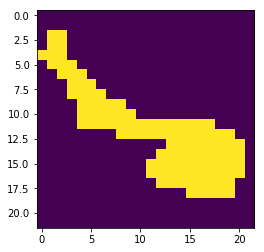

In [650]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(grid)

In [651]:
newmeangridnew_full = np.nanmean([zi_listofarrays[0],zi_listofarrays[1],zi_listofarrays[2],zi_listofarrays[3],zi_listofarrays[4],
                          zi_listofarrays[5],zi_listofarrays[6],zi_listofarrays[7],zi_listofarrays[8],
                          zi_listofarrays[9],zi_listofarrays[10],zi_listofarrays[11],
                          zi_listofarrays[12],zi_listofarrays[13],zi_listofarrays[14],
                          zi_listofarrays[15],zi_listofarrays[16],zi_listofarrays[17],
                          zi_listofarrays[18],zi_listofarrays[19],zi_listofarrays[20],
                          zi_listofarrays[21],zi_listofarrays[22],zi_listofarrays[23],
                          zi_listofarrays[24],zi_listofarrays[25], ci_listofarrays[0],ci_listofarrays[1],ci_listofarrays[2],ci_listofarrays[3],ci_listofarrays[4],
                          ci_listofarrays[5], ci_listofarrays[6], ci_listofarrays[7],ci_listofarrays[8],
                          ci_listofarrays[9], ci_listofarrays[10], ci_listofarrays[11],
                          ci_listofarrays[12],ci_listofarrays[13],ci_listofarrays[14],
                          ci_listofarrays[15],ci_listofarrays[16],ci_listofarrays[17],
                          ci_listofarrays[18],ci_listofarrays[19],ci_listofarrays[20],
                          ci_listofarrays[21],ci_listofarrays[22],ci_listofarrays[23],
                          ci_listofarrays[24],ci_listofarrays[25]],axis = 0)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app


In [652]:
tnewmeangridnew_full = np.nanmean([zti_listofarrays[0],zti_listofarrays[1],zti_listofarrays[2],zti_listofarrays[3],zti_listofarrays[4],
                          zti_listofarrays[5],zti_listofarrays[6],zti_listofarrays[7],zti_listofarrays[8],
                          zti_listofarrays[9],zti_listofarrays[10],zti_listofarrays[11],
                          zti_listofarrays[12],zti_listofarrays[13],zti_listofarrays[14],
                          zti_listofarrays[15],zti_listofarrays[16],zti_listofarrays[17],
                          zti_listofarrays[18],zti_listofarrays[19],zti_listofarrays[20],
                          zti_listofarrays[21],zti_listofarrays[22],zti_listofarrays[23],
                          zti_listofarrays[24],zti_listofarrays[25], cti_listofarrays[0],cti_listofarrays[1],cti_listofarrays[2],cti_listofarrays[3],cti_listofarrays[4],
                          cti_listofarrays[5], cti_listofarrays[6], cti_listofarrays[7],cti_listofarrays[8],
                          cti_listofarrays[9], cti_listofarrays[10], cti_listofarrays[11],
                          cti_listofarrays[12],cti_listofarrays[13],cti_listofarrays[14],
                          cti_listofarrays[15],cti_listofarrays[16],cti_listofarrays[17],
                          cti_listofarrays[18],cti_listofarrays[19],cti_listofarrays[20],
                          cti_listofarrays[21],cti_listofarrays[22],cti_listofarrays[23],
                          cti_listofarrays[24],cti_listofarrays[25]],axis = 0)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app


In [653]:
newmeangridnew = np.nanmean([zi_listofarrays[0],zi_listofarrays[1],zi_listofarrays[2],zi_listofarrays[3],zi_listofarrays[4],
                          zi_listofarrays[5],zi_listofarrays[6],zi_listofarrays[7],zi_listofarrays[8],
                          zi_listofarrays[9],zi_listofarrays[10],zi_listofarrays[11],
                          zi_listofarrays[12],zi_listofarrays[13],zi_listofarrays[14],
                          zi_listofarrays[15],zi_listofarrays[16],zi_listofarrays[17],
                          zi_listofarrays[18],zi_listofarrays[19],zi_listofarrays[20],
                          zi_listofarrays[21],zi_listofarrays[22],zi_listofarrays[23],
                          zi_listofarrays[24],zi_listofarrays[25]],axis = 0)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


In [654]:
newstdgridnew = np.nanstd([zi_listofarrays[0],zi_listofarrays[1],zi_listofarrays[2],zi_listofarrays[3],zi_listofarrays[4],
                          zi_listofarrays[5],zi_listofarrays[6],zi_listofarrays[7],zi_listofarrays[8],
                          zi_listofarrays[9],zi_listofarrays[10],zi_listofarrays[11],
                          zi_listofarrays[12],zi_listofarrays[13],zi_listofarrays[14],
                          zi_listofarrays[15],zi_listofarrays[16],zi_listofarrays[17],
                          zi_listofarrays[18],zi_listofarrays[19],zi_listofarrays[20],
                          zi_listofarrays[21],zi_listofarrays[22],zi_listofarrays[23],
                          zi_listofarrays[24],zi_listofarrays[25]],axis = 0)

In [655]:
newstdgridnew_full = np.nanstd([zi_listofarrays[0],zi_listofarrays[1],zi_listofarrays[2],zi_listofarrays[3],zi_listofarrays[4],
                          zi_listofarrays[5],zi_listofarrays[6],zi_listofarrays[7],zi_listofarrays[8],
                          zi_listofarrays[9],zi_listofarrays[10],zi_listofarrays[11],
                          zi_listofarrays[12],zi_listofarrays[13],zi_listofarrays[14],
                          zi_listofarrays[15],zi_listofarrays[16],zi_listofarrays[17],
                          zi_listofarrays[18],zi_listofarrays[19],zi_listofarrays[20],
                          zi_listofarrays[21],zi_listofarrays[22],zi_listofarrays[23],
                          zi_listofarrays[24],zi_listofarrays[25], ci_listofarrays[0],ci_listofarrays[1],ci_listofarrays[2],ci_listofarrays[3],ci_listofarrays[4],
                          ci_listofarrays[5], ci_listofarrays[6], ci_listofarrays[7],ci_listofarrays[8],
                          ci_listofarrays[9], ci_listofarrays[10], ci_listofarrays[11],
                          ci_listofarrays[12],ci_listofarrays[13],ci_listofarrays[14],
                          ci_listofarrays[15],ci_listofarrays[16],ci_listofarrays[17],
                          ci_listofarrays[18],ci_listofarrays[19],ci_listofarrays[20],
                          ci_listofarrays[21],ci_listofarrays[22],ci_listofarrays[23],
                          ci_listofarrays[24],ci_listofarrays[25]],axis = 0)

In [656]:
tnewstdgridnew_full = np.nanstd([zti_listofarrays[0],zti_listofarrays[1],zti_listofarrays[2],zti_listofarrays[3],zti_listofarrays[4],
                          zti_listofarrays[5],zti_listofarrays[6],zti_listofarrays[7],zti_listofarrays[8],
                          zti_listofarrays[9],zti_listofarrays[10],zti_listofarrays[11],
                          zti_listofarrays[12],zti_listofarrays[13],zti_listofarrays[14],
                          zti_listofarrays[15],zti_listofarrays[16],zti_listofarrays[17],
                          zti_listofarrays[18],zti_listofarrays[19],zti_listofarrays[20],
                          zti_listofarrays[21],zti_listofarrays[22],zti_listofarrays[23],
                          zti_listofarrays[24],zti_listofarrays[25], cti_listofarrays[0],cti_listofarrays[1],cti_listofarrays[2],cti_listofarrays[3],cti_listofarrays[4],
                          cti_listofarrays[5], cti_listofarrays[6], cti_listofarrays[7],cti_listofarrays[8],
                          cti_listofarrays[9], cti_listofarrays[10], cti_listofarrays[11],
                          cti_listofarrays[12],cti_listofarrays[13],cti_listofarrays[14],
                          cti_listofarrays[15],cti_listofarrays[16],cti_listofarrays[17],
                          cti_listofarrays[18],cti_listofarrays[19],cti_listofarrays[20],
                          cti_listofarrays[21],cti_listofarrays[22],cti_listofarrays[23],
                          cti_listofarrays[24],cti_listofarrays[25]],axis = 0)

In [657]:
diffstd = tnewstdgridnew_full - newstdgridnew_full

In [658]:
diffmean = tnewmeangridnew_full - newmeangridnew_full

In [659]:
print(np.nanmin(diffmean))
print(np.nanmax(diffmean))

-31.314564390560037
56.84412585630409


In [660]:
print(np.nanmin(diffstd))
print(np.nanmax(diffstd))

-14.63978108582328
13.358391840592711


In [661]:
# print(newmeangridnew.shape)

In [662]:
# print(grid)

In [663]:
griddednewlate = np.where(grid == True, newmeangridnew, grid)

In [714]:
griddednewlate_full = np.where(grid == True, diffmean, grid) #change to mean if need

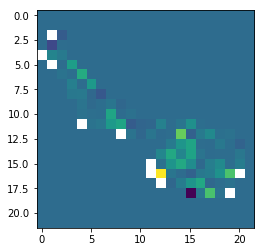

In [715]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(griddednewlate_full)

In [716]:
griddednewlatelate_full = np.where(griddednewlate_full == np.nan, 0.0, griddednewlate_full)

In [667]:
# griddednewlatelate = np.where(griddednewlate == np.nan, 0.0, griddednewlate)

In [668]:
# b = np.where(np.isnan(griddednewlatelate), 0, griddednewlatelate)

In [717]:
d = np.where(np.isnan(griddednewlatelate_full), 0, griddednewlatelate_full) # SPRING

In [670]:
# e = np.where(np.isnan(griddednewlatelate_full), 0, griddednewlatelate_full) # SUMMER

In [718]:
print(np.nanmean(d))

1.114392621141113


In [719]:
print(np.nanmax(d))

56.84412585630409


In [720]:
print(np.min(d))

-31.314564390560037


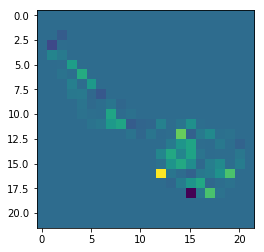

In [721]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(d)

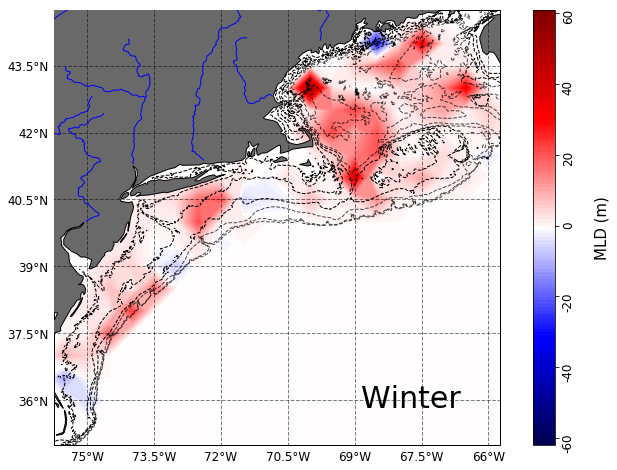

In [727]:
from matplotlib.pyplot import * ; import cartopy.feature as cfeature

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-75.75, -65.75, 35, 44.75], ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1, color='black', alpha=0.5, linestyle='--', zorder = 20)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 12, 'color': 'black'}
gl.ylabel_style = {'size': 12, 'color': 'black'}

plt.text(-68.85, 35.85, 'Winter', dict(size=30))

# gl.xlabel_style = {'color': 'red', 'weight': 'bold'}

cf = plt.contourf(xi,yi,d,np.arange(-62, 62,1), cmap = 'seismic')
# cf = plt.contourf(xi,yi,d,np.arange(0, 120,1), cmap = 'ocean_r')
# cf = plt.contourf(xi,yi,d,np.arange(-0.62, 0.62,0.005), cmap = 'seismic')
# cf = plt.contourf(xi,yi,d,np.arange(0, 122,2), cmap = 'ocean_r')
# cf = plt.contourf(xi,yi,d,np.arange(0, 50,0.5), cmap = 'ocean_r')
# ax.contour(xi, yi, d, levels=12, linewidths=1,colors='white',zorder=5,)
ax.contour(lonNC, latNC, depthNC, [-300,-200,-100], linewidths=1,colors='black', alpha = 0.7,zorder=5) #alpha = 0.7
ax.contour(lonNC, latNC, depthNC, [-75,-50,-25], linewidths=1,colors='black',zorder=5)

feature = cfeature.NaturalEarthFeature(name='coastline', category='physical',scale='50m',edgecolor='black', facecolor='dimgray')
ax.add_feature(feature,zorder=10)
cbar = plt.colorbar(cf, ax=ax)
cbar.ax.get_yaxis().labelpad = 20
cbar.ax.set_ylabel('MLD (m)', rotation=90, fontsize = 15)
# cbar.set_ticks([-0.6,-0.4,-0.2,0.0,0.2,0.4,0.6])
# cbar.set_ticks([0,10,20,30,40,50,60,70,80,90,100,110,120])
cbar.set_ticks([-60,-40,-20,0,20,40,60])
cbar.ax.tick_params(labelsize=12)
cbar.ax.set_yticklabels([-60,-40,-20,0,20,40,60],rotation=90)
# # mpl.rcParams['axes.linewidth'] = 2

rivers = cartopy.feature.NaturalEarthFeature(
    category='physical', name='rivers_lake_centerlines',
    scale='10m', facecolor='none', edgecolor='blue')

# fig, ax = plt.subplots(
#     nrows=1, ncols=1, subplot_kw={'projection': ccrs.PlateCarree()},
#                          figsize=(10,6))
ax.add_feature(rivers, linewidth=1, zorder=60)

plt.savefig('seasonal_WGoM')

plt.show()

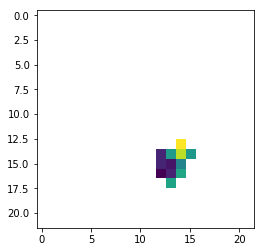

In [680]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(ci_listofarrays[2])

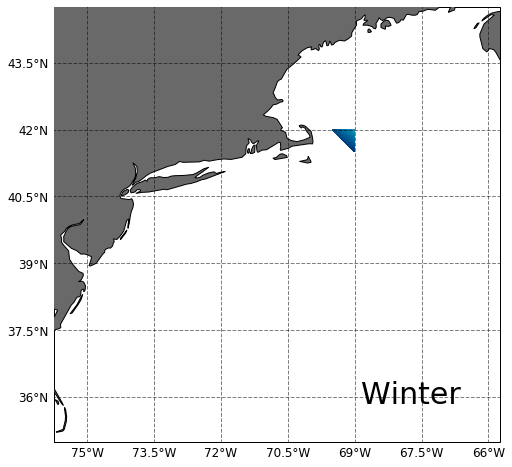

In [711]:
from matplotlib.pyplot import * ; import cartopy.feature as cfeature

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-75.75, -65.75, 35, 44.75], ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1, color='black', alpha=0.5, linestyle='--', zorder = 20)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 12, 'color': 'black'}
gl.ylabel_style = {'size': 12, 'color': 'black'}

plt.text(-68.85, 35.85, 'Winter', dict(size=30))

# gl.xlabel_style = {'color': 'red', 'weight': 'bold'}

cf = plt.contourf(xi,yi,ci_listofarrays[0],np.arange(0, 122,1), cmap = 'ocean_r')
# ax.contour(lonNC, latNC, depthNC, [-300,-200,-100], linewidths=1,colors='black', alpha = 0.7,zorder=5) #alpha = 0.7
# ax.contour(lonNC, latNC, depthNC, [-75,-50,-25], linewidths=1,colors='black',zorder=5)

feature = cfeature.NaturalEarthFeature(name='coastline', category='physical',scale='50m',edgecolor='black', facecolor='dimgray')
ax.add_feature(feature,zorder=10)

plt.show()

In [9]:
file_in ='Etopo1_Bed_35_65N_40_80W.nc'
NC=Dataset(file_in); DS=xr.open_dataset(file_in)

projection= ccrs.PlateCarree(central_longitude=255);
data_crs = ccrs.PlateCarree()

In [10]:
latNC= NC['lat'][:]
lonNC= NC['lon'][:]
depthNC= NC['depth'][:]

In [ ]:
# d is winter


In [512]:
print(len(seasonyeardepth))

1424


In [514]:
print(len(zi_listofarrays))

78


In [67]:
import numpy as np
from matplotlib.path import Path

# nx = np.arange(-76*100,-65*100,25)
# ny = np.arange(35*100,46*100,25)

nx = np.arange(-76,-65,0.5)
ny = np.arange(35,46,0.5)

# poly_verts = df_w_plottable.values 

poly_verts_w = df_w_plottable.values 
poly_verts_v = df_v_plottable.values 
poly_verts_x = df_x_plottable.values 
poly_verts_y = df_y_plottable.values 
poly_verts_t = df_t_plottable.values 

full_pandas = df_w_plottable.append(df_v_plottable)
full_pandas = full_pandas.append(df_x_plottable)
full_pandas = full_pandas.append(df_y_plottable)
full_pandas = full_pandas.append(df_t_plottable)
poly_verts_full = full_pandas.values

# print(df_w_plottable.values )

newlon = [-69.5,-68,-67.5, -67, -66.5, -66, -65.7, -66,-66, -66.5, -67,
         -68, -69, -70,-70.5, -70.5,-69.5, -72, -74, -74.25, -76, -75.5, -75, -74.75, -74.5, -72, -71.4, -69.5]
newlat = [40,40.3,40.4, 40.6, 40.8, 41.45, 41.8, 42.1, 43, 44.2, 44.2, 44.2, 43.9, 43.7,
         43, 42.2, 41, 41, 40.5, 39.4, 37, 36, 35.5, 36, 37.4, 39.5, 40, 40]
newpath = list(zip(newlon,newlat))
newpd = pd.DataFrame(newpath, columns=['lon','lat'])
path_new = Path(newpath)

# full_numpyarray = poly_verts_w.append(poly_verts_v,poly_verts_x,poly_verts_y,poly_verts_t)

# Create vertex coordinates for each grid cell...
# (<0,0> is at the top left of the grid in this system)
x, y = np.meshgrid(nx, ny)
x, y = x.flatten(), y.flatten()

points = np.vstack((x,y)).T

# path = Path(poly_verts)
path_w = Path(poly_verts_w)
path_v = Path(poly_verts_v)
path_x = Path(poly_verts_x)
path_y = Path(poly_verts_y)
path_t = Path(poly_verts_t)
path_full = Path(poly_verts_full)

# grid = path.contains_points(points)
# grid = path_w.contains_points(points) 
# grid = path_full.contains_points(points) 
grid = path_new.contains_points(points) 

# grid = path_w.contains_points(points) or path_v.contains_points(points) or path_x.contains_points(points) or path_y.contains_points(points) or path_t.contains_points(points)

grid = grid.reshape((22,22))

print(grid)

[[False False False False False False False False False False False False
  False False False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False False]
 [False  True  True False False False False False False False False False
  False False False False False False False False False False]
 [False  True  True False False False False False False False False False
  False False False False False False False False False False]
 [ True  True  True False False False False False False False False False
  False False False False False False False False False False]
 [False  True  True  True False False False False False False False False
  False False False False False False False False False False]
 [False False  True  True  True False False False False False False False
  False False False False False False False False False False]
 [False False False  True  True  True Fal

In [68]:
print(grid.shape)

(22, 22)


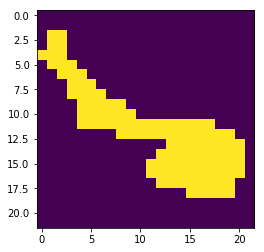

In [69]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(grid)

In [70]:
winter_list = [pd.read_csv('completed/09_full_9.csv'),pd.read_csv('completed/10_full_10.csv'),pd.read_csv('completed/11_full_11.csv')]
winter = pd.concat(winter_list)

In [71]:
from scipy.interpolate import griddata

In [72]:
x = winter['obs_lon']*-1
y = winter['obs_lat']
z = winter['o_MLDminusG_MLD']
    
xi = np.arange(-76,-65,0.5)
yi = np.arange(35,46,0.5)

xi,yi = np.meshgrid(xi,yi)
    
ci = griddata((x,y),z,(xi,yi),method='linear')
    
ci_short = ci.reshape((22,22)) ###

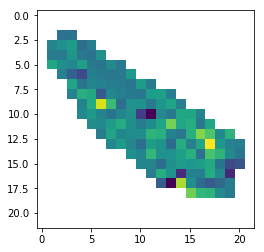

In [73]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(ci)

In [74]:
griddednewlate_full = np.where(grid == True, ci, grid) #change to mean if need

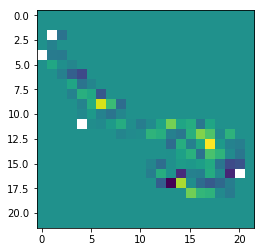

In [75]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(griddednewlate_full)

In [76]:
griddednewlatelate_full = np.where(griddednewlate_full == np.nan, 0.0, griddednewlate_full)

In [77]:
d = np.where(np.isnan(griddednewlatelate_full), 0, griddednewlatelate_full) # SPRING

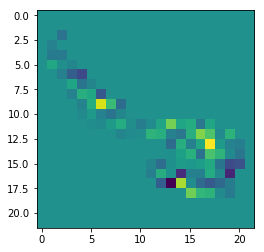

In [78]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(d)

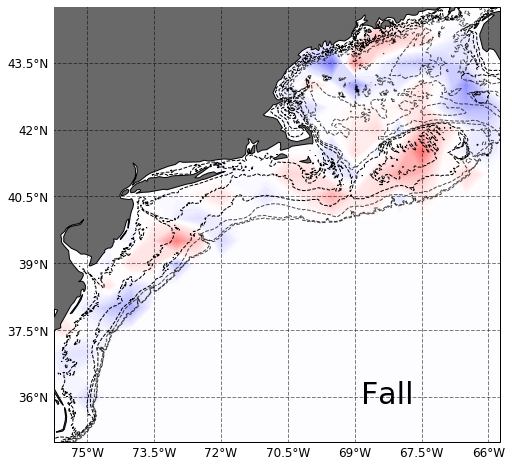

In [80]:
from matplotlib.pyplot import * ; import cartopy.feature as cfeature

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-75.75, -65.75, 35, 44.75], ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1, color='black', alpha=0.5, linestyle='--', zorder = 20)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 12, 'color': 'black'}
gl.ylabel_style = {'size': 12, 'color': 'black'}

plt.text(-68.85, 35.85, 'Fall', dict(size=30))

cf = plt.contourf(xi,yi,d, np.arange(-110, 111,1), cmap = 'seismic')
ax.contour(lonNC, latNC, depthNC, [-300,-200,-100], linewidths=1,colors='black', alpha = 0.7,zorder=5) #alpha = 0.7
ax.contour(lonNC, latNC, depthNC, [-75,-50,-25], linewidths=1,colors='black',zorder=5)

feature = cfeature.NaturalEarthFeature(name='coastline', category='physical',scale='50m',edgecolor='black', facecolor='dimgray')
ax.add_feature(feature,zorder=10)
# cbar = plt.colorbar(cf, ax=ax)
# cbar.ax.get_yaxis().labelpad = 20
# cbar.ax.set_ylabel('MLD (m)', rotation=90, fontsize = 15)
# cbar.set_ticks([-110,-100,-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90,100,110])
# cbar.ax.tick_params(labelsize=12)

plt.savefig('seasonal_WGoM')

plt.show()

In [81]:
print(np.nanmean(d))

-0.12701862562466


In [ ]:
-0.3046179231244022
In [ ]:


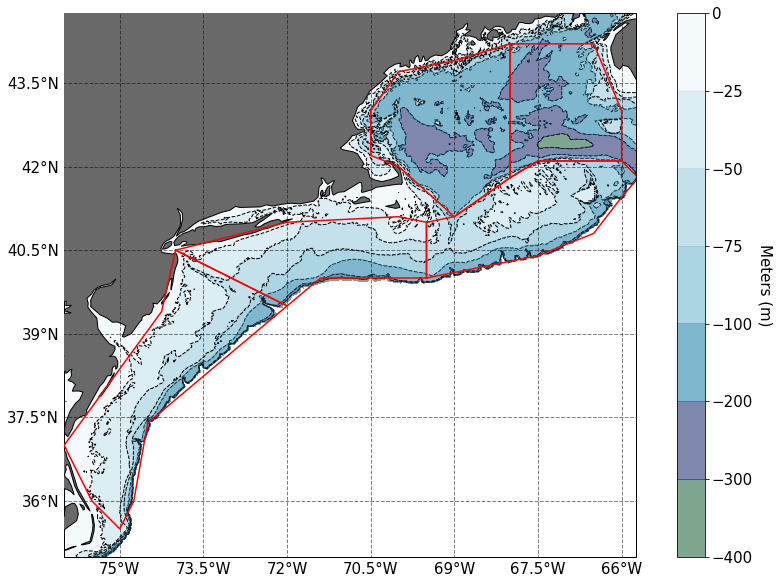

In [23]:
from matplotlib.pyplot import * ; import cartopy.feature as cfeature

plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-76.00, -65.75, 35, 44.75], ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1, color='black', alpha=0.5, linestyle='--', zorder = 20)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15, 'color': 'black'}
gl.ylabel_style = {'size': 15, 'color': 'black'}

# plt.text(-68.85, 35.85, 'Georges Bank', dict(size=15))
plt.plot(x_w,y_w, color='red', linewidth=1.5, zorder=20)
plt.plot(x_x,y_x,  color='red',linewidth=1.5,zorder=20)
plt.plot(x_y,y_y,  color='red',linewidth=1.5,zorder=20)
plt.plot(x_t,y_t,  color='red',linewidth=1.5,zorder=20)
plt.plot(x_v,y_v,  color='red',linewidth=1.5,zorder=20)

cf = plt.contourf(lonNC,latNC,depthNC, [-400,-300,-200,-100,-75,-50,-25,0], cmap = 'ocean',alpha=0.5)
ax.contour(lonNC, latNC, depthNC, [-300,-200,-100], linewidths=1,colors='black', alpha = 0.7,zorder=5) #alpha = 0.7
ax.contour(lonNC, latNC, depthNC, [-75,-50,-25], linewidths=1,colors='black',zorder=5)

feature = cfeature.NaturalEarthFeature(name='coastline', category='physical',scale='50m',edgecolor='black', facecolor='dimgray')
ax.add_feature(feature,zorder=10)
cbar = plt.colorbar(cf, ax=ax)
cbar.ax.get_yaxis().labelpad = 20
cbar.ax.set_ylabel('Meters (m)', rotation=270, fontsize = 15)
# cbar.set_ticks([-110,-100,-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90,100,110])
cbar.ax.tick_params(labelsize=15)

# plt.text(73.5, 37, 'SMAB', dict(size=20), color='red')



# x_w = df_w_plot['lon']; y_w = df_w_plot['lat']
plt.savefig('1fig1')

plt.show()